Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github


# CoronaVirus Prediction

### Number of Day to Predict 63

In [1]:
%autosave 360

Autosaving every 360 seconds


In [2]:
num_days_R_prediction=63

In [3]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [4]:
%%R
max_days_prediction<-num_days_R_prediction

In [5]:
bypass_weather=1 # =1 bypass weather_pi api calls
#
number_past_days_training=27 # =(6/14) * num_days_R_prediction  # Number of Past days on training # max to be on 6.Feb.2020
#
max_countries_map=50
#
## DROP_N=15 => 06/02
## DROP_N=45 => 08/03
## DROP_N=75 => 07/04
## DROP_N=145 => 15/06
## DROP_N=175 => 15/07
#
drop_n_dataset_days=235
#

### Load Data from Github - John Hopkins Institute 

In [6]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [7]:
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
245                                           NaN             Timor-Leste   
246                                           NaN                    Togo   
247                                           NaN     Trinidad and Tobago   
248                                           NaN                 Tunisia   
249                                           NaN                  Turkey   
250                                           NaN           United States   
251                                           NaN                  Uganda   
252                                           NaN                 Ukraine   
253                                           NaN    United Arab Emirates   
254                                      Anguilla          United Kingdom   
255                                       Bermuda          United Kingdom   
256                        British Virgin Islands          United Kingdom   
257                                Cayman Islands          United Kingdom   
258                               Channel Islands          United Kingdom   
259                   Falkland Islands (Malvinas)          United Kingdom   
260                                     Gibraltar          United Kingdom   
261                                   Isle of Man          United Kingdom   
262                                    Montserrat          United Kingdom   
263  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
264                      Turks and Caicos Islands          United Kingdom   
265                            

## Get Population

In [8]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [9]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
251                                           NaN             Timor-Leste   
252                                           NaN                    Togo   
253                                           NaN     Trinidad and Tobago   
254                                           NaN                 Tunisia   
255                                           NaN                  Turkey   
256                                           NaN           United States   
257                                           NaN                  Uganda   
258                                           NaN                 Ukraine   
259                                           NaN    United Arab Emirates   
260                                      Anguilla          United Kingdom   
261                                       Bermuda          United Kingdom   
262                        British Virgin Islands          United Kingdom   
263                                Cayman Islands          United Kingdom   
264                               Channel Islands          United Kingdom   
265                   Falkland Islands (Malvinas)          United Kingdom   
266                                     Gibraltar          United Kingdom   
267                                   Isle of Man          United Kingdom   
268                                    Montserrat          United Kingdom   
269  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
270                      Turks and Caicos Islands          United Kingdom   
271                            

In [10]:
# merge region death
death.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN  Marshall Islands   7.131500  171.184500        0        0   
186            NaN        Mauritania  21.007900  -10.940800        0        0   
187            NaN         Mauritius -20.348404   57.552152        0        0   
188            NaN            Mexico  23.634500 -102.552800        0        0   
189            NaN        Micronesia   7.425600  150.550800        0        0   
190            NaN           Moldova  47.411600   28.369900        0        0   
191            NaN            Monaco  43.733300    7.416700        0        0   
192            NaN          Mongolia  46.862500  103.846700        0        0   
193            NaN        Montenegro  42.708678   19.374390        0        0   
194            NaN           Morocco  31.791700   -7.092600        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/20/21  4/21/21  4/22/21  \
185        0        0        0        0  ...        0        0        0   
186        0        0        0        0  ...      454      454      454   
187        0        0        0        0  ...       15       15       16   
188        0        0        0        0  ...   213048   213597   214095   
189        0        0        0        0  ...        0        0        0   
190        0        0        0        0  ...     5616     5643     5668   
191        0        0        0        0  ...       31       31       31   
192        0        0        0        0  ...       56       56       61   
193        0        0        0        0  ...     1441     1444     1451   
194        0        0        0        0  ...     8959     8969     8976   

     4/23/21  4/24/21  4/25/21  4/26/21  4/27/21   Population   \
185        0        0        0        0        0           NaN   
186      454      454      454      455      455     4,649,658   
187       16       16       16       17       17           NaN   
188   214504   214853   214947   215113   215547   128,640,794   
189        0        0        0        0        0           NaN   
190     5691     5709     5730     5745     5762     4,035,942   
191       31       31       32       32       32        39,183   
192       74       78       80       80       88     3,278,290   
193     1457     1463     1465     1473     1478       622 500   
194     8983     8988     8992     8999     9005    36,817,128   

                   region  
185  Marshall Islands_nan  
186        Mauritania_nan  
187         Mauritius_nan  
188            Mexico_nan  
189        Micronesia_nan  
190           Moldova_nan  
191            Monaco_nan  
192          Mongolia_nan  
193        Montenegro_nan  
194           Morocco_nan  

[10 rows x 468 columns]

In [11]:
# merge region recover
recover.iloc[175:185,:]

Province/State Country/Region        Lat       Long  \
175                               NaN       Mongolia  46.862500  103.84670   
176                               NaN     Montenegro  42.708678   19.37439   
177                               NaN        Morocco  31.791700   -7.09260   
178                               NaN     Mozambique -18.665700   35.52960   
179                               NaN        Namibia -22.957600   18.49040   
180                               NaN          Nepal  28.166700   84.25000   
181                             Aruba    Netherlands  12.521100  -69.96830   
182  Bonaire, Sint Eustatius and Saba    Netherlands  12.178400  -68.23850   
183                           Curacao    Netherlands  12.169600  -68.99000   
184                      Sint Maarten    Netherlands  18.042500  -63.05480   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/20/21  \
175        0        0        0        0        0        0  ...    13346   
176        0        0        0        0        0        0  ...    91403   
177        0        0        0        0        0        0  ...   492725   
178        0        0        0        0        0        0  ...    62323   
179        0        0        0        0        0        0  ...    44953   
180        0        0        0        0        0        0  ...   275806   
181        0        0        0        0        0        0  ...     9932   
182        0        0        0        0        0        0  ...      180   
183        0        0        0        0        0        0  ...     9457   
184        0        0        0        0        0        0  ...     2161   

     4/21/21  4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  \
175    13346    13772    14745    15403    16815    16815    17543   
176    91679    91905    92142    92377    92609    92756    92975   
177   493353   493873   494415   494872   495262   495408   496031   
178    62342    62394    62408    62452    62501    62927    64448   
179    45039    45136    45278    45334    45558    45642    45740   
180   276093   276345   276755   277123   277573   277951   278506   
181     9978    10024    10069    10121    10169    10211    10245   
182      180      180      180      180      180      180      180   
183     9820    10011    10291    10494    10801    10916    11339   
184     2161     2167     2174     2175     2175     2181     2181   

      Population                                         region  
175     3,278,290                                  Mongolia_nan  
176       622 500                                Montenegro_nan  
177    36,817,128                                   Morocco_nan  
178    31,542,919                                Mozambique_nan  
179     2,540,905                                   Namibia_nan  
180    29,300,000                                     Nepal_nan  
181       116,600                             Netherlands_Aruba  
182           NaN  Netherlands_Bonaire, Sint Eustatius and Saba  
183       158,665                           Netherlands_Curacao  
184           NaN                      Netherlands_Sint Maarten  

[10 rows x 468 columns]

In [12]:
confirmed.iloc[185:195,:]

Province/State    Country/Region        Lat        Long  1/22/20  1/23/20  \
185            NaN  Marshall Islands   7.131500  171.184500        0        0   
186            NaN        Mauritania  21.007900  -10.940800        0        0   
187            NaN         Mauritius -20.348404   57.552152        0        0   
188            NaN            Mexico  23.634500 -102.552800        0        0   
189            NaN        Micronesia   7.425600  150.550800        0        0   
190            NaN           Moldova  47.411600   28.369900        0        0   
191            NaN            Monaco  43.733300    7.416700        0        0   
192            NaN          Mongolia  46.862500  103.846700        0        0   
193            NaN        Montenegro  42.708678   19.374390        0        0   
194            NaN           Morocco  31.791700   -7.092600        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/20/21  4/21/21  4/22/21  \
185        0        0        0        0  ...        4        4        4   
186        0        0        0        0  ...    18156    18175    18192   
187        0        0        0        0  ...     1203     1204     1205   
188        0        0        0        0  ...  2311172  2315811  2319519   
189        0        0        0        0  ...        1        1        1   
190        0        0        0        0  ...   246691   247391   248009   
191        0        0        0        0  ...     2413     2422     2423   
192        0        0        0        0  ...    25364    25364    26692   
193        0        0        0        0  ...    95894    96048    96187   
194        0        0        0        0  ...   506669   507338   507938   

     4/23/21  4/24/21  4/25/21  4/26/21  4/27/21   Population   \
185        4        4        4        4        4           NaN   
186    18207    18240    18257    18282    18314     4,649,658   
187     1205     1206     1206     1206     1206           NaN   
188  2323430  2326738  2328391  2329534  2333126   128,640,794   
189        1        1        1        1        1           NaN   
190   248518   248898   249139   249385   249714     4,035,942   
191     2426     2429     2432     2439     2442        39,183   
192    29219    30483    31339    31339    32437     3,278,290   
193    96348    96499    96660    96779    96930       622 500   
194   508530   509037   509363   509465   509972    36,817,128   

                   region  
185  Marshall Islands_nan  
186        Mauritania_nan  
187         Mauritius_nan  
188            Mexico_nan  
189        Micronesia_nan  
190           Moldova_nan  
191            Monaco_nan  
192          Mongolia_nan  
193        Montenegro_nan  
194           Morocco_nan  

[10 rows x 468 columns]

In [13]:
confirmed.iloc[220:230,:]

Province/State                    Country/Region        Lat        Long  \
220            NaN                            Russia  61.524010  105.318756   
221            NaN                            Rwanda  -1.940300   29.873900   
222            NaN             Saint Kitts and Nevis  17.357822  -62.782998   
223            NaN                       Saint Lucia  13.909400  -60.978900   
224            NaN  Saint Vincent and the Grenadines  12.984300  -61.287200   
225            NaN                             Samoa -13.759000 -172.104600   
226            NaN                        San Marino  43.942400   12.457800   
227            NaN             Sao Tome and Principe   0.186400    6.613100   
228            NaN                      Saudi Arabia  23.885942   45.079162   
229            NaN                           Senegal  14.497400  -14.452400   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/20/21  \
220        0        0        0        0        0        0  ...  4665553   
221        0        0        0        0        0        0  ...    24005   
222        0        0        0        0        0        0  ...       44   
223        0        0        0        0        0        0  ...     4419   
224        0        0        0        0        0        0  ...     1819   
225        0        0        0        0        0        0  ...        3   
226        0        0        0        0        0        0  ...     5040   
227        0        0        0        0        0        0  ...     2283   
228        0        0        0        0        0        0  ...   407010   
229        0        0        0        0        0        0  ...    39836   

     4/21/21  4/22/21  4/23/21  4/24/21  4/25/21  4/26/21  4/27/21  \
220  4673699  4682573  4691290  4699988  4708640  4717321  4725252   
221    24112    24262    24459    24535    24593    24677    24814   
222       44       44       44       44       44       44       44   
223     4444     4455     4455     4463     4486     4502     4508   
224     1827     1827     1827     1830     1830     1839     1844   
225        3        3        3        3        3        3        3   
226     5044     5045     5047     5047     5047     5055     5058   
227     2288     2292     2292     2297     2298     2299     2299   
228   408038   409093   410191   411263   412216   413174   414219   
229    39910    39975    40022    40082    40135    40166    40193   

      Population                                 region  
220   144,500,000                            Russia_nan  
221    12,952,218                            Rwanda_nan  
222           NaN             Saint Kitts and Nevis_nan  
223       184,106                       Saint Lucia_nan  
224       110,940  Saint Vincent and the Grenadines_nan  
225           NaN                             Samoa_nan  
226        33,916                        San Marino_nan  
227           NaN             Sao Tome and Principe_nan  
228    34,695,447                      Saudi Arabia_nan  
229    16,743,927                           Senegal_nan  

[10 rows x 468 columns]

## Create Time Series + Plots

In [14]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [15]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [16]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

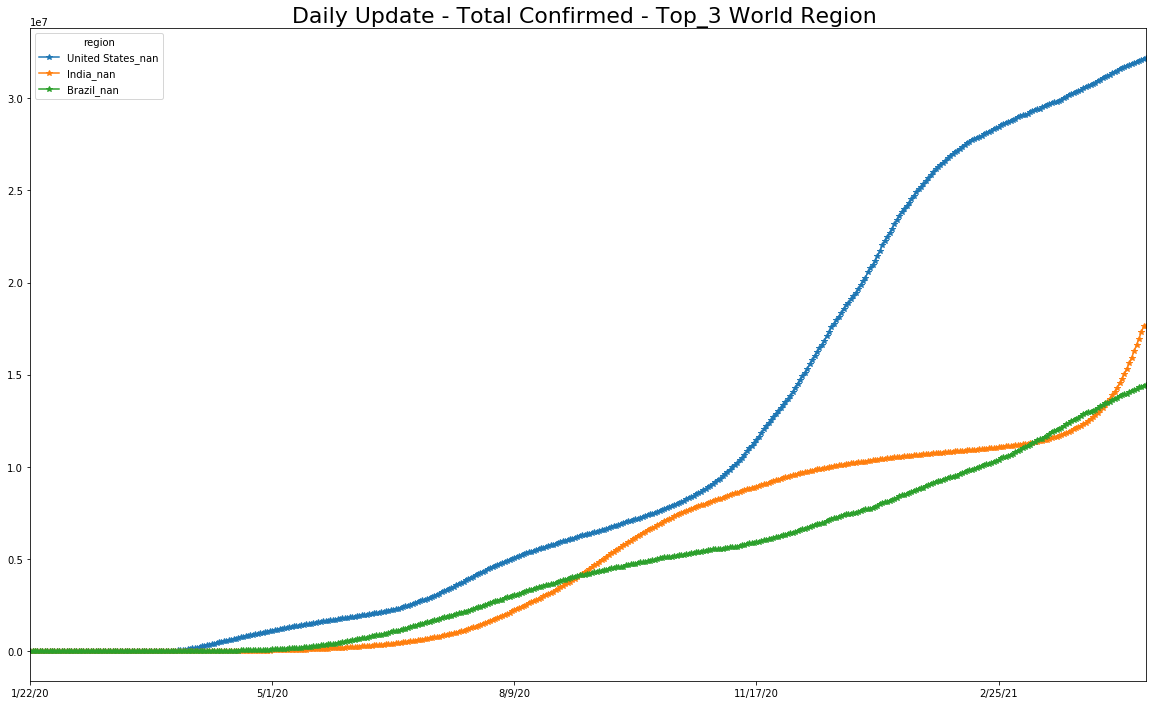

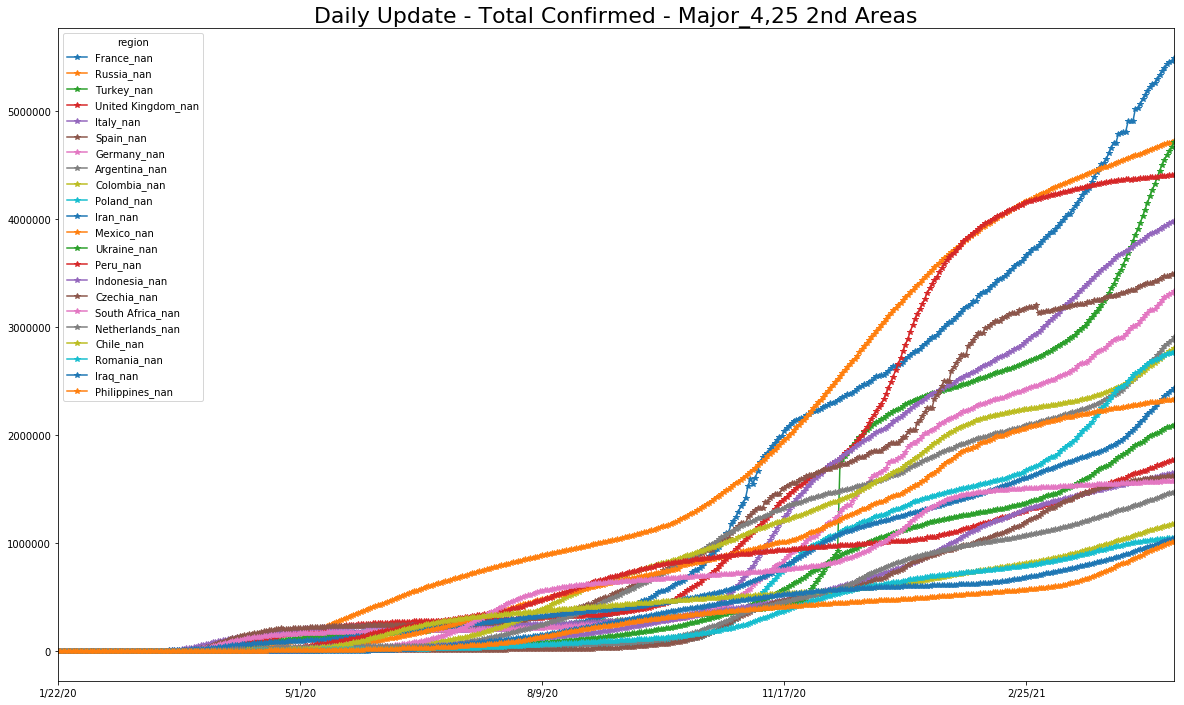

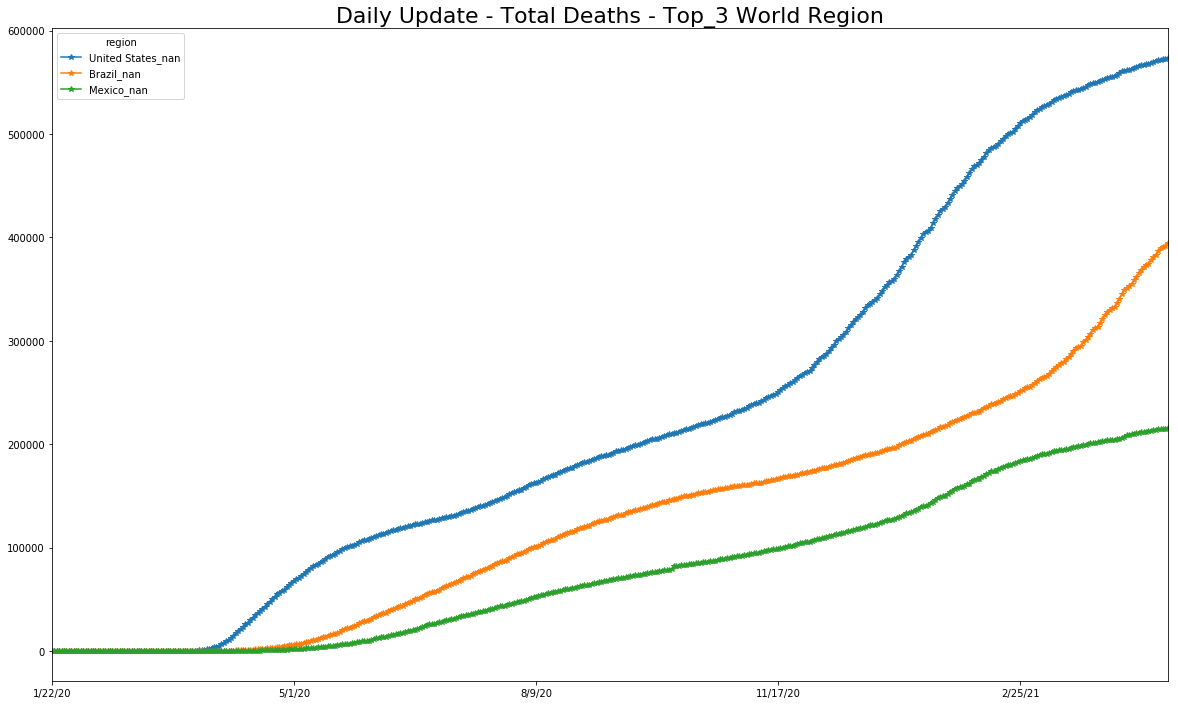

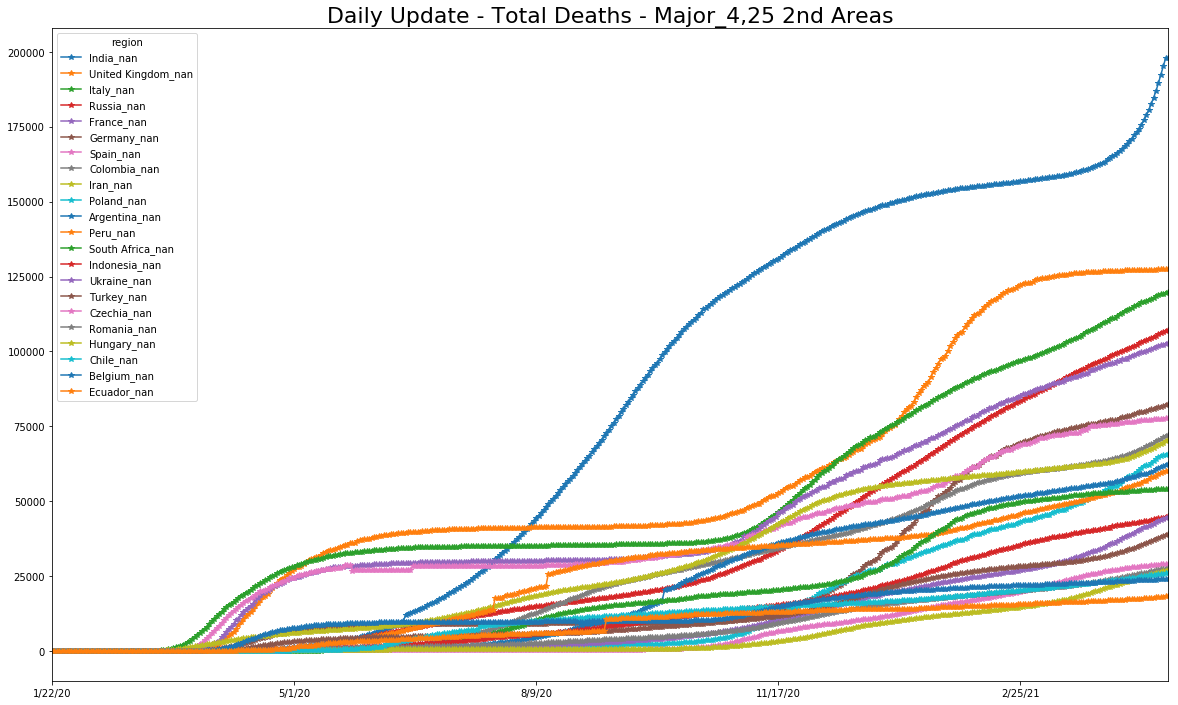

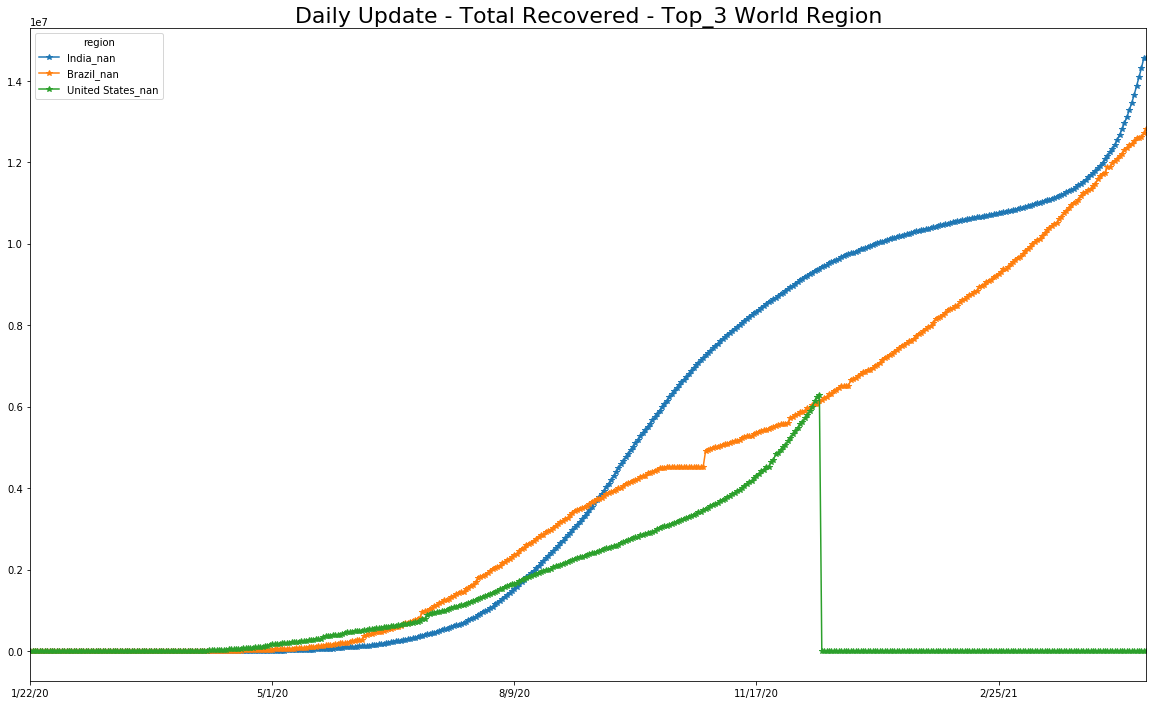

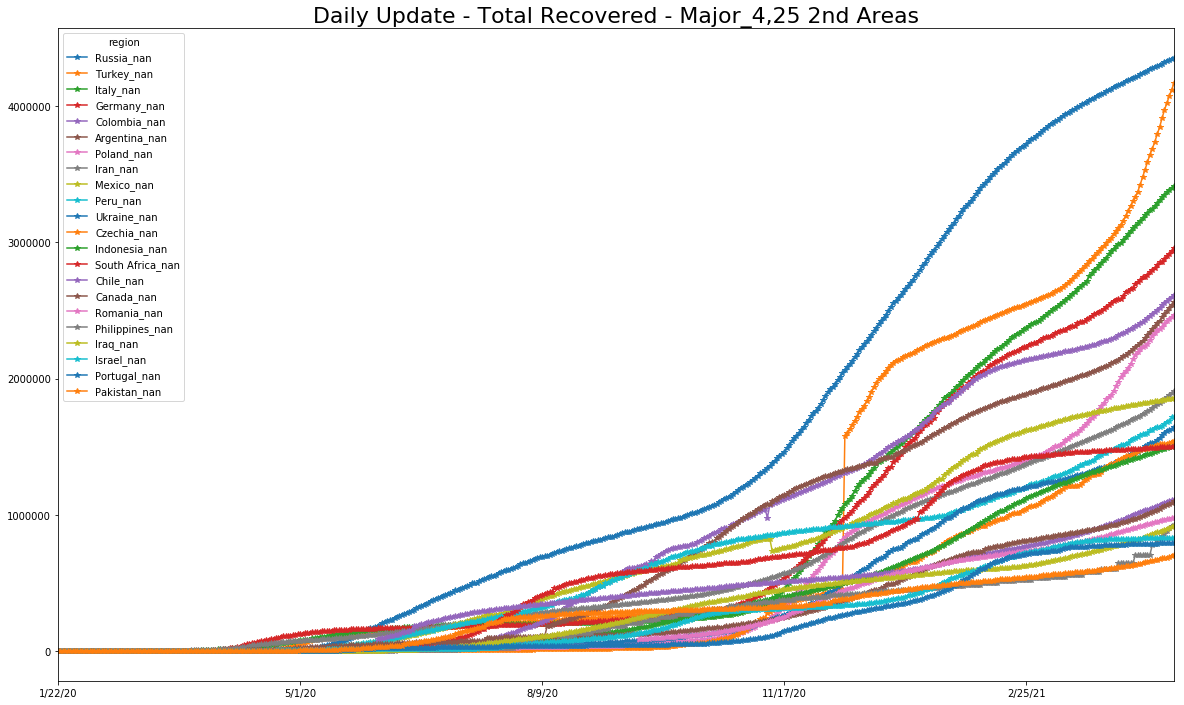

In [17]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts_d.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts_rec.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [18]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime

#
api_key="29d9e51c56b94621b16297bcdeee9c4d" # hxj@mail.xcom
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [19]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      # 'Australia_Queensland',
      # 'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      # 'Cambodia_nan',
      # 'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      # 'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      # 'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
     #  'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Austria_nan',
     #  'Taiwan*_nan', 
     #  'Vietnam_nan',
        'Turkey_nan',
        'Peru_nan',
        'Chile_nan',
        'Mexico_nan'
       ]
#

#### Weather History

In [20]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
if bypass_weather != 1 :
    for h in range(0,max_days):
        offset_days=h
        start_date=pd.to_datetime(start_date_init)
        #
        end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
        start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
        prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
        prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
        #
        for i in range (1,len(confirmed)):
            if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
                continue
            if confirmed.iloc[i,vpos] in my_weather_fetch_list:
                #
                # Clean JSON structure return from API Call
                jas=""
                jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
                if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                     or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                    continue
                try:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
                except Exception:
                    w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
    #        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2021/04/28


In [21]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [22]:
w[:]

Empty DataFrame
Columns: [date, region, min, max]
Index: []

## Kalman Filter With R

In [23]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan, Feb < 06/02 as
### they are too in the Past and model no longuer trains in China Hubei only!
#
## DROP_N=75 => 07/04

drop_n=drop_n_dataset_days

ts=ts[drop_n:]
ts_d=ts_d[drop_n:]
ts_rec=ts_rec[drop_n:]

In [24]:
ts[:3]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
9/13/20            38716        11353        48254         1344        3388   
9/14/20            38772        11520        48496         1438        3439   
9/15/20            38815        11672        48734         1438        3569   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
9/13/20                       95         555537        45862   
9/14/20                       95         565446        45969   
9/15/20                       95         577338        46119   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
9/13/20                                     113                       4170   
9/14/20                                     113                       4177   
9/15/20                                     113                       4185   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
9/13/20  ...            6522914         1808           47287            0   
9/14/20  ...            6557342         1812           47836            0   
9/15/20  ...            6596849         1827           48429            0   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
9/13/20          60540         1063                   30574       2011   
9/14/20          61569         1063                   31362       2013   
9/15/20          62655         1063                   32250       2016   

region   Zambia_nan  Zimbabwe_nan  
9/13/20       13539          7526  
9/14/20       13720          7531  
9/15/20       13819          7576  

[3 rows x 275 columns]

In [25]:
ts[-4:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
4/24/21            58730       130409       120736        13024       25492   
4/25/21            58843       130537       120922        13060       25609   
4/26/21            59015       130606       121112        13083       25710   
4/27/21            59225       130736       121344        13121       25942   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
4/24/21                     1227        2845872       212878   
4/25/21                     1227        2860884       213288   
4/26/21                     1228        2879677       213469   
4/27/21                     1232        2905172       214064   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
4/24/21                                     123                       5420   
4/25/21                                     123                       5428   
4/26/21                                     123                       5440   
4/27/21                                     123                       5449   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Vanuatu_nan  \
4/24/21  ...           32045113       182326           88679            4   
4/25/21  ...           32077178       184865           89027            4   
4/26/21  ...           32124869       187349           89355            4   
4/27/21  ...           32175049       190096           89630            4   

region   Venezuela_nan  Vietnam_nan  West Bank and Gaza_nan  Yemen_nan  \
4/24/21         190523         2833                  290259       6105   
4/25/21         191518         2843                  290972       6137   
4/26/21         192498         2852                  292052       6183   
4/27/21         193721         2857                  293466       6220   

region   Zambia_nan  Zimbabwe_nan  
4/24/21       91317         38064  
4/25/21       91358         38086  
4/26/21       91378         38102  
4/27/21       91418         38164  

[4 rows x 275 columns]

In [26]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [27]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [28]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: 
── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [29]:
p=%R pred_all

In [30]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(2)

date       region   min   max
8379 2020-05-10  Vietnam_nan  26.9  33.0
8380 2020-05-11  Vietnam_nan  25.0  33.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
1     2020-09-14  Afghanistan_nan      38772             0             0   
2     2020-09-15  Afghanistan_nan      38815            56             0   
3     2020-09-16  Afghanistan_nan      38855            43             0   
4     2020-09-17  Afghanistan_nan      38872            40           139   
5     2020-09-18  Afghanistan_nan      38897            17           100   
6     2020-09-19  Afghanistan_nan      38919            25            82   
7     2020-09-20  Afghanistan_nan      39044            22            64   
8     2020-09-21  Afghanistan_nan      39074           125           172   
9     2020-09-22  Afghanistan_nan      39096            30           177   
10    2020-09-23  Afghanistan_nan      39145            22           177   
11    2020-09-24  Afghanistan_nan      39170            49           101   
12    2020-09-25  Afghanistan_nan      39186            25            96   
13    2020-09-26  Afghanistan_nan      39192            16            90   
14    2020-09-27  Afghanistan_nan      39227             6            47   
15    2020-09-28  Afghanistan_nan      39239            35            57   
16    2020-09-29  Afghanistan_nan      39254            12            53   
17    2020-09-30  Afghanistan_nan      39268            15            62   
18    2020-10-01  Afghanistan_nan      39285            14            41   
19    2020-10-02  Afghanistan_nan      39290            17            46   
20    2020-10-03  Afghanistan_nan      39297             5            36   
21    2020-10-04  Afghanistan_nan      39341             7            29   
22    2020-10-05  Afghanistan_nan      39422            44            56   
23    2020-10-06  Afghanistan_nan      39486            81           132   
24    2020-10-07  Afghanistan_nan      39548            64           189   
25    2020-10-08  Afghanistan_nan      39616            62           207   
26    2020-10-09  Afghanistan_nan      39693            68           194   
27    2020-10-10  Afghanistan_nan      39703            77           207   
28    2020-10-11  Afghanistan_nan      39799            10           155   
29    2020-10-12  Afghanistan_nan      39870            96           183   
30    2020-10-13  Afghanistan_nan      39928            71           177   
...          ...              ...        ...           ...           ...   
64038 2021-03-30     Zimbabwe_nan      36839            17            34   
64039 2021-03-31     Zimbabwe_nan      36882             0            21   
64040 2021-04-01     Zimbabwe_nan      36896            43            60   
64041 2021-04-02     Zimbabwe_nan      36903            14            57   
64042 2021-04-03     Zimbabwe_nan      36911             7            64   
64043 2021-04-04     Zimbabwe_nan      36923             8            29   
64044 2021-04-05     Zimbabwe_nan      36934            12            27   
64045 2021-04-06     Zimbabwe_nan      36966            11            31   
64046 2021-04-07     Zimbabwe_nan      36984            32            55   
64047 2021-04-08     Zimbabwe_nan      37052            18            61   
64048 2021-04-09     Zimbabwe_nan      37147            68           118   
64049 2021-04-10     Zimbabwe_nan      37273            95           181   
64050 2021-04-11     Zimbabwe_nan      37288           126           289   
64051 2021-04-12     Zimbabwe_nan      37307            15           236   
64052 2021-04-13     Zimbabwe_nan      37330            19           160   
64053 2021-04-14     Zimbabwe_nan      37369            23            57   
64054 2021-04-15     Zimbabwe_nan      37422            39            81   
64055 2021-04-16     Zimbabwe_nan      37534            53           115   
64056 2021-04-17     Zimbabwe_nan      37699           112           204   
64057 2021-04-18     Zimbabwe_nan      37751           165           330   
64058 2021-04-19     Zimbabwe_nan      37859            52  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue

train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
64067 2021-04-28  Zimbabwe_nan          0            62           100   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
64067           289         100.162747         100.262742         100.763063   

       last_day  kalman_prediction  population  infected_rate  min  max  
64067     38164            38198.0    14862924       0.000026  NaN  NaN

In [40]:
## JOAO - FIX Drop Duplicates
train=train.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
## JOAO - FIX Drop empty region='nan_nan'
train=train[train['region']!='nan_nan']
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
64067 2021-04-28  Zimbabwe_nan          0            62           100   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
64067           289         100.162747         100.262742         100.763063   

       last_day  kalman_prediction  population  infected_rate  min  max  
64067     38164            38198.0    14862924       0.000026  NaN  NaN

In [41]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=pd.read_csv('data/train.csv', sep=',', encoding='latin1')
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="World v2 -- Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percentage : infected_rate confirmed']=ratiod['infected_rate']*100
### Assumption : Each affected person can contact up to 9 others that not report or are assimptomatic COVID19 cases.
ratiod['population_percentage : factor 9/10 infected_rate confirmed']=np.clip(ratiod['infected_rate']*900,0.0,1.0)
#
ratiod['delta : pred new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta : pred new_cases per 1M hab']=ratiod['delta : pred new_cases']/ratiod['population']*1000000

### roling 7day_AVG
ratiod['delta : roling 7day AVG']=ratiod['7_day_change']/7
ratiod['delta : aprox 14-day case notification rate per 100k hab']=(ratiod['7_day_change']*2)/ratiod['population']*100000
###

ratiod=ratiod.rename(columns={'kalman_prediction': 'confirmed_prediction', 'last_day': 'confirmed_yesterday'})
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)
ratiod[-3:]

date        region  confirmed  1_day_change  3_day_change  \
62697  2021-04-26  Zimbabwe_nan      38102            22            68   
62698  2021-04-27  Zimbabwe_nan      38164            16            57   
62699  2021-04-28  Zimbabwe_nan          0            62           100   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
62697           335         100.057824         100.178889         100.887420   
62698           243         100.042036         100.149849         100.641882   
62699           289         100.162747         100.262742         100.763063   

       confirmed_yesterday  ...  population  infected_rate  min  max  \
62697                38086  ...    14862924       0.000026  NaN  NaN   
62698                38102  ...    14862924       0.000026  NaN  NaN   
62699                38164  ...    14862924       0.000026  NaN  NaN   

       population_percentage : infected_rate confirmed  \
62697                                         0.002563   
62698                                         0.002564   
62699                                         0.002568   

       population_percentage : factor 9/10 infected_rate confirmed  \
62697                                           0.023063             
62698                                           0.023073             
62699                                           0.023110             

       delta : pred new_cases  delta : pred new_cases per 1M hab  \
62697                    82.0                           5.517084   
62698                    67.0                           4.507861   
62699                    34.0                           2.287571   

       delta : roling 7day AVG  \
62697                47.857143   
62698                34.714286   
62699                41.285714   

       delta : aprox 14-day case notification rate per 100k hab  
62697                                           4.507861         
62698                                           3.269881         
62699                                           3.888871         

[3 rows x 21 columns]

## Kalman 1 day Prediction with Evaluation

                region           mse          rmse           mae
265  United States_nan  4.582716e+12  2.140728e+06  170491.15859


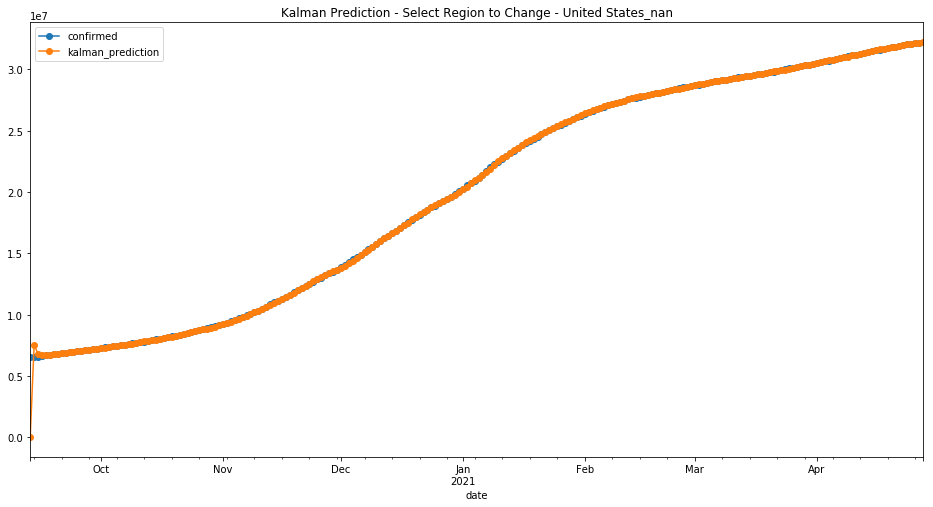

In [42]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse           rmse           mae
214  Russia_nan  9.885739e+10  314415.946441  23356.176211


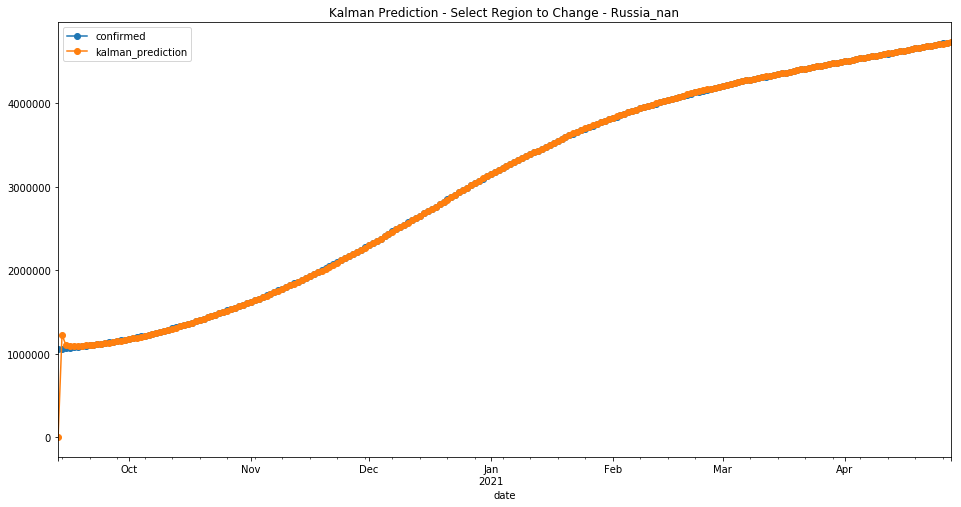

In [43]:
# Select region
region='Russia_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse           mae
30  Brazil_nan  9.281684e+11  963414.96651  86424.704846


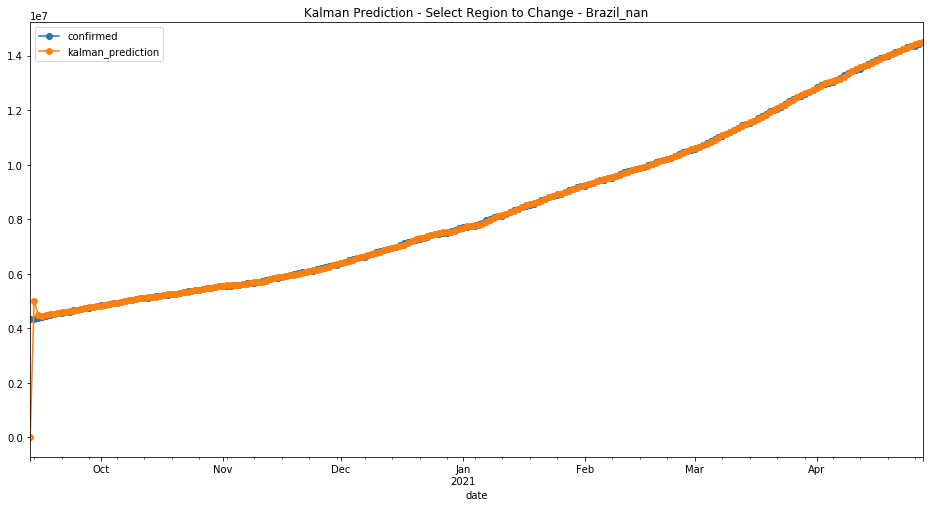

In [44]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse           rmse           mae
264  United Kingdom_nan  8.581209e+10  292937.011879  24419.643172


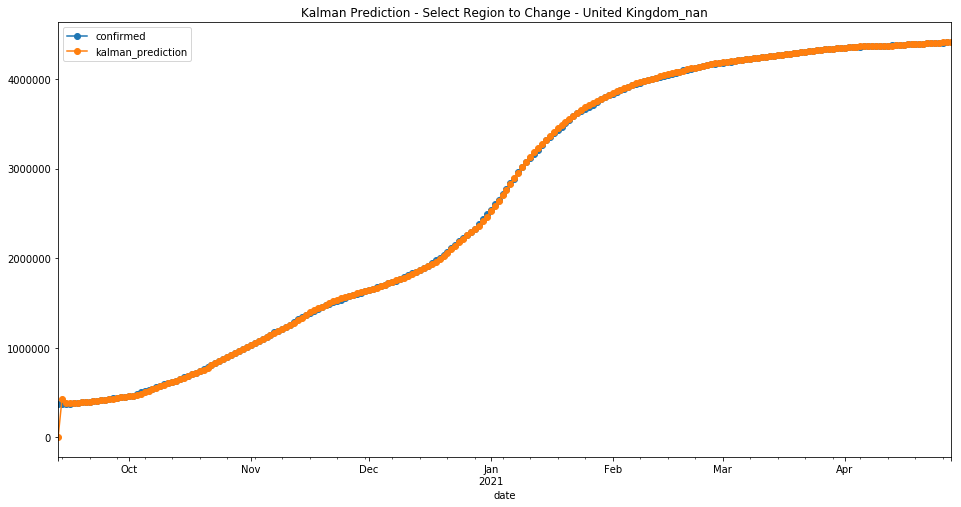

In [45]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [46]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.10" 2021-01-19; OpenJDK Runtime Environment (build 11.0.10+9-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.10+9-Ubuntu-0ubuntu1.18.04, mixed mode)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp28fr3i67
  JVM stdout: /tmp/tmp28fr3i67/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp28fr3i67/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    2 years, 6 months and 1 day !!!
H2O cluster name:           H2O_from_python_unknownUser_mb7jmi
H2O cluster total nodes:    1
H2O cluster free memory:    3.543 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.7 final
--------------------------  ----------------------------------------

In [47]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

# Set minimum of 14 training day 2weeks.
#
if number_past_days_training>=7 : 
    ntraindays=number_past_days_training 
else : 
    ntraindays=7
#
to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-ntraindays)).strftime('%Y-%m-%d') # ntraindays/7 weeks =ntraindays days training
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*5,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2021-04-01
last_train_date= 2021-04-27
first_bootstrap_date= 2021-04-19
boost_bootstrap_date= 2021-04-24
first_test_date= 2021-04-18
last_test_date= 2021-04-28
first_valid_date= 2021-04-26


In [48]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'min', 'max',
            'infected_rate',
            'kalman_prediction'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [49]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [50]:
pred2.iloc[:25]

0  confirmed       date           region
0    57976.0      57898 2021-04-19  Afghanistan_nan
1    58079.0      58037 2021-04-20  Afghanistan_nan
2    58213.0      58214 2021-04-21  Afghanistan_nan
3    58393.0      58312 2021-04-22  Afghanistan_nan
4    58510.0      58542 2021-04-23  Afghanistan_nan
5    58737.0      58730 2021-04-24  Afghanistan_nan
6    58936.0      58843 2021-04-25  Afghanistan_nan
7    59083.0      59015 2021-04-26  Afghanistan_nan
8    59256.0      59225 2021-04-27  Afghanistan_nan
9    59461.0          0 2021-04-28  Afghanistan_nan
10  129636.0     129694 2021-04-19      Albania_nan
11  129713.0     129842 2021-04-20      Albania_nan
12  129850.0     129980 2021-04-21      Albania_nan
13  129971.0     130114 2021-04-22      Albania_nan
14  130097.0     130270 2021-04-23      Albania_nan
15  130248.0     130409 2021-04-24      Albania_nan
16  130384.0     130537 2021-04-25      Albania_nan
17  130513.0     130606 2021-04-26      Albania_nan
18  130577.0     130736 2021-04-27      Albania_nan
19  130708.0          0 2021-04-28      Albania_nan
20  119873.0     119805 2021-04-19      Algeria_nan
21  120039.0     119992 2021-04-20      Algeria_nan
22  120227.0     120174 2021-04-21      Algeria_nan
23  120411.0     120363 2021-04-22      Algeria_nan
24  120604.0     120562 2021-04-23      Algeria_nan

In [51]:
pred2.iloc[175:195]

0  confirmed       date          region
175  311639.0     311465 2021-04-24  Azerbaijan_nan
176  313314.0     313006 2021-04-25  Azerbaijan_nan
177  314827.0     313812 2021-04-26  Azerbaijan_nan
178  315434.0     315119 2021-04-27  Azerbaijan_nan
179  316744.0          0 2021-04-28  Azerbaijan_nan
180    9712.0       9791 2021-04-19     Bahamas_nan
181    9575.0       9791 2021-04-20     Bahamas_nan
182    9866.0       9868 2021-04-21     Bahamas_nan
183    9835.0       9868 2021-04-22     Bahamas_nan
184    9939.0       9976 2021-04-23     Bahamas_nan
185    9879.0       9976 2021-04-24     Bahamas_nan
186   10051.0      10050 2021-04-25     Bahamas_nan
187   10013.0      10220 2021-04-26     Bahamas_nan
188   10017.0      10220 2021-04-27     Bahamas_nan
189   10325.0          0 2021-04-28     Bahamas_nan
190  164708.0     165118 2021-04-19     Bahrain_nan
191  165698.0     166157 2021-04-20     Bahrain_nan
192  166709.0     167165 2021-04-21     Bahrain_nan
193  167697.0     168201 2021-04-22     Bahrain_nan
194  168712.0     169254 2021-04-23     Bahrain_nan

In [52]:
pred2.iloc[220:240]

0  confirmed       date       region
220  345279.0     345110 2021-04-19  Belarus_nan
221  346144.0     345998 2021-04-20  Belarus_nan
222  347042.0     347316 2021-04-21  Belarus_nan
223  348366.0     348486 2021-04-22  Belarus_nan
224  349465.0     350221 2021-04-23  Belarus_nan
225  351301.0     351674 2021-04-24  Belarus_nan
226  352721.0     352950 2021-04-25  Belarus_nan
227  354085.0     353846 2021-04-26  Belarus_nan
228  354962.0     354669 2021-04-27  Belarus_nan
229  355775.0          0 2021-04-28  Belarus_nan
230  953421.0     951626 2021-04-19  Belgium_nan
231  954758.0     955056 2021-04-20  Belgium_nan
232  958339.0     960169 2021-04-21  Belgium_nan
233  963421.0     964526 2021-04-22  Belgium_nan
234  967623.0     968107 2021-04-23  Belgium_nan
235  971342.0     972041 2021-04-24  Belgium_nan
236  975525.0     974418 2021-04-25  Belgium_nan
237  977704.0     976088 2021-04-26  Belgium_nan
238  979230.0     979034 2021-04-27  Belgium_nan
239  982137.0          0 2021-04-28  Belgium_nan

In [53]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col #+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data = ',model_v2.r2(valid=True))

# MSE on the training data =  5400501461.595474
# MSE on the validation data =  14398217483208.225
# R^2 on the training data =  0.9996958279168239
# R^2 on the validation data =  0.4614162517888205


In [55]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1619589752880_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 5400501461.595474
RMSE: 73488.1042182711
MAE: 7365.868743222223
RMSLE: 0.19621450609198288
Mean Residual Deviance: 5400501461.595474

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 14398217483208.225
RMSE: 3794498.317723731
MAE: 1030875.2653772093
RMSLE: 7.659063614463768
Mean Residual Deviance: 14398217483208.225
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2021-04-28 06:02:40  0.061 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2021-04-28 06:02:41  0.466 sec   1.0                144597.0399109646   19351.87287258879   20908303951.01309    3896967.100828676   1019585.4285316811  15186352584941.055
     2021-04-28 06:02:41  0.915 sec   2.0                149255.19430011808  22955.646532787352  22277113025.565998   3933611.3048262536  1022538.9868939373  15473297897456.902
     2021-04-28 06:02:41  1.082 sec   3.0                123148.8023731306   19803.953416574823  15165627525.936378   3929554.223819339   1023566.1629402576  15441396397936.41
     2021-04-28 06:02:41  1.181 sec   4.0                116531.00697602911  20073.67315651456   13579475586.847345   3570452.5124636036  1025919.983388978   12748131143757.658
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2021-04-28 06:02:56  16.137 sec  262.0              76383.60247140119   7691.261101175367   5834454726.509047    3810335.881646337   1033506.8330965621  14518659530961.568
     2021-04-28 06:03:00  20.173 sec  341.0              75112.72353636203   7582.860119139667   5641921237.049953    3785108.4459927664  1031614.0771024385  14327045947925.775
     2021-04-28 06:03:04  24.216 sec  418.0              73191.28589421095   7464.927258239301   5356964330.848123    3788999.5617333516  1030596.0351371637  14356517678815.531
     2021-04-28 06:03:08  28.259 sec  494.0              73530.06708485672   7382.449599318778   5406670765.5035305   3793597.4151530433  1031024.7642969699  14391381348255.852
     2021-04-28 06:03:09  28.969 sec  500.0              73488.1042182711    7365.868743222223   5400501461.595474    3794498.317723731   1030875.2653772093  14398217483208.225


See the whole table with table.as_data_frame()
Variable Importances: 


variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
last_day           2.40912e+19            1                    0.348952
kalman_prediction  1.81361e+19            0.75281              0.262695
region             1.09174e+19            0.453169             0.158134
7_day_change       6.74102e+18            0.279813             0.0976412
3_day_change       3.66866e+18            0.152282             0.0531392
infected_rate      1.89405e+18            0.0786198            0.0274346
1_day_change       1.19468e+18            0.0495899            0.0173045
min                1.09426e+18            0.0454217            0.01585
max                1.00938e+18            0.0418983            0.0146205
7_day_change_rate  1.60724e+17            0.00667148           0.00232803
3_day_change_rate  8.74354e+16            0.00362935           0.00126647
1_day_change_rate  4.37785e+16            0.0018172            0.000634116

In [56]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  scaled_importance  percentage
0            last_day         2.409119e+19           1.000000    0.348952
1   kalman_prediction         1.813610e+19           0.752810    0.262695
2              region         1.091739e+19           0.453169    0.158134
3        7_day_change         6.741021e+18           0.279813    0.097641
4        3_day_change         3.668662e+18           0.152282    0.053139
5       infected_rate         1.894045e+18           0.078620    0.027435
6        1_day_change         1.194679e+18           0.049590    0.017304
7                 min         1.094263e+18           0.045422    0.015850
8                 max         1.009379e+18           0.041898    0.014620
9   7_day_change_rate         1.607239e+17           0.006671    0.002328
10  3_day_change_rate         8.743542e+16           0.003629    0.001266
11  1_day_change_rate         4.377852e+16           0.001817    0.000634

In [57]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


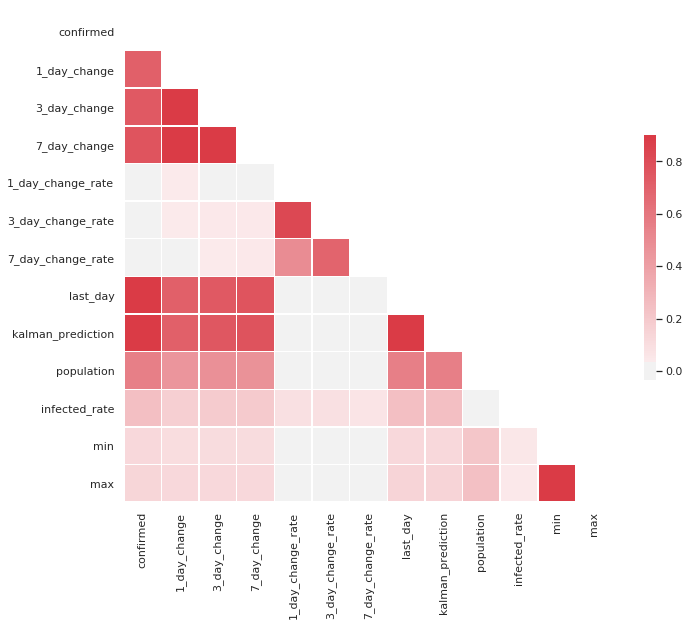

In [58]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [59]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.717327
3_day_change         0.750076
7_day_change         0.768738
1_day_change_rate    0.024711
3_day_change_rate    0.022709
7_day_change_rate    0.014995
last_day             0.993988
kalman_prediction    0.994253
population           0.559303
infected_rate        0.249250
min                  0.119604
max                  0.140771
Name: confirmed, dtype: float64


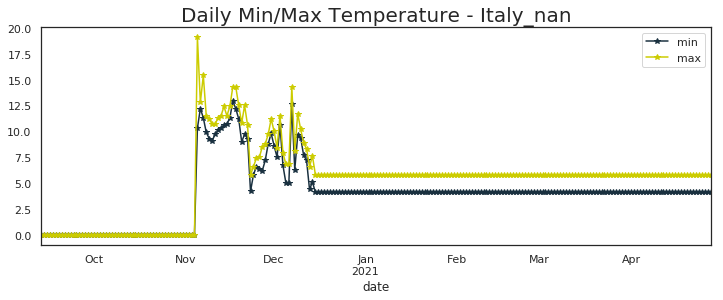

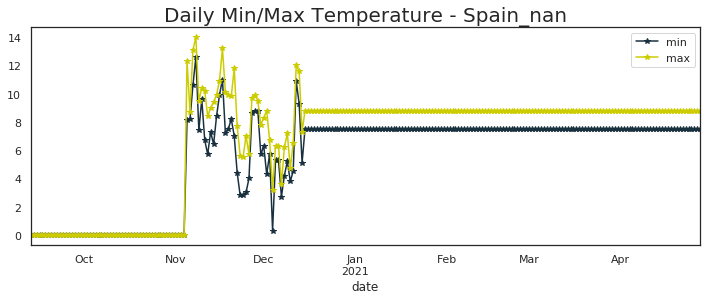

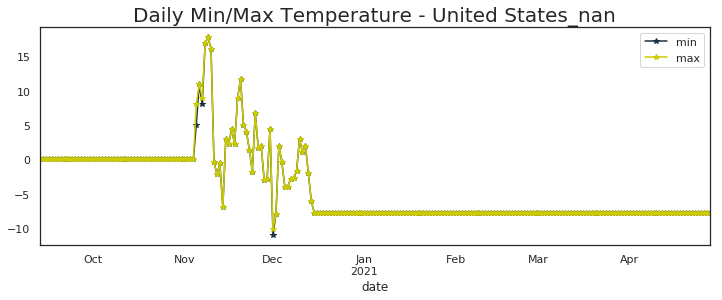

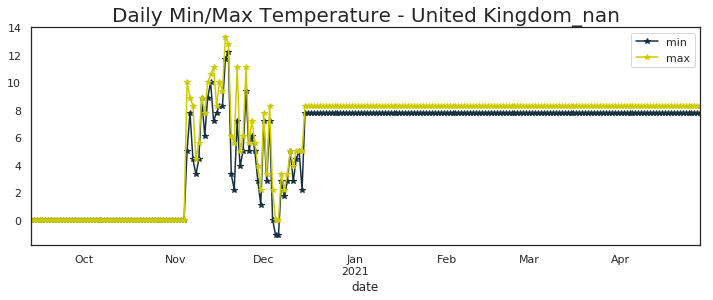

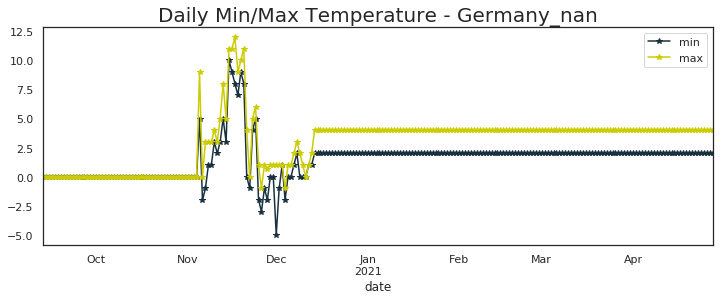

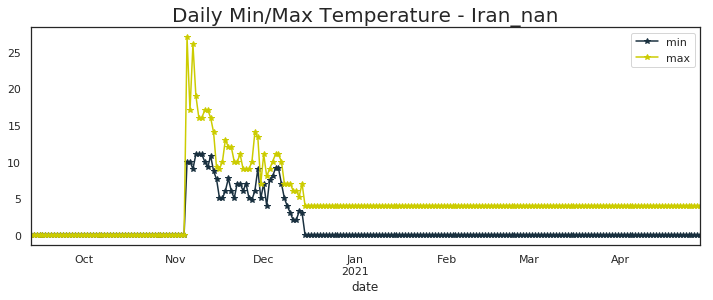

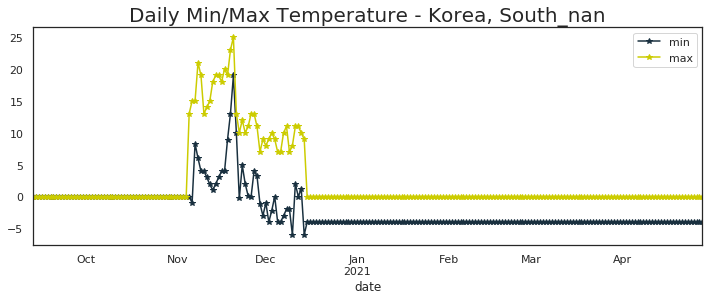

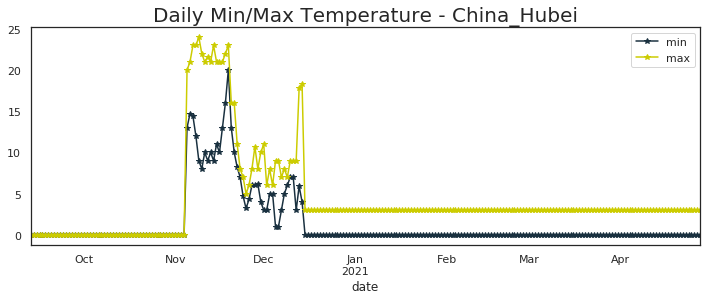

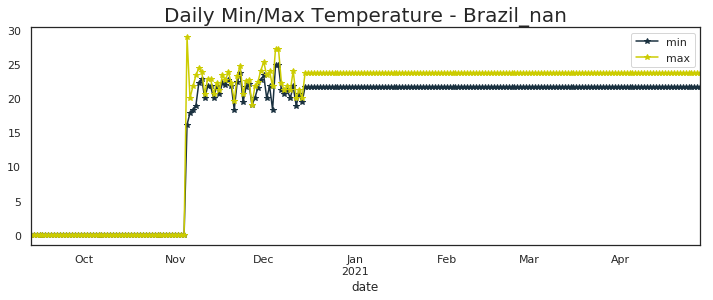

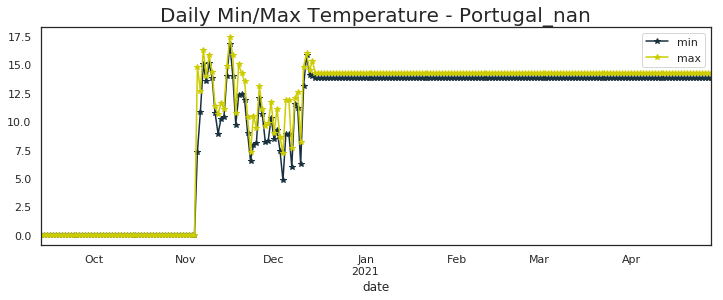

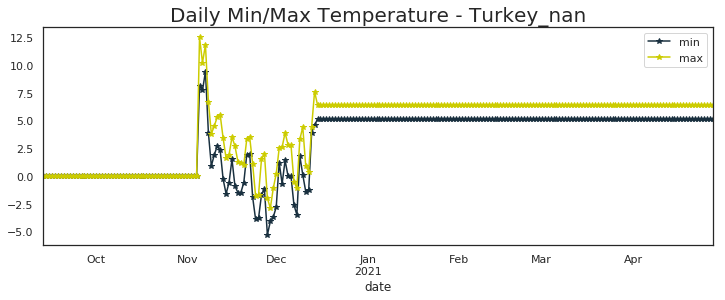

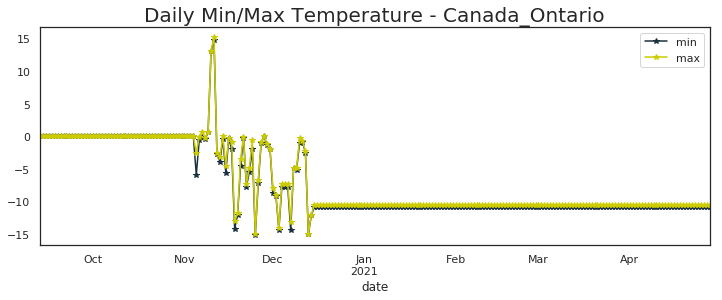

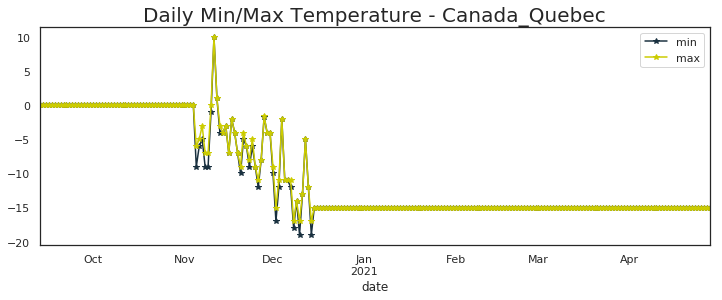

In [60]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [61]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           17.8  17.8
India_nan                   22.0  31.0
Brazil_nan                  24.8  28.9
France_nan                  12.1  13.3
Russia_nan                   0.0   4.0
Turkey_nan                   9.4  12.5
United Kingdom_nan          12.2  13.3
Italy_nan                   12.9  19.1
Spain_nan                   12.6  14.0
Germany_nan                 10.0  12.0
Argentina_nan                0.0   0.0
Colombia_nan                 0.0   0.0
Poland_nan                   8.9  10.6
Iran_nan                    11.0  27.0
Mexico_nan                  15.1  15.1
Ukraine_nan                  0.0   0.0
Peru_nan                    24.6  29.9
Indonesia_nan                0.0   0.0
Czechia_nan                  0.0   0.0
South Africa_nan             0.0   0.0
Netherlands_nan             14.4  16.1
Chile_nan                   18.0  22.0
Romania_nan                 

### Kalman X Days Ahead Prediction

In [62]:
%%R

#install.packages('reshape')

NULL


In [63]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  date = col_date(format = "")
)
ℹ Use `spec()` for the full column specifications.




In [64]:
all_new=%R all_new

In [65]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

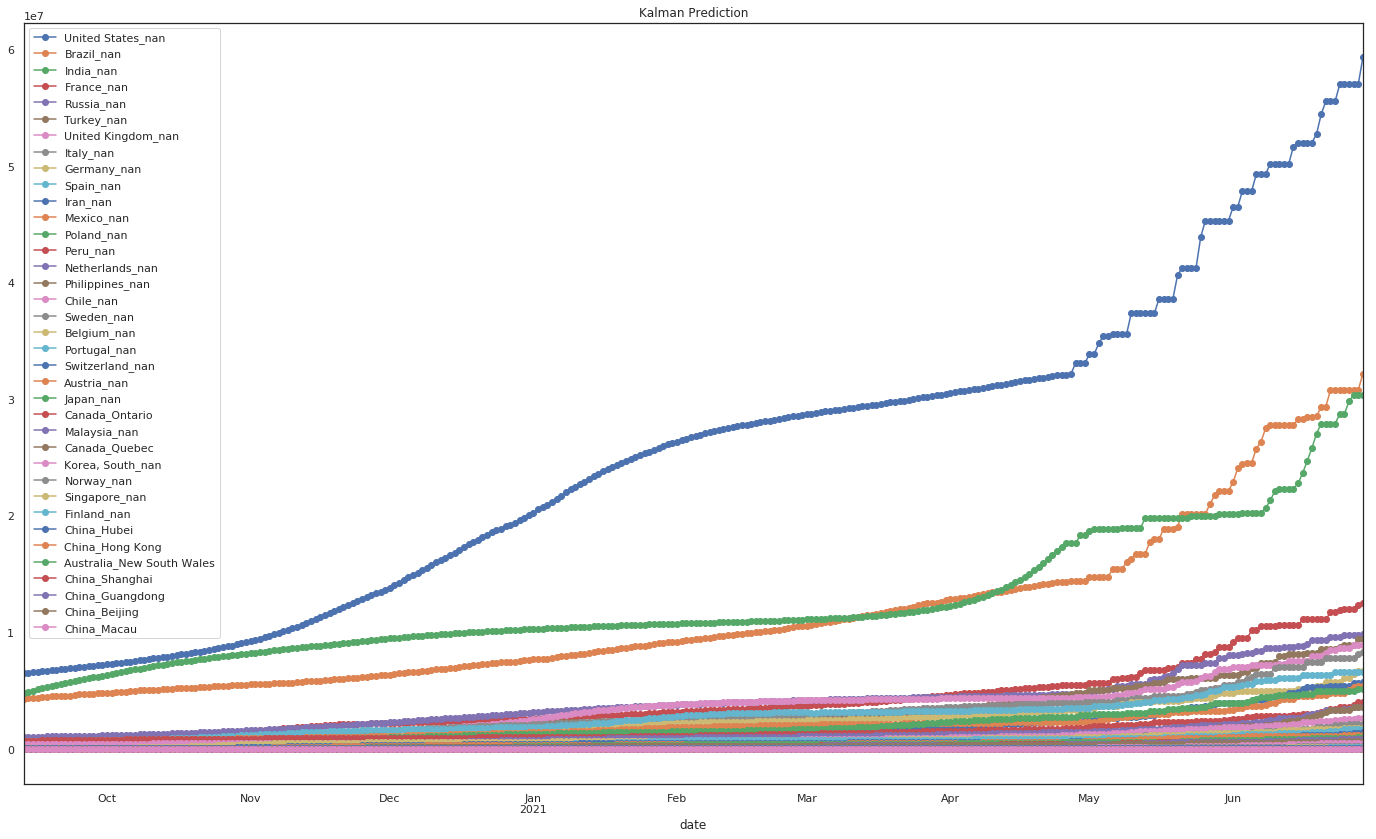

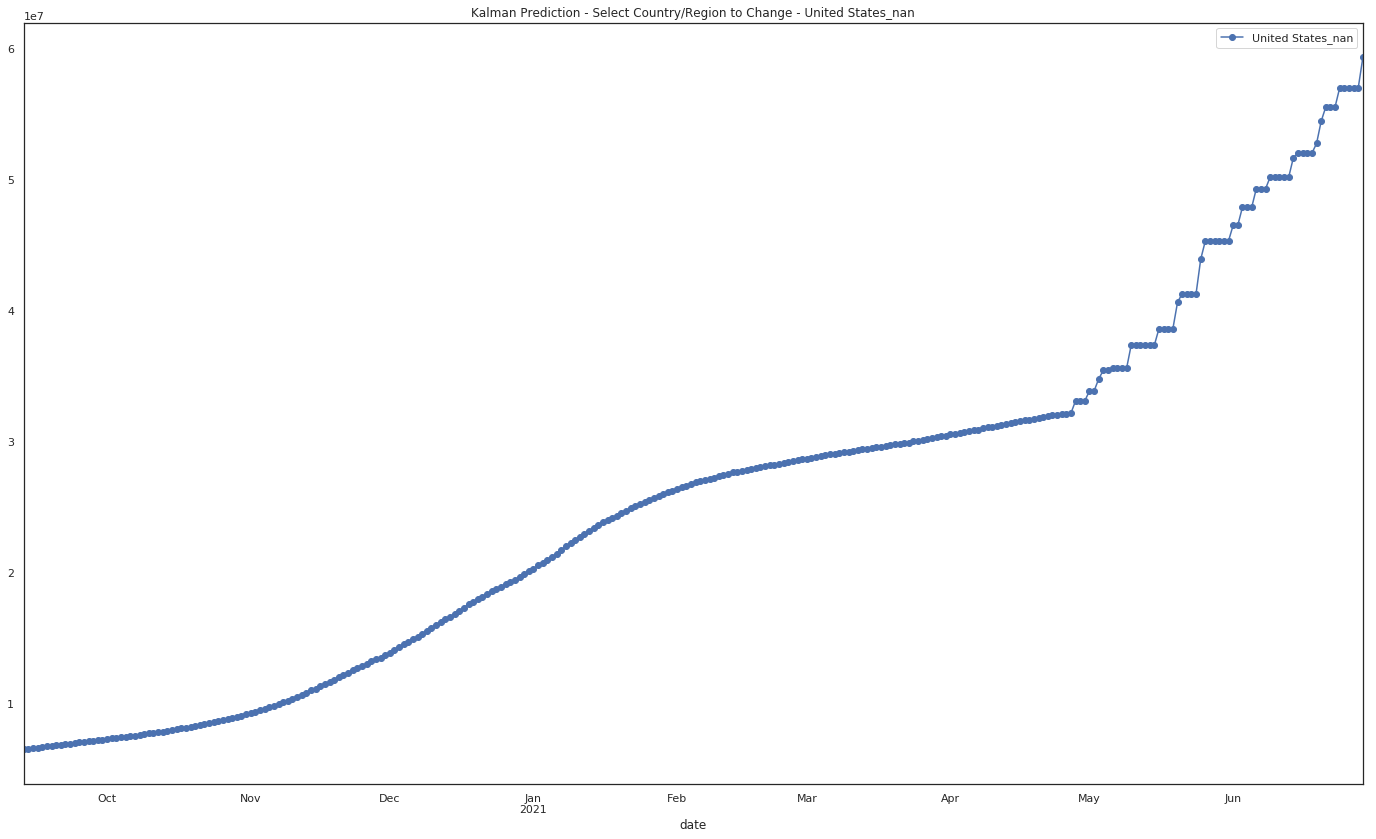

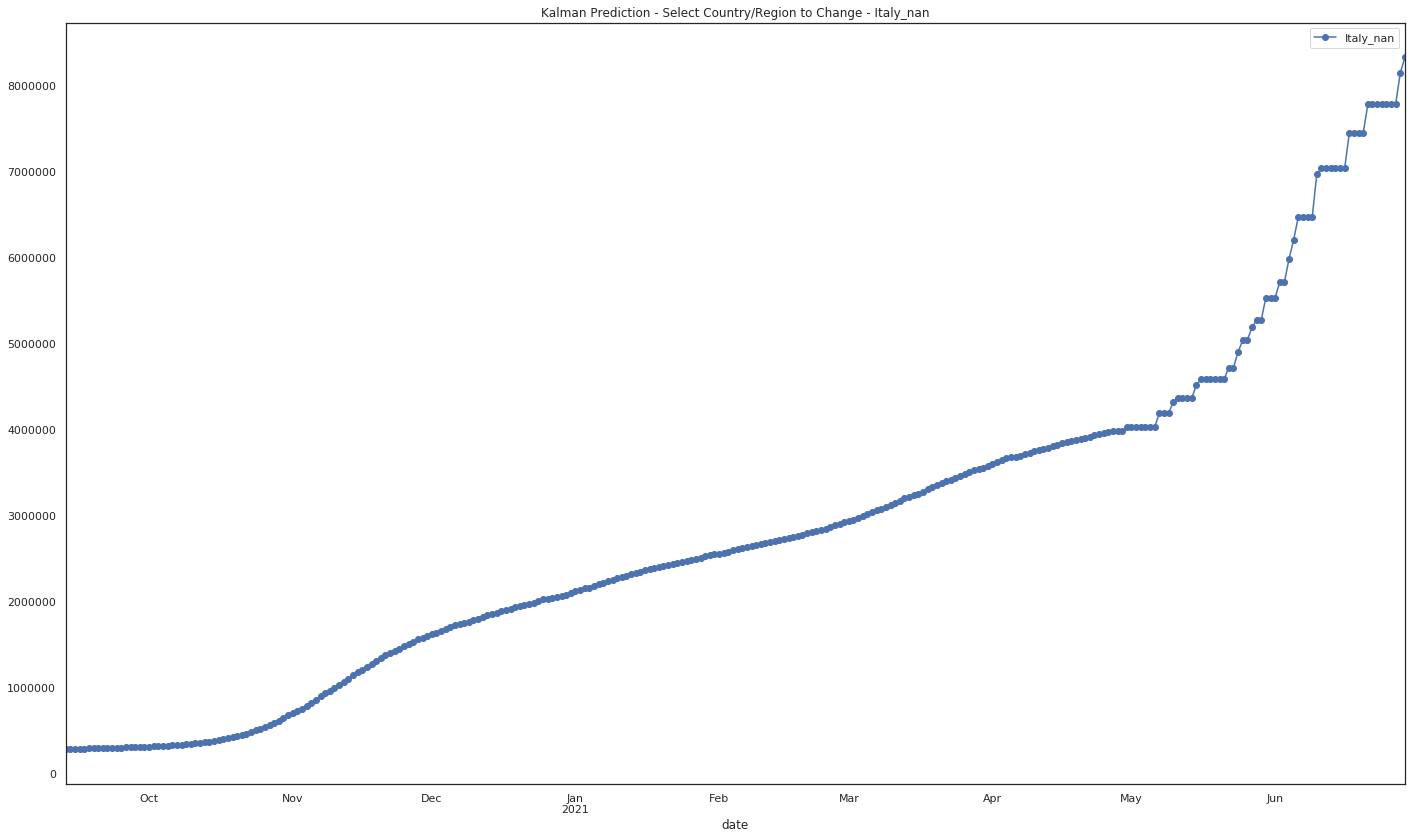

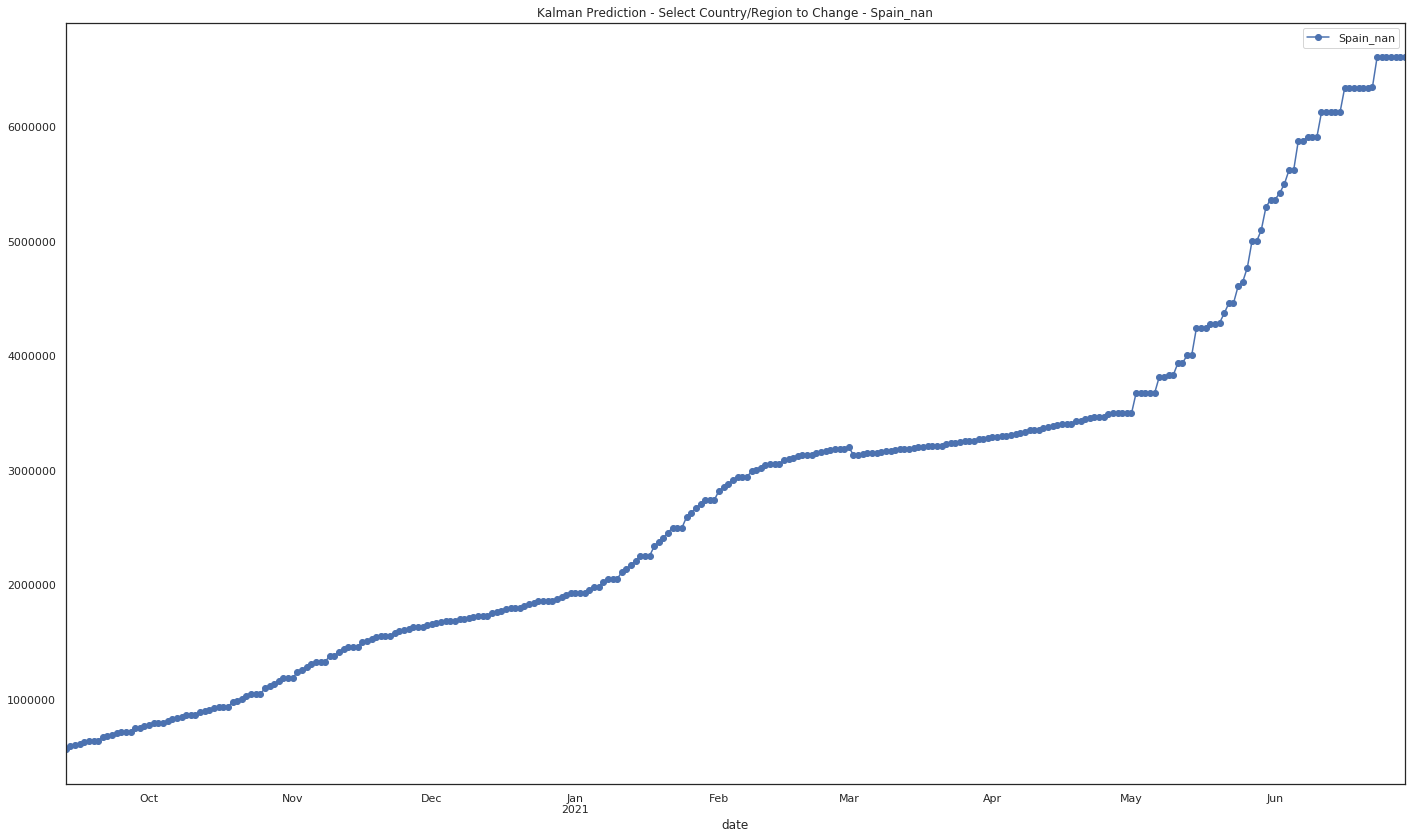

In [66]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman=p_kalman.reindex(p_kalman.max().sort_values(ascending=False).index, axis=1)
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


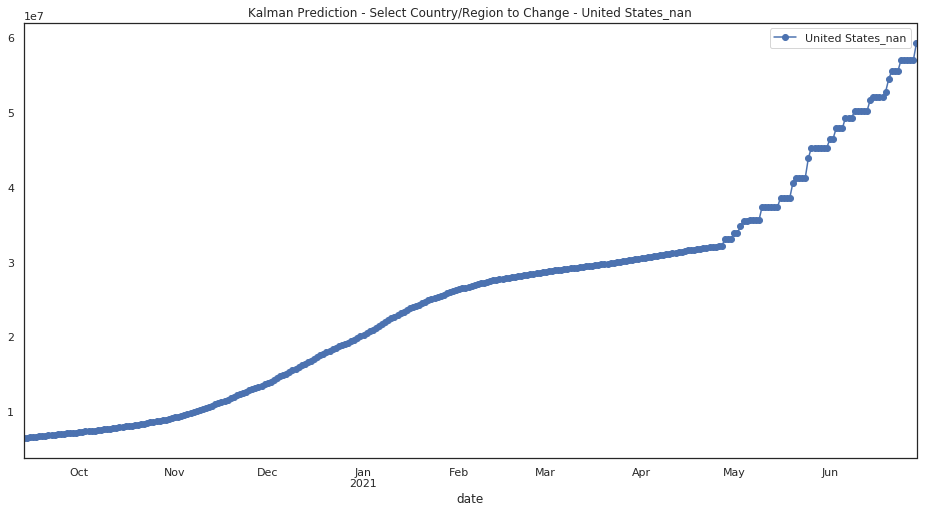

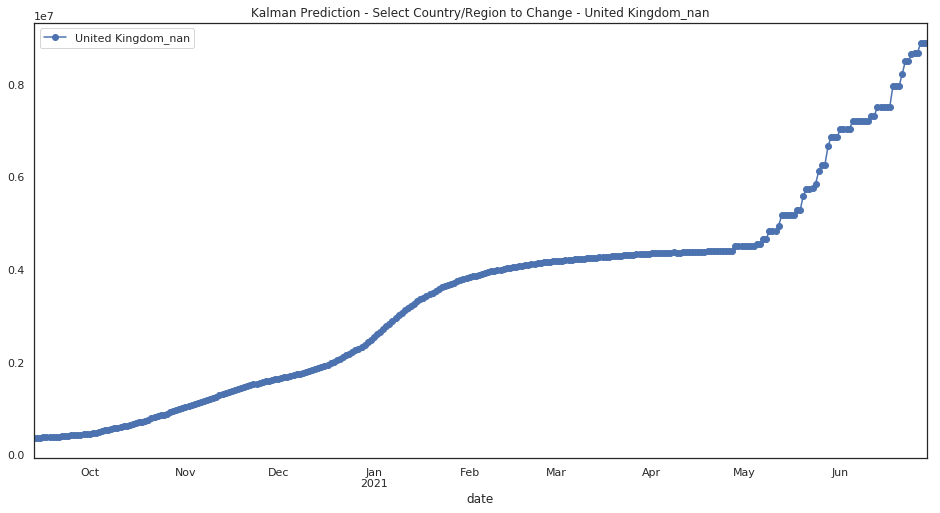

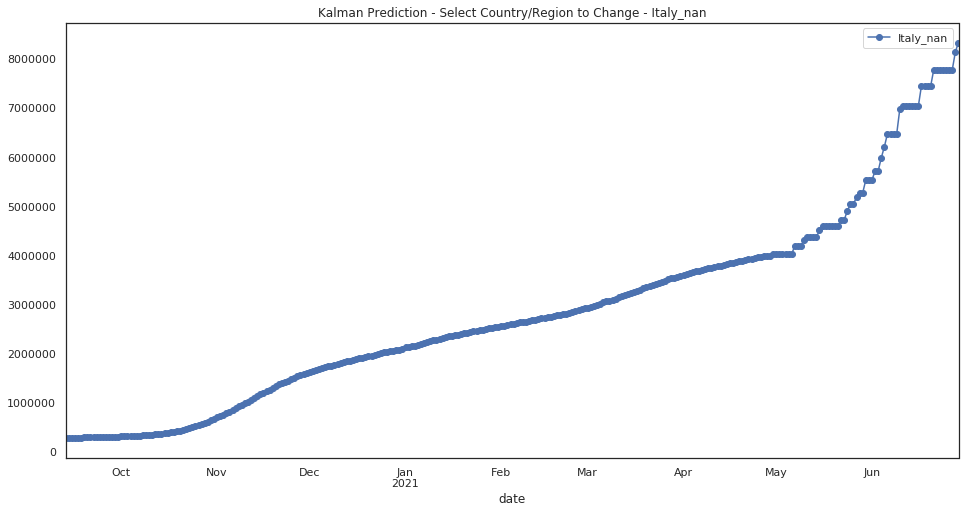

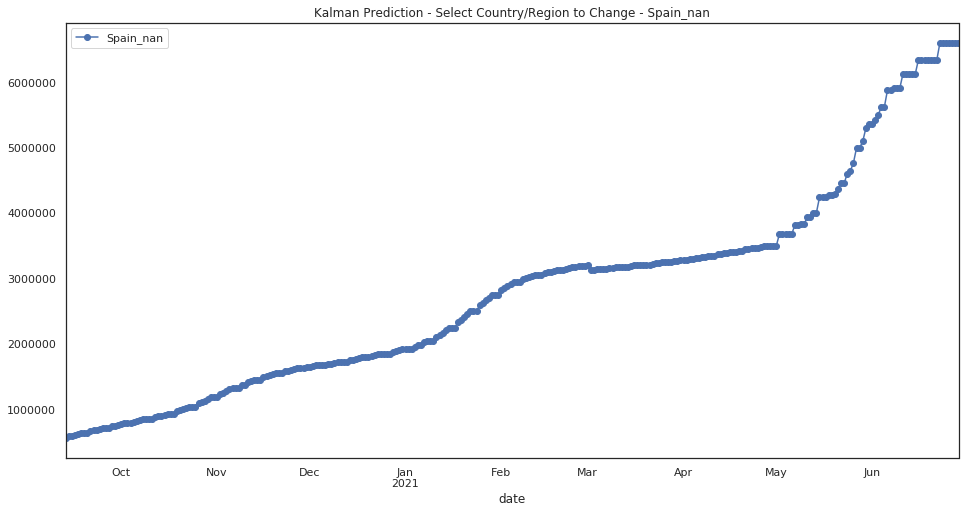

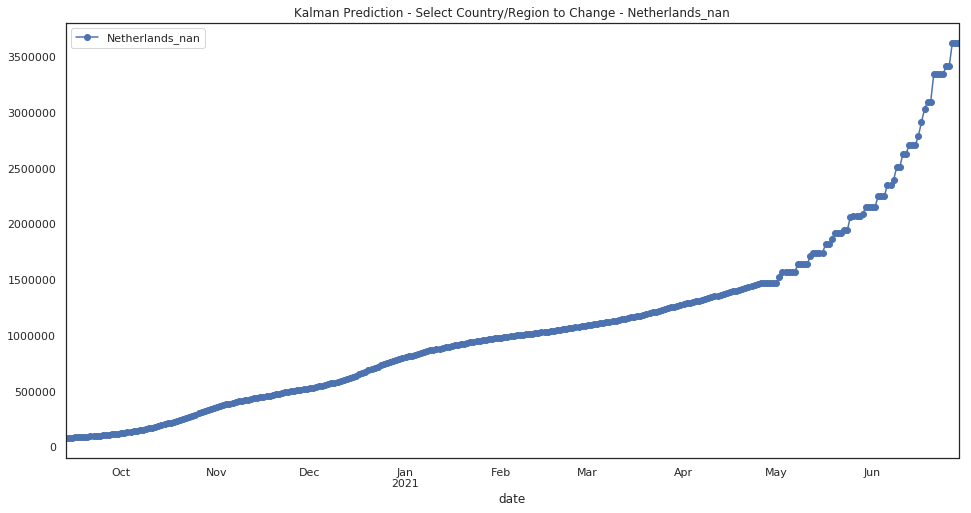

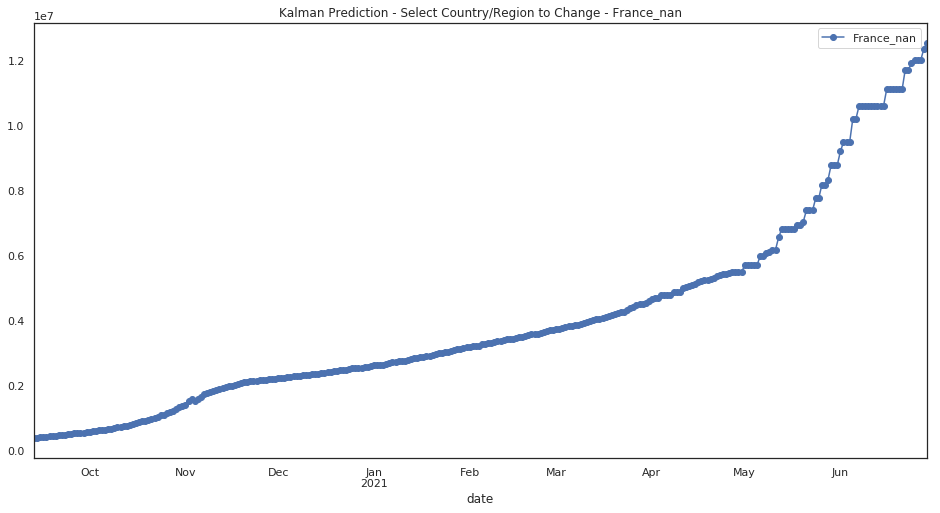

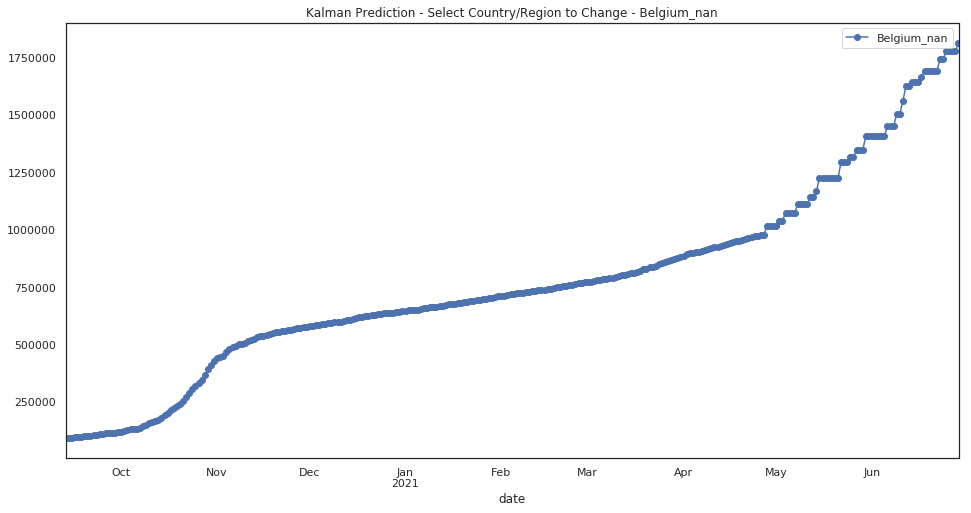

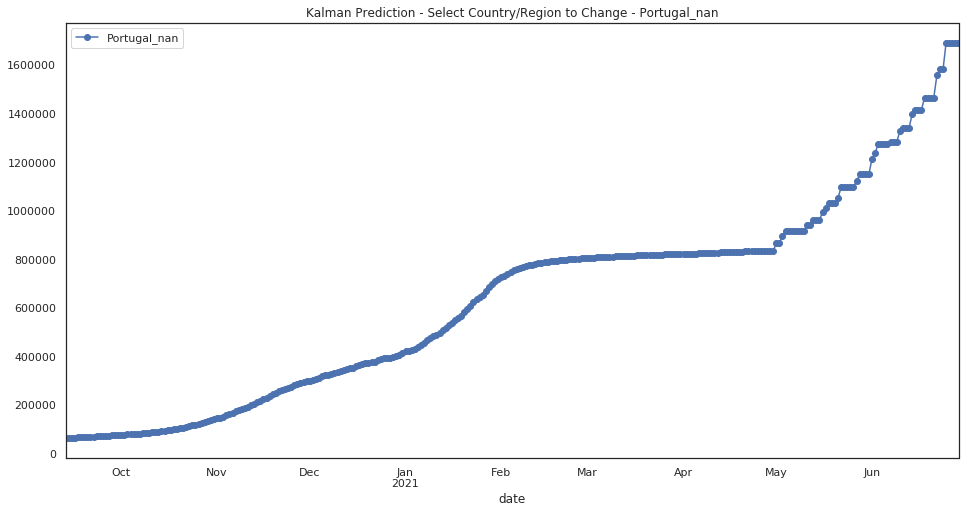

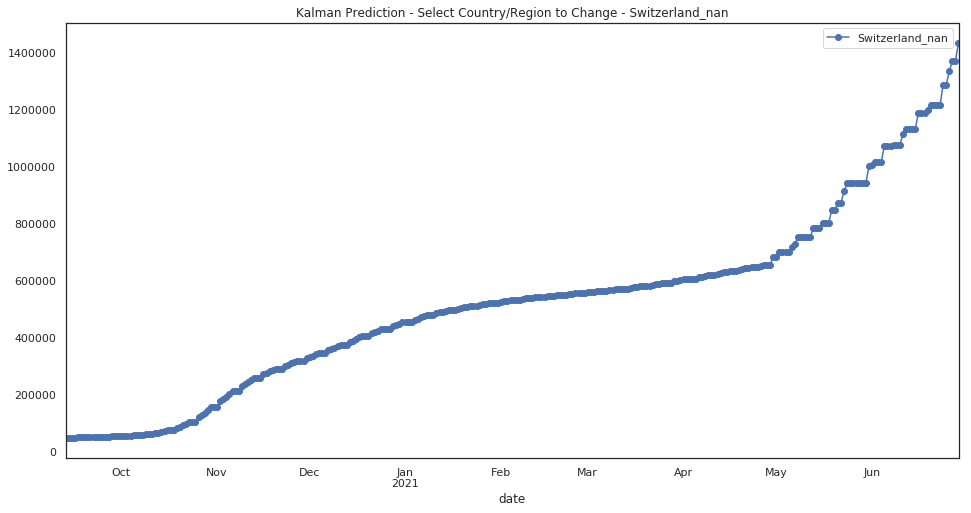

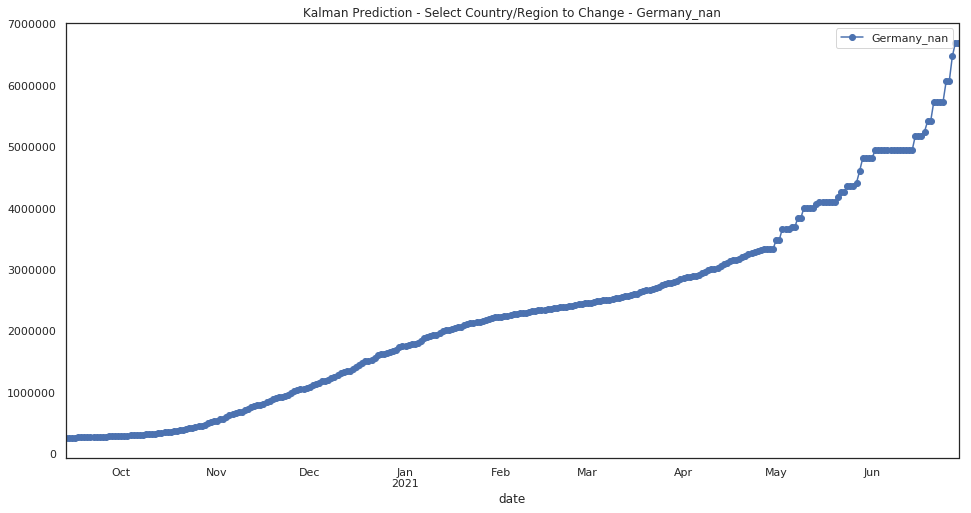

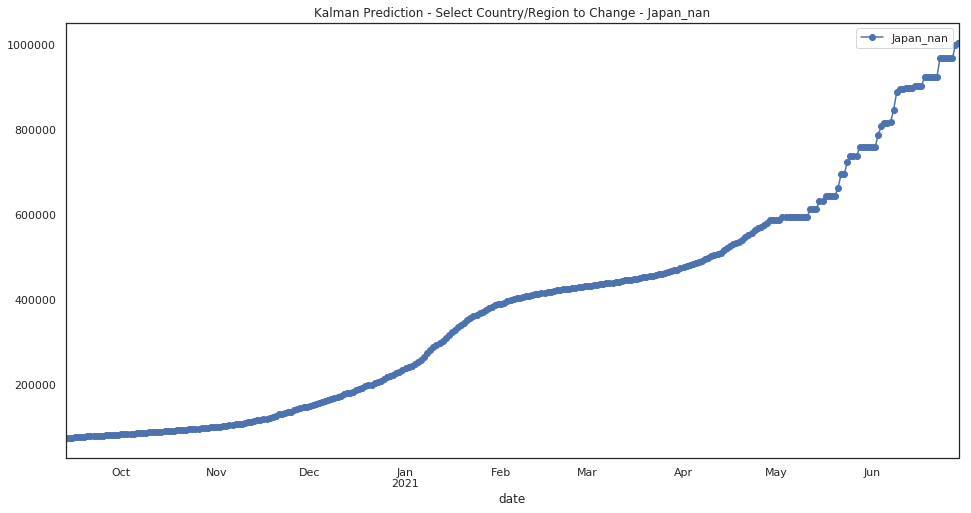

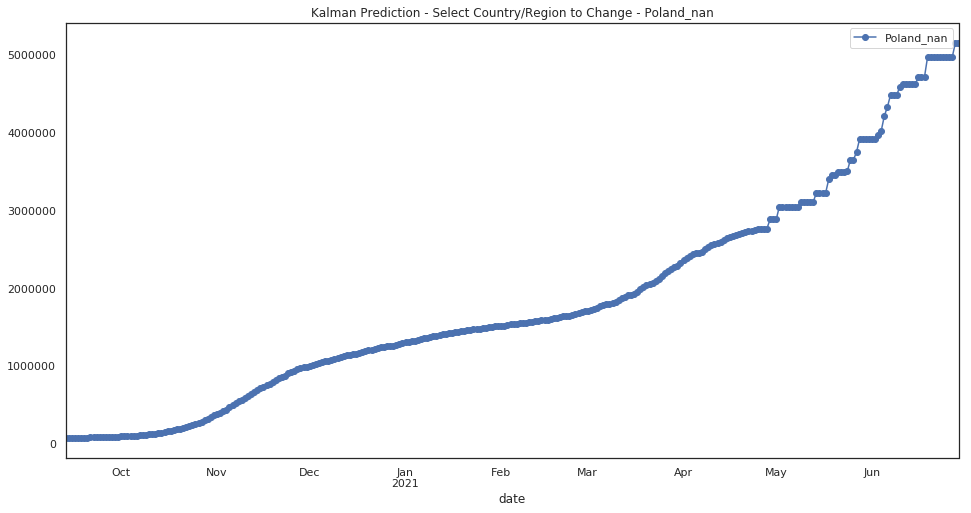

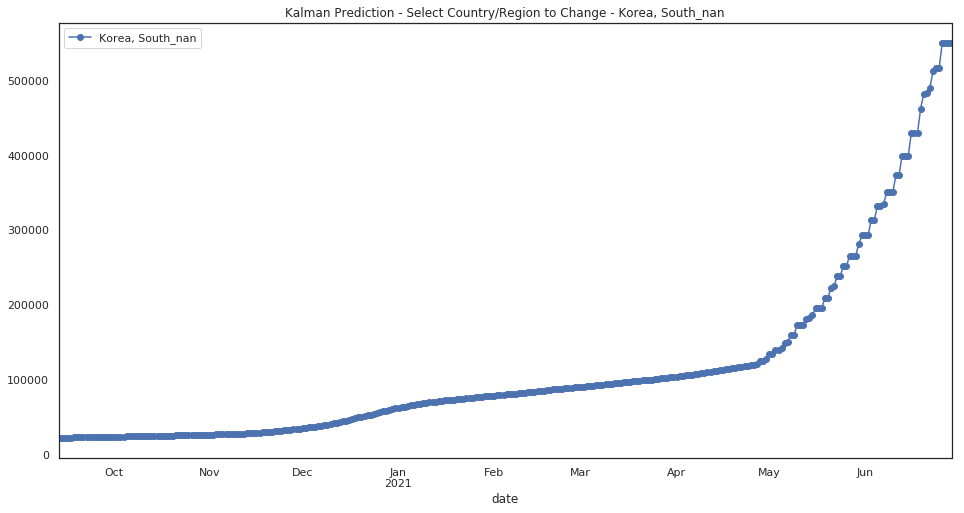

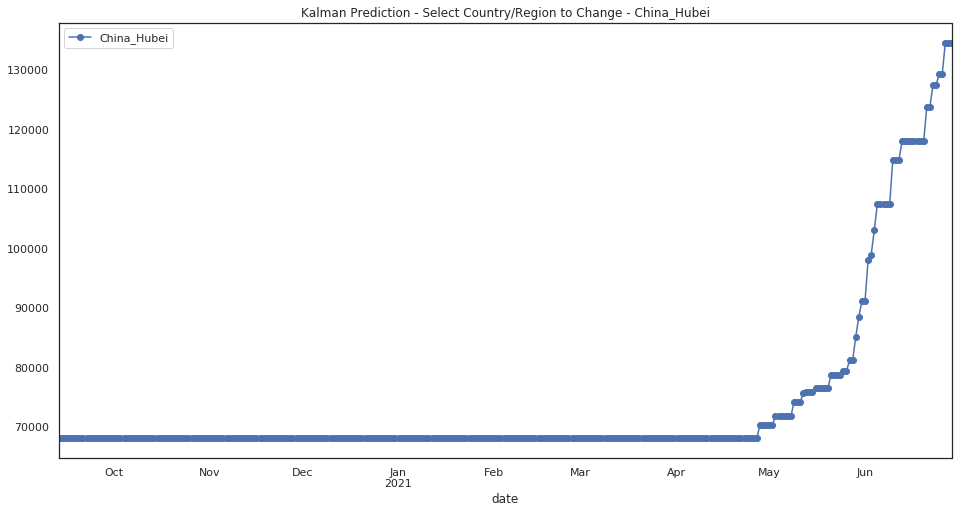

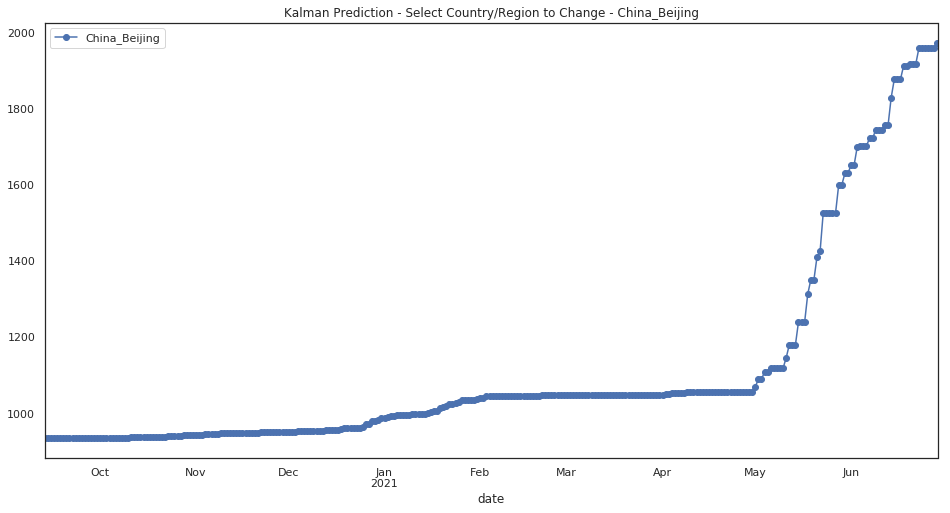

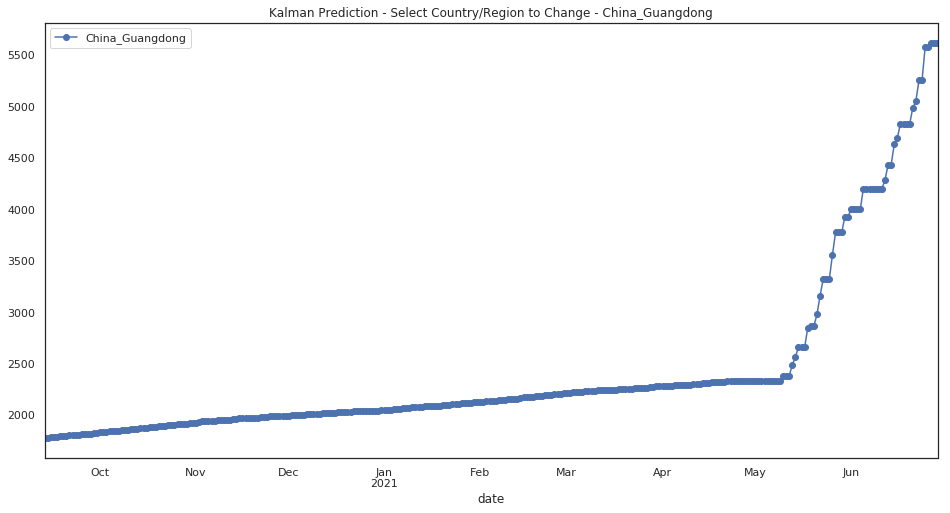

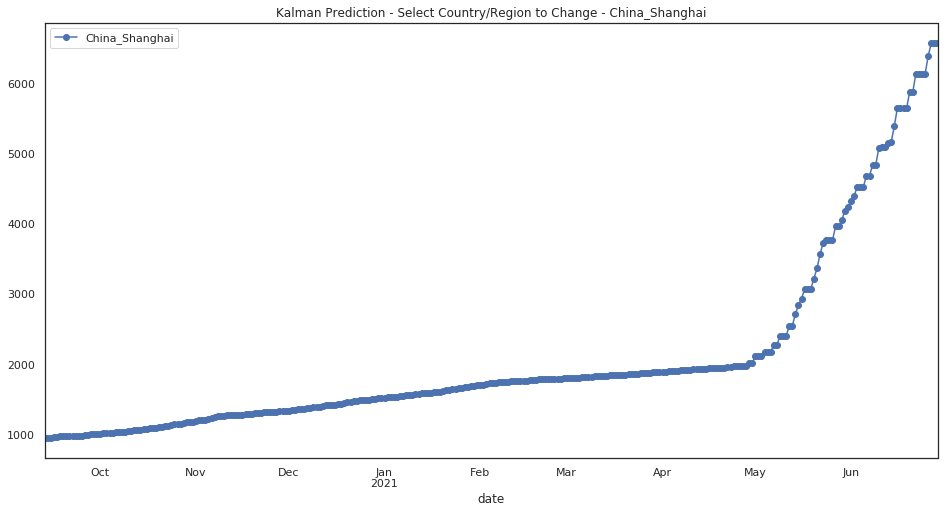

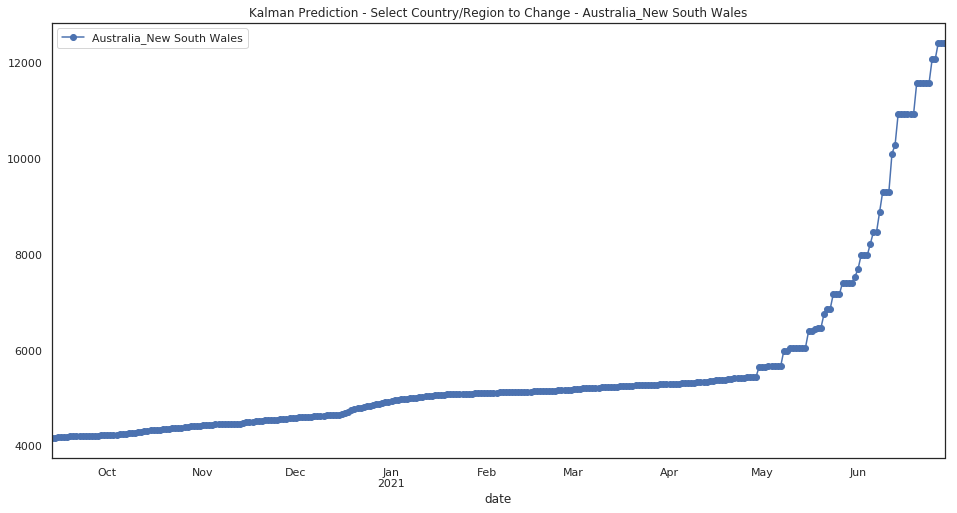

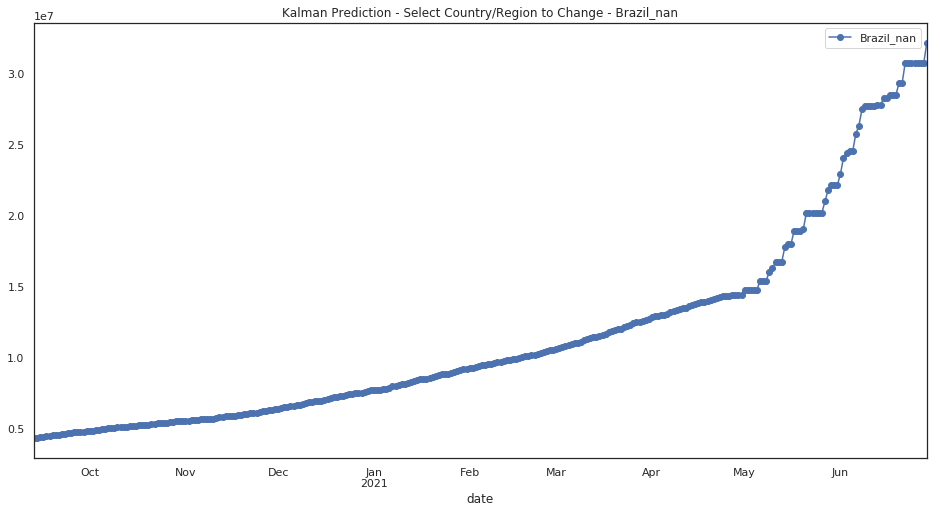

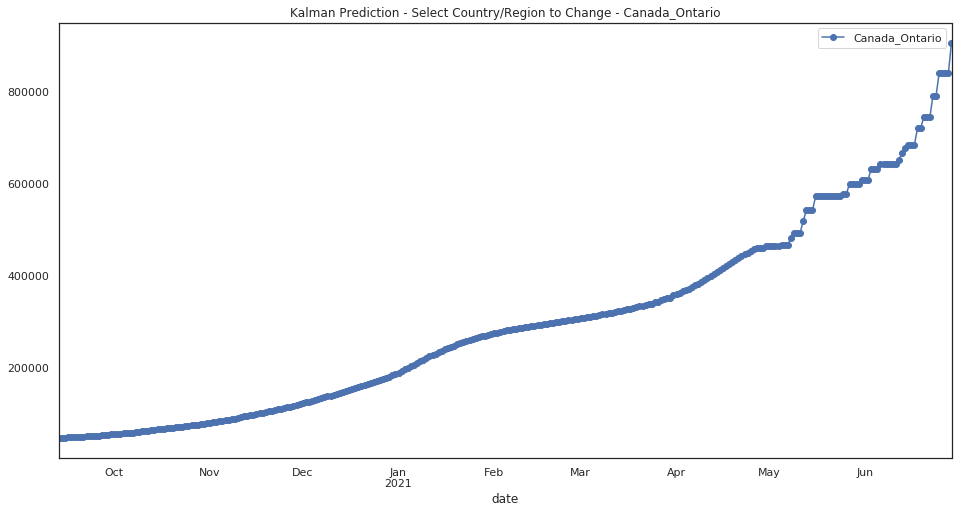

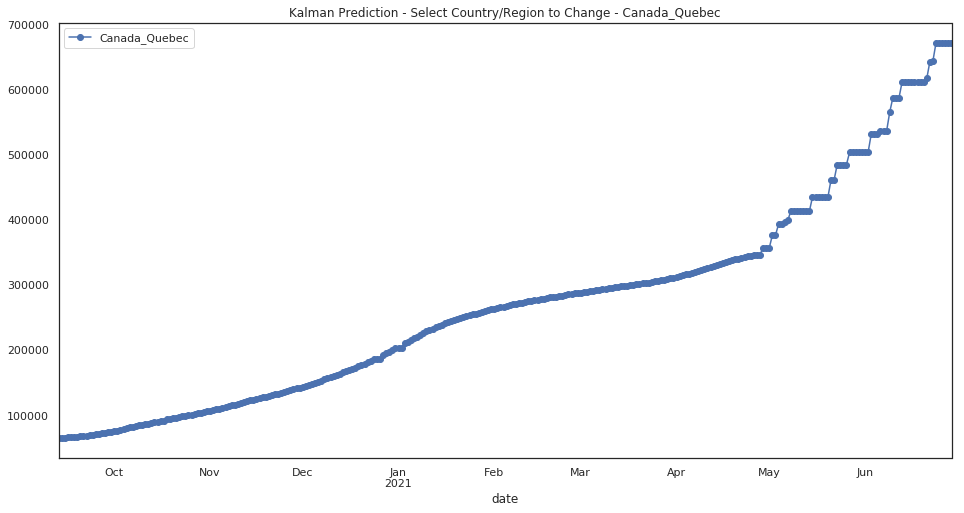

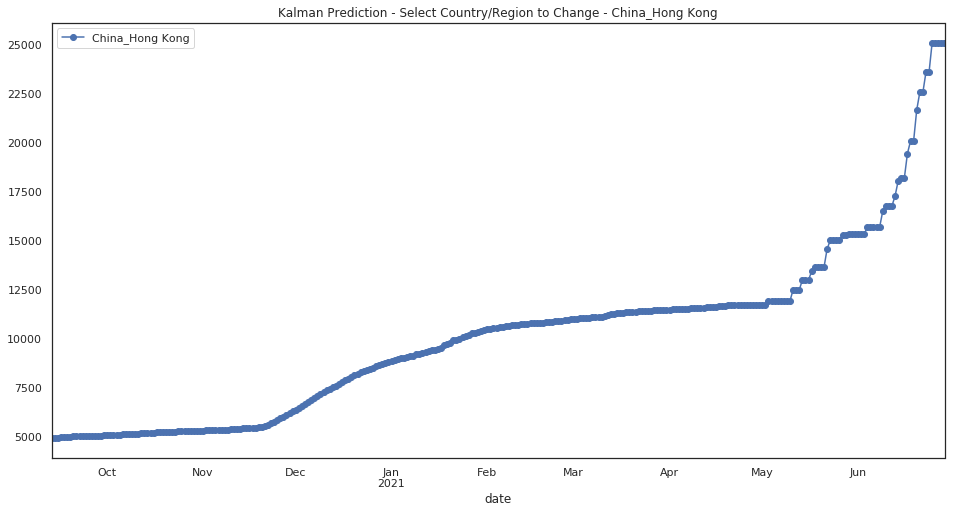

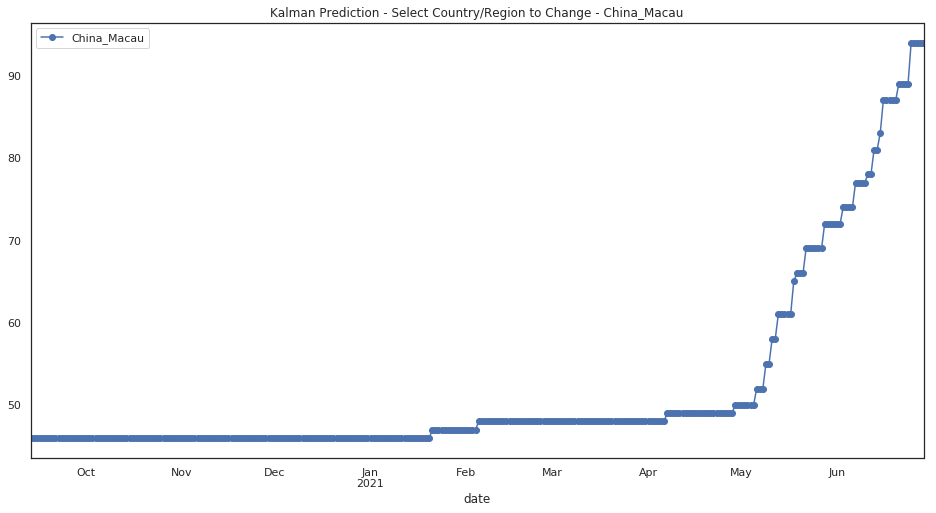

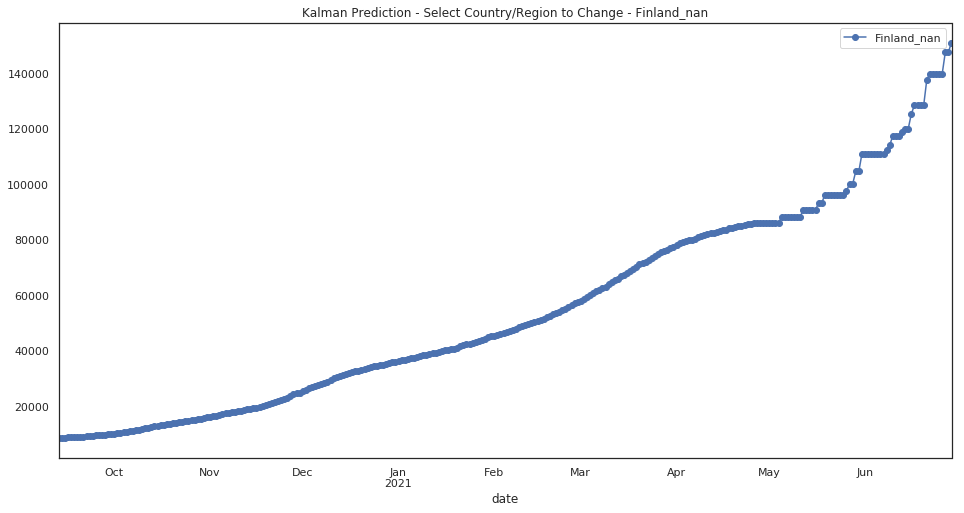

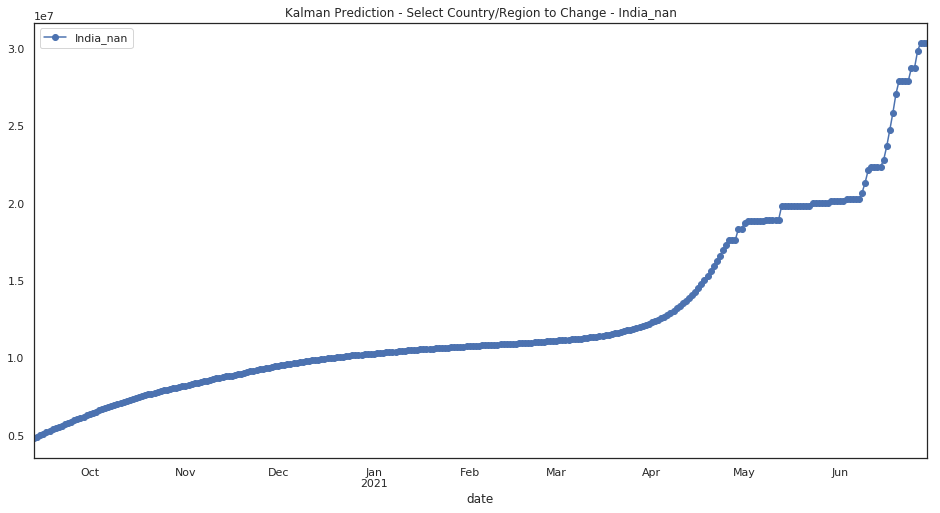

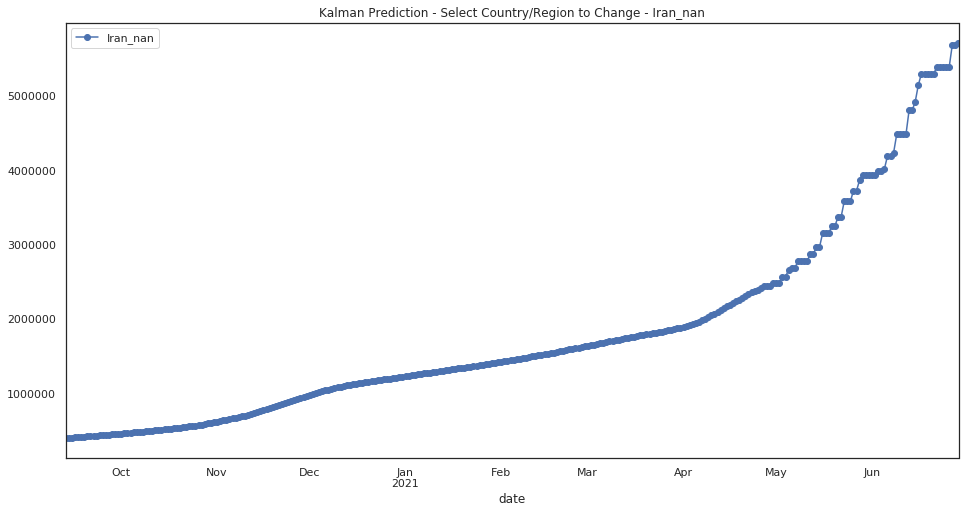

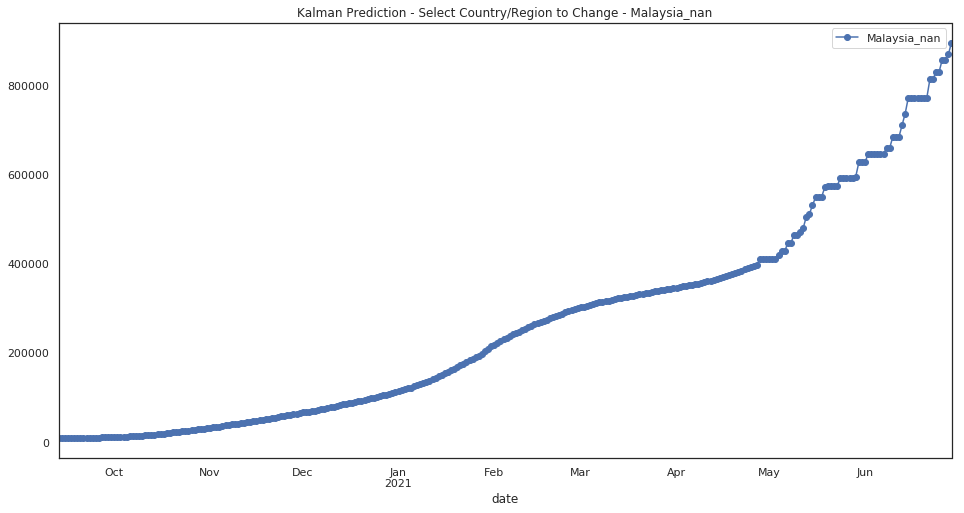

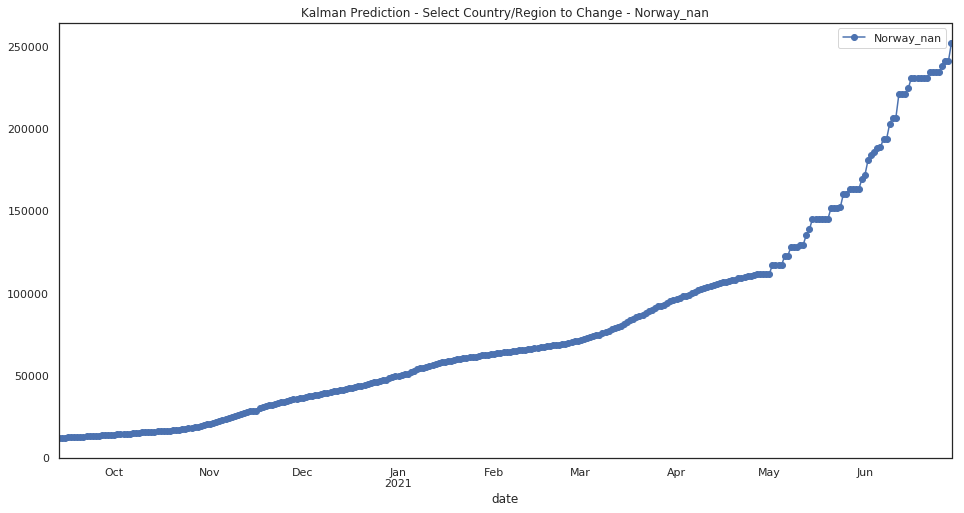

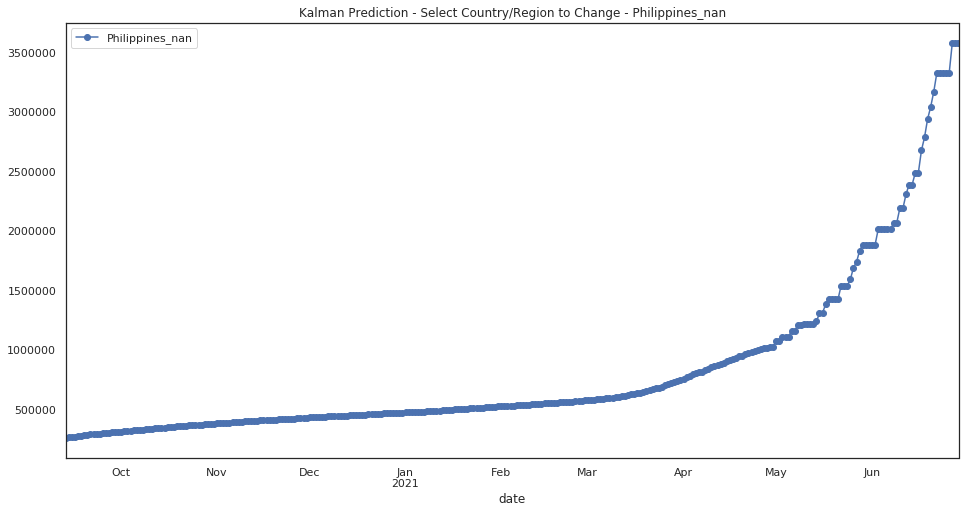

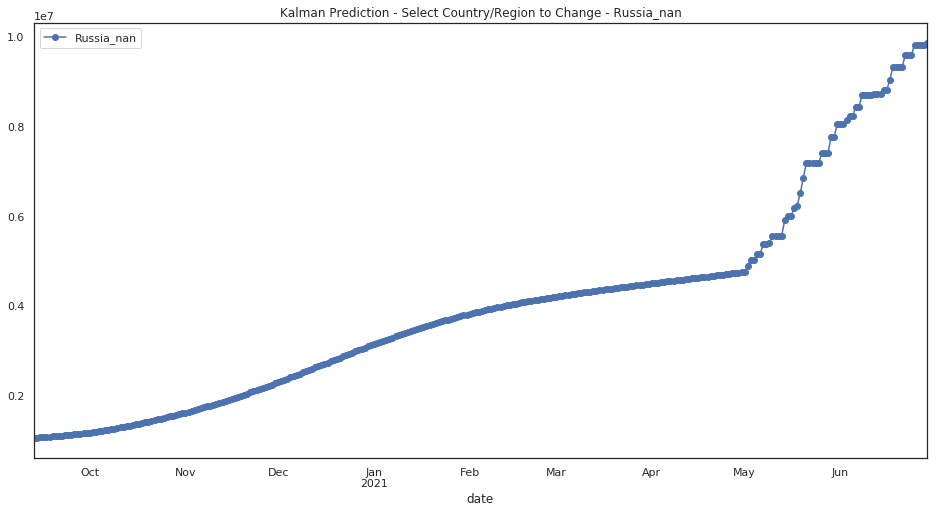

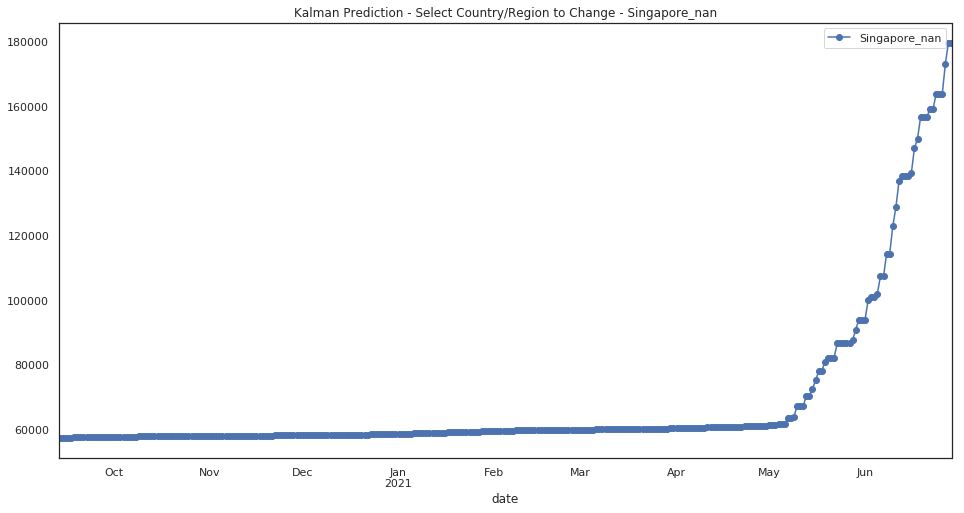

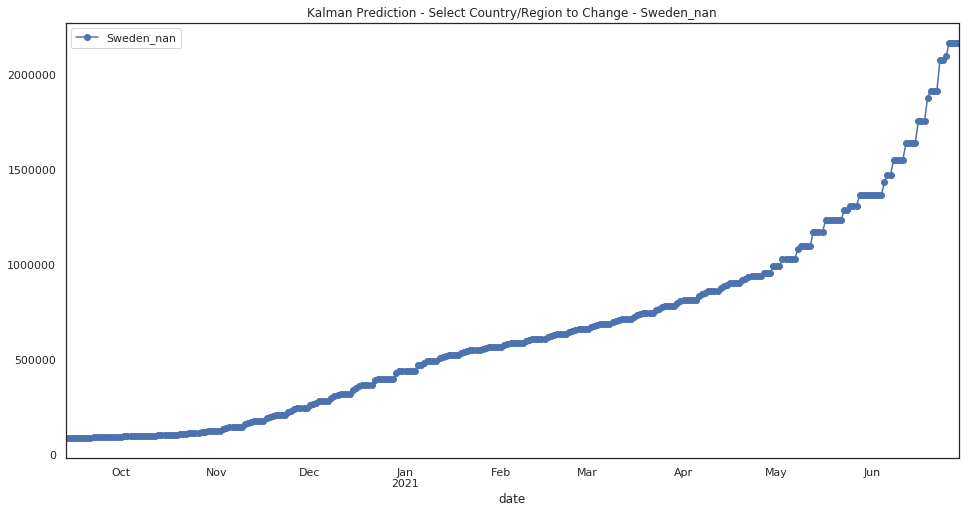

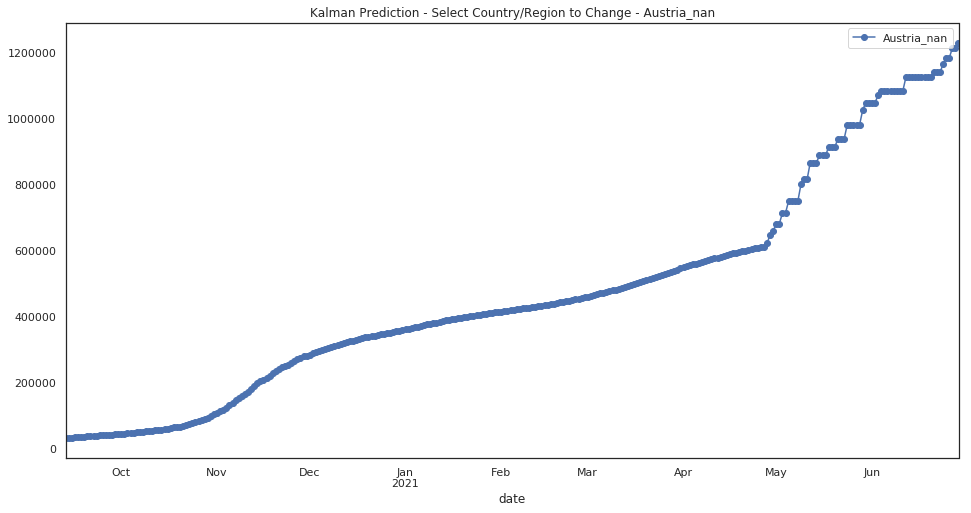

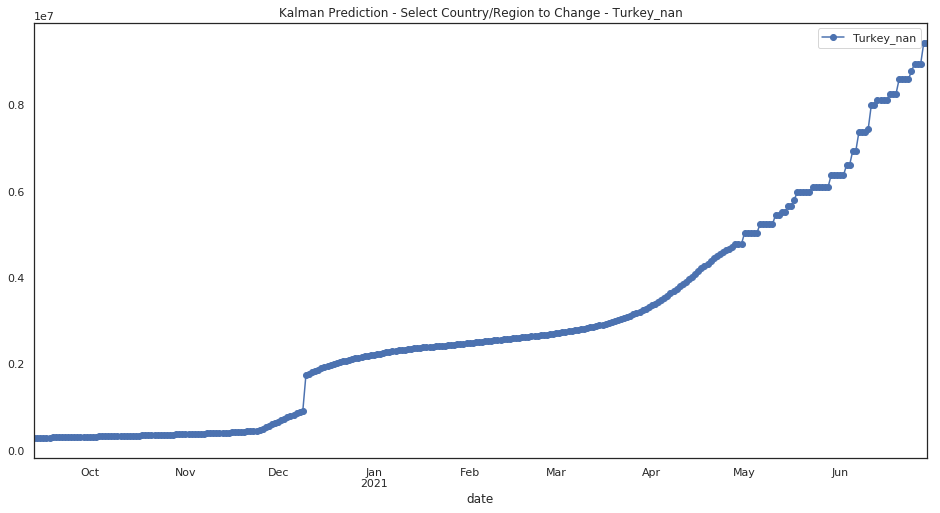

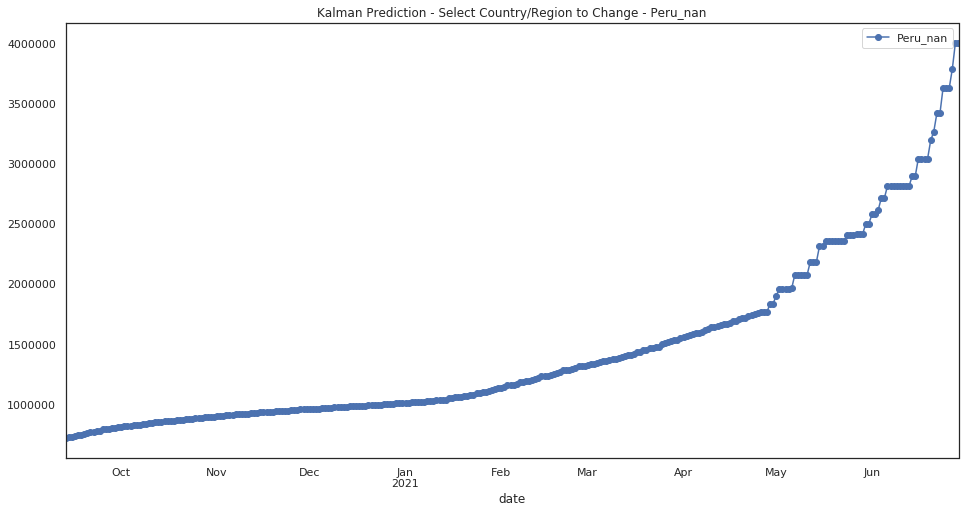

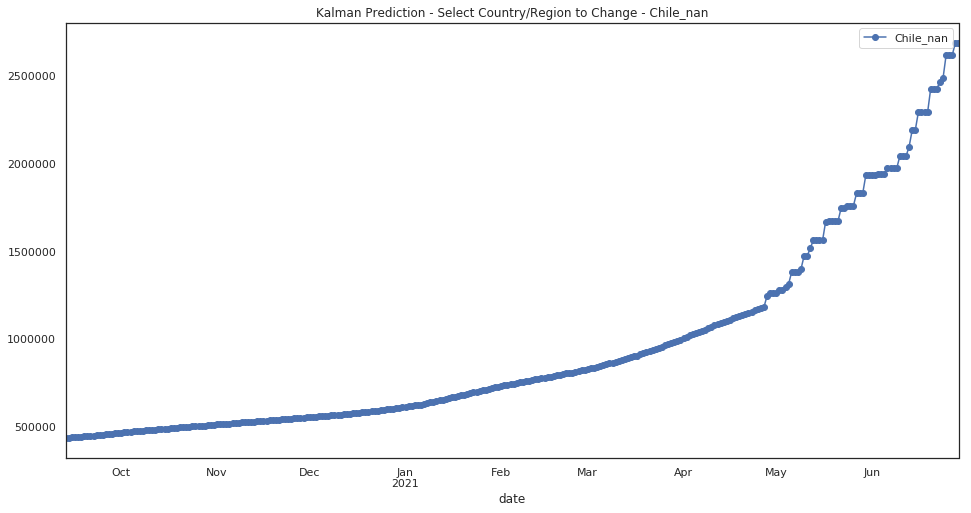

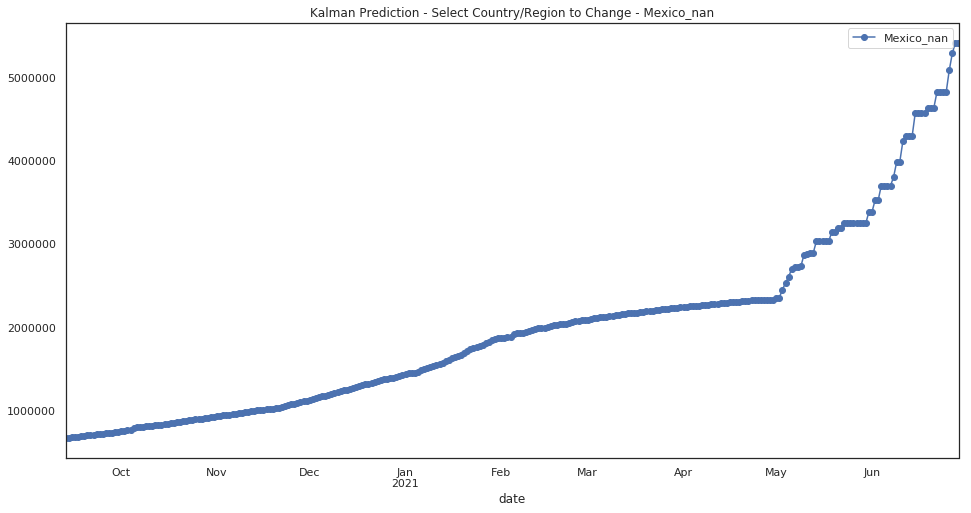

In [67]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [68]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2021-06-29 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                   NaN      59341277.0
Brazil_nan                                          NaN      32211978.0
India_nan                                           NaN      30370224.0
France_nan                                          NaN      12559577.0
Russia_nan                                          NaN       9872066.0
Turkey_nan                                          NaN       9438079.0
United Kingdom_nan                                  NaN       8896915.0
Italy_nan                                           NaN       8332436.0
Argentina_nan                                       NaN       7738383.0
Germany_nan                                         NaN       6695193.0
Spain_nan                                           NaN       6604326.0
Colombia_nan                                        NaN       6409293.0
Iran_nan                                            NaN       5715086.0
Mexico_nan                                          NaN       5423033.0
Ukraine_nan                                         NaN       5406759.0
Poland_nan                                          NaN       5159562.0
Peru_nan                                            NaN       4005079.0
Indonesia_nan                                       NaN       3769769.0
Netherlands_nan                                     NaN       3627300.0
Philippines_nan                                     NaN       3582034.0
Czechia_nan                                         NaN       3101213.0
Iraq_nan                                            NaN       2996666.0
Serbia_nan                                          NaN       2923086.0
South Africa_nan                                    NaN       2884618.0
Chile_nan                                           NaN       2690520.0
Pakistan_nan                                        NaN       2417533.0
Sweden_nan                                          NaN       2166830.0
Morocco_nan                                         NaN       2139681.0
Romania_nan                                         NaN       2112700.0
Hungary_nan                                         NaN       2091538.0
...                                                 ...             ...
China_Gansu                                         NaN           355.0
Netherlands_Bonaire, Sint Eustatius and Saba        NaN           338.0
China_Hainan                                        NaN           307.0
Australia_Australian Capital Territory              NaN           286.0
China_Guizhou                                       NaN           266.0
France_New Caledonia                                NaN           257.0
Fiji_nan                                            NaN           232.0
Canada_Yukon                                        NaN           187.0
Canada_Northwest Territories                        NaN           175.0
United Kingdom_Falkland Islands (Malvinas)          NaN           141.0
China_Ningxia                                       NaN           134.0
China_Macau                                         NaN            94.0
Holy See_nan                                        NaN            84.0
Saint Kitts and Nevis_nan                           NaN            78.0
France_Saint Pierre and Miquelon                    NaN            75.0
Denmark_Greenland                                   NaN            70.0
Solomon Islands_nan                                 NaN            57.0
United Kingdom_Montserrat                           NaN            37.0
China_Qinghai                                       NaN            36.0
Canada_Repatriated Travellers                       NaN            25.0
Canada_Grand Princess                               NaN            22.0
MS Zaandam_nan                                      NaN             9.0
United Kingdom_Saint Helena, Ascension and Tris...  NaN             4.0
Marshall Islands_nan                                NaN             4.0
Vanuatu_nan           

In [69]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [70]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [71]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
#test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
test_iter['infected_rate']=(((test_iter['last_day'] +1)*100)/((test_iter['population'] +1)*100000) *10)
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [72]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [73]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [74]:
pred[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-09-13          51295.0      27695.0      59521.0      19063.0   
2020-09-14          51343.0      27839.0      59729.0      19144.0   
2020-09-15          38772.0      11520.0      48496.0       1438.0   
2020-09-16          38815.0      11672.0      48734.0       1438.0   
2020-09-17          38855.0      11816.0      48966.0       1483.0   
2020-09-18          38872.0      11948.0      49194.0       1483.0   
2020-09-19          38897.0      12073.0      49413.0       1564.0   
2020-09-20          38919.0      12226.0      49623.0       1564.0   
2020-09-21          39187.0      12506.0      50098.0       1849.0   
2020-09-22          39213.0      12657.0      50289.0       1681.0   
2020-09-23          39259.0      12798.0      50476.0       1957.0   
2020-09-24          39278.0      12934.0      50657.0       1753.0   
2020-09-25          39294.0      13043.0      50833.0       1978.0   
2020-09-26          39301.0      13163.0      50996.0       1836.0   
2020-09-27          39329.0      13285.0      51148.0       1989.0   
2020-09-28          39350.0      13412.0      51295.0       2101.0   
2020-09-29          39366.0      13516.0      51448.0       1966.0   
2020-09-30          39381.0      13657.0      51612.0       2224.0   
2020-10-01          39397.0      13812.0      51776.0       2050.0   
2020-10-02          39405.0      13951.0      51936.0       2228.0   
2020-10-03          39411.0      14108.0      52086.0       2110.0   
2020-10-04          39449.0      14268.0      52226.0       2201.0   
2020-10-05          39528.0      14413.0      52359.0       2425.0   
2020-10-06          39599.0      14571.0      52486.0       2370.0   
2020-10-07          39665.0      14721.0      52607.0       2805.0   
2020-10-08          39731.0      14888.0      52742.0       2568.0   
2020-10-09          39802.0      15055.0      52891.0       2867.0   
2020-10-10          39818.0      15224.0      53032.0       2696.0   
2020-10-11          39896.0      15394.0      53166.0       2817.0   
2020-10-12          39971.0      15563.0      53401.0       3075.0   
...                     ...          ...          ...          ...   
2021-06-01         103862.0     170925.0     213323.0      18171.0   
2021-06-02         104022.0     170648.0     213323.0      18171.0   
2021-06-03         104022.0     170648.0     213323.0      19286.0   
2021-06-04         104022.0     177418.0     213323.0      19286.0   
2021-06-05         104022.0     182135.0     213323.0      20201.0   
2021-06-06         104022.0     179914.0     213323.0      20201.0   
2021-06-07         104713.0     181484.0     219704.0      20201.0   
2021-06-08         105054.0     182262.0     223840.0      20890.0   
2021-06-09         104837.0     187491.0     222018.0      22093.0   
2021-06-10         104837.0     189326.0     222826.0      22093.0   
2021-06-11         108265.0     188238.0     227363.0      22093.0   
2021-06-12         110185.0     193269.0     232529.0      23302.0   
2021-06-13         109434.0     196380.0     230577.0      23819.0   
2021-06-14         109732.0     196488.0     230414.0      23894.0   
2021-06-15         110743.0     198174.0     234078.0      25579.0   
2021-06-16         113024.0     197654.0     243647.0      25579.0   
2021-06-17         113201.0     200261.0     251359.0      26504.0   
2021-06-18         112833.0     202157.0     258634.0      27512.0   
2021-06-19         112833.0     203106.0     268709.0      28368.0   
2021-06-20         116677.0     207380.0     276842.0      28368.0   
2021-06-21         119002.0     207502.0     278338.0      29292.0   
2021-06-22         122809.0     207245.0     279282.0      30686.0   
2021-06-23         125997.0     207245.0     286239.0      32673.0   
2021-06-24         123739.0     207245.0     286015.0      32673.0   
2021-06-25

In [75]:
### JOAO - FIX - issue if all source days ts[:]
## Comment for -35days start. 26feb.2020 ts=ts[35:]
## 06Aug2020 - For all
pred=pred[:-1]

In [76]:
region1=max_p0[max_p0.columns[0]].astype(str).reset_index().rename(columns={"index": "region"}).get_values()
region=[region[0] for region in region1]
region

['United States_nan',
 'Brazil_nan',
 'India_nan',
 'France_nan',
 'Russia_nan',
 'Turkey_nan',
 'United Kingdom_nan',
 'Italy_nan',
 'Argentina_nan',
 'Germany_nan',
 'Spain_nan',
 'Colombia_nan',
 'Iran_nan',
 'Mexico_nan',
 'Ukraine_nan',
 'Poland_nan',
 'Peru_nan',
 'Indonesia_nan',
 'Netherlands_nan',
 'Philippines_nan',
 'Czechia_nan',
 'Iraq_nan',
 'Serbia_nan',
 'South Africa_nan',
 'Chile_nan',
 'Pakistan_nan',
 'Sweden_nan',
 'Morocco_nan',
 'Romania_nan',
 'Hungary_nan',
 'Israel_nan',
 'Belgium_nan',
 'Bangladesh_nan',
 'Jordan_nan',
 'Portugal_nan',
 'Switzerland_nan',
 'Saudi Arabia_nan',
 'Austria_nan',
 'Nepal_nan',
 'United Arab Emirates_nan',
 'Japan_nan',
 'Panama_nan',
 'Lebanon_nan',
 'Canada_Ontario',
 'Malaysia_nan',
 'Greece_nan',
 'Georgia_nan',
 'Bulgaria_nan',
 'Kazakhstan_nan',
 'Croatia_nan',
 'Costa Rica_nan',
 'Dominican Republic_nan',
 'Canada_Quebec',
 'West Bank and Gaza_nan',
 'Slovakia_nan',
 'Ecuador_nan',
 'Paraguay_nan',
 'Tunisia_nan',
 'Belarus_

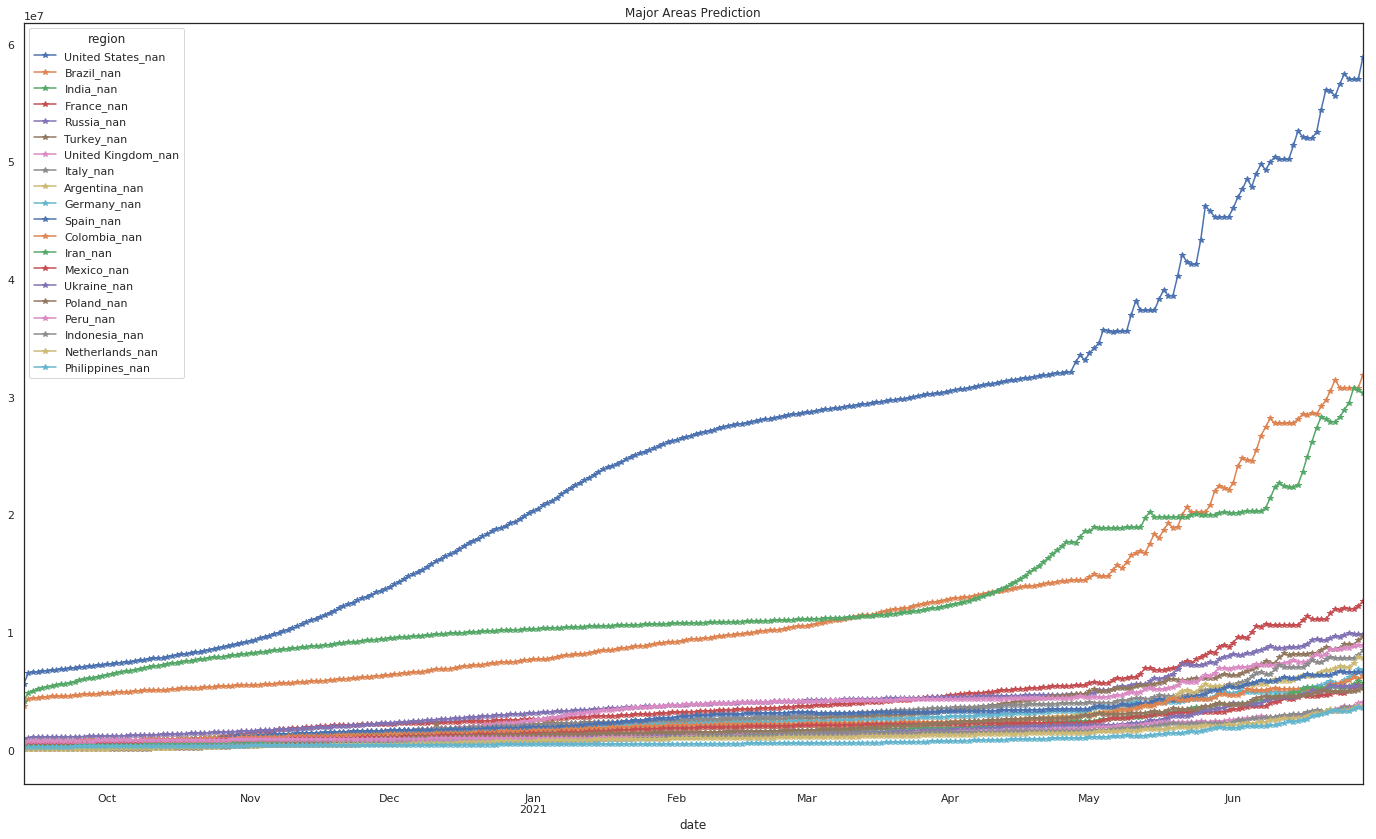

In [77]:
#
p=pred[region[:20]]
p[:].reindex(p.max().sort_values(ascending=False).index, axis=1).plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

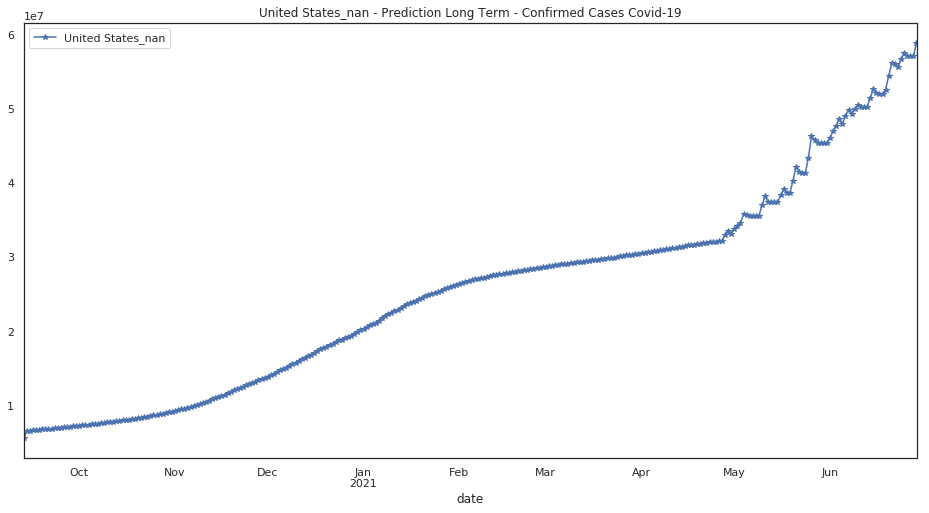

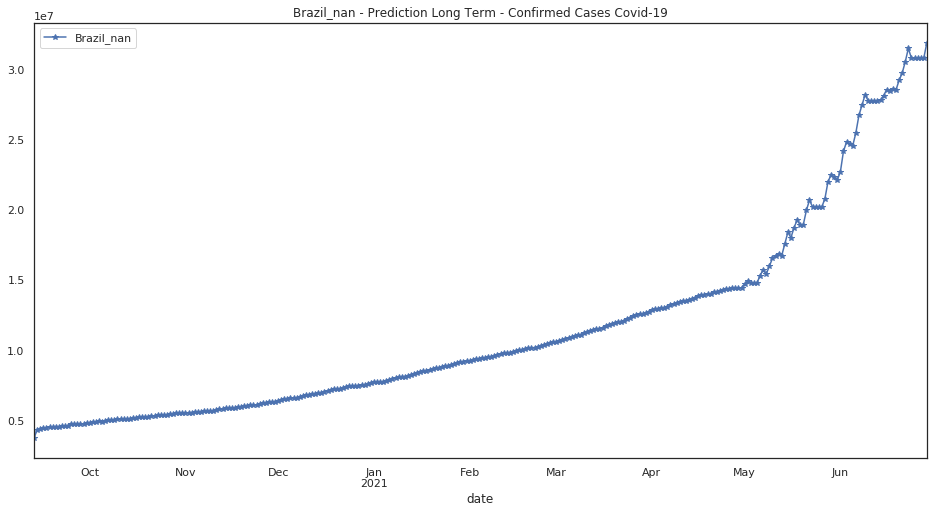

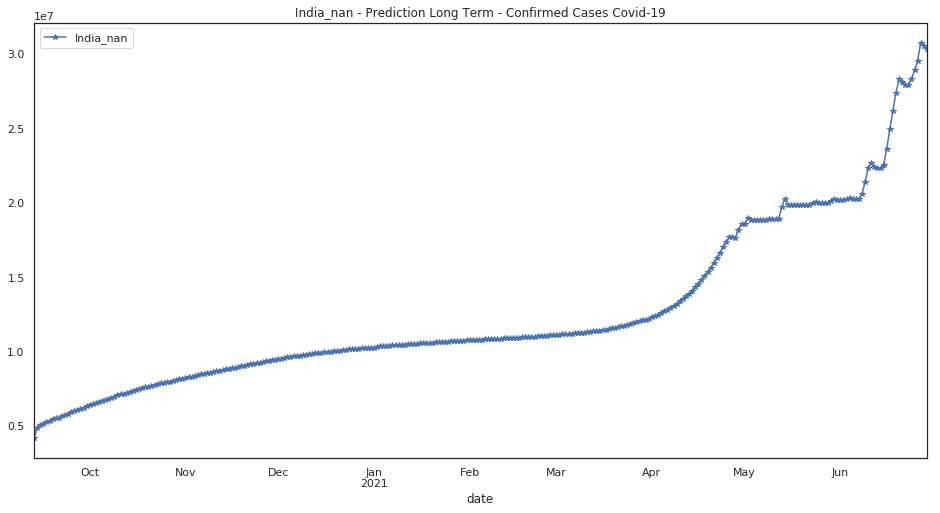

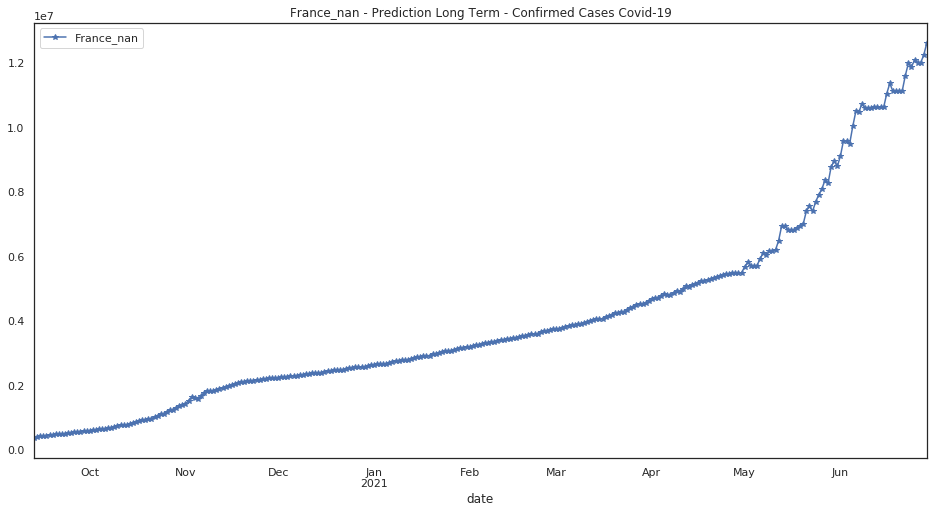

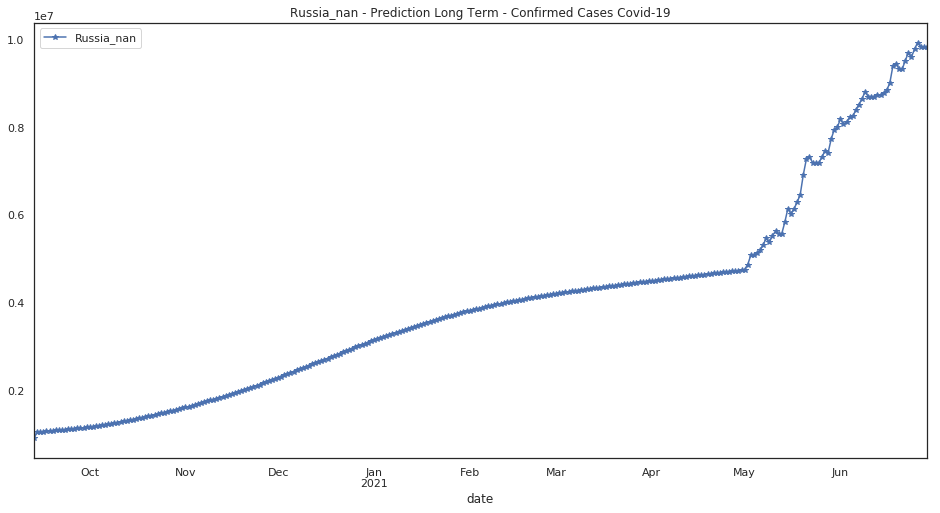

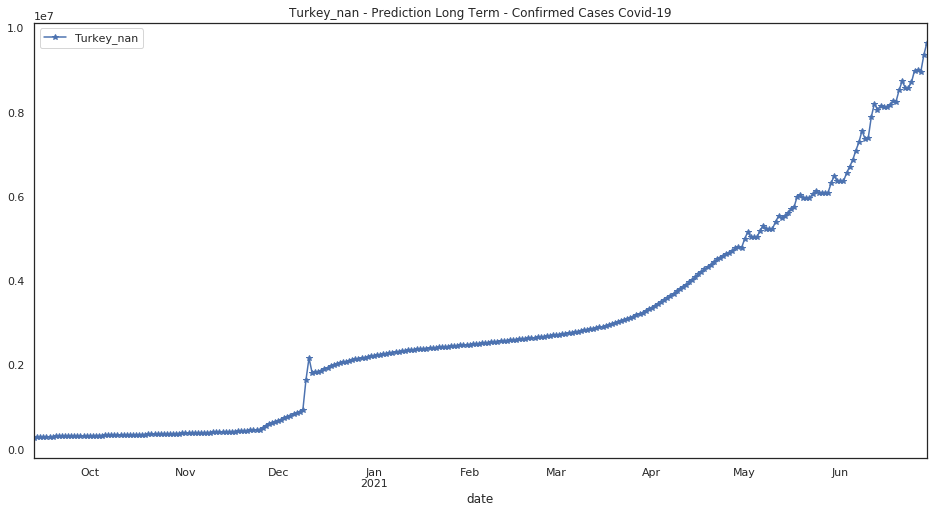

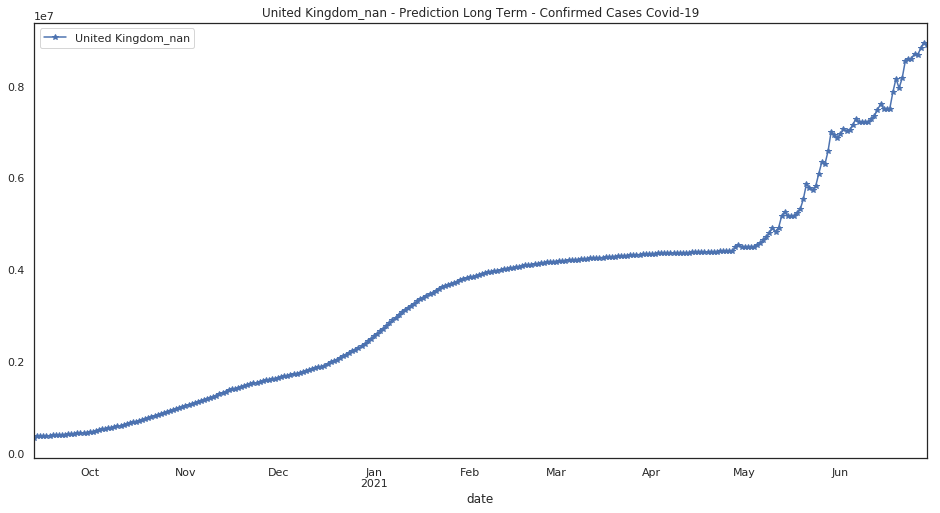

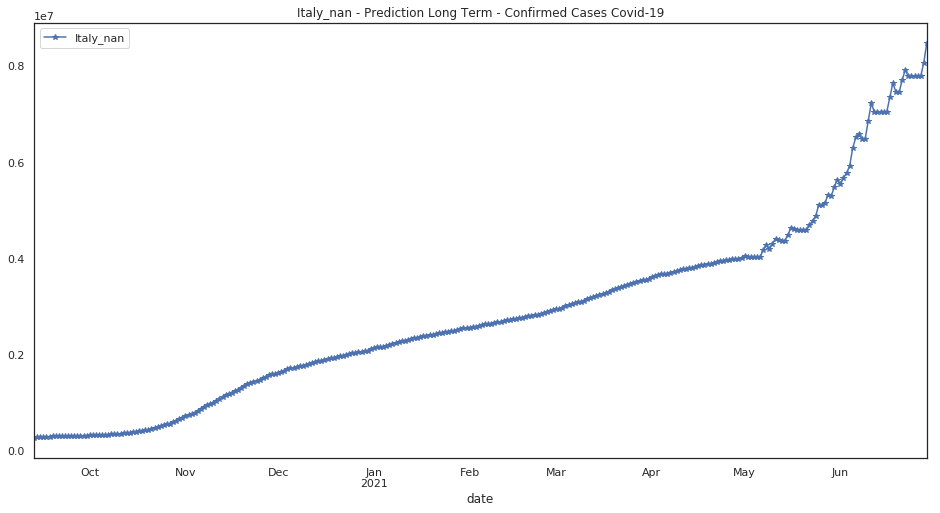

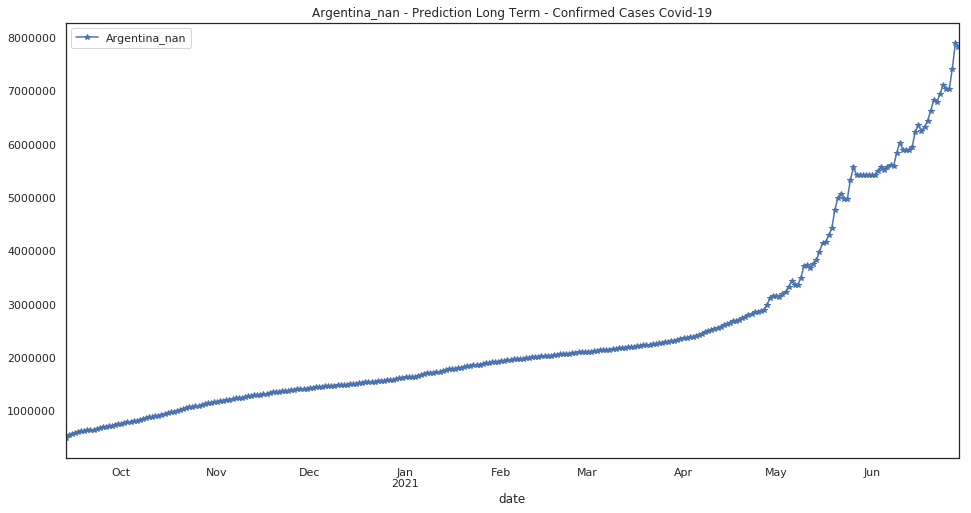

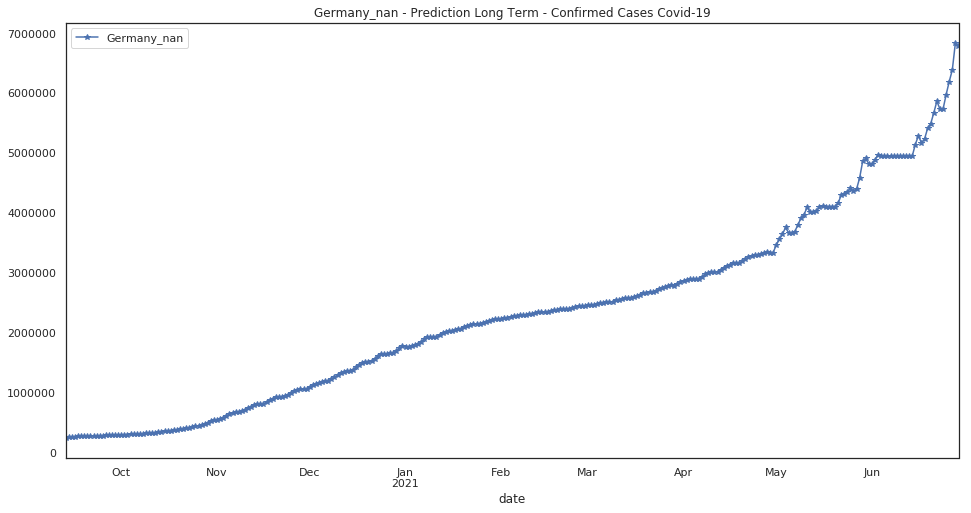

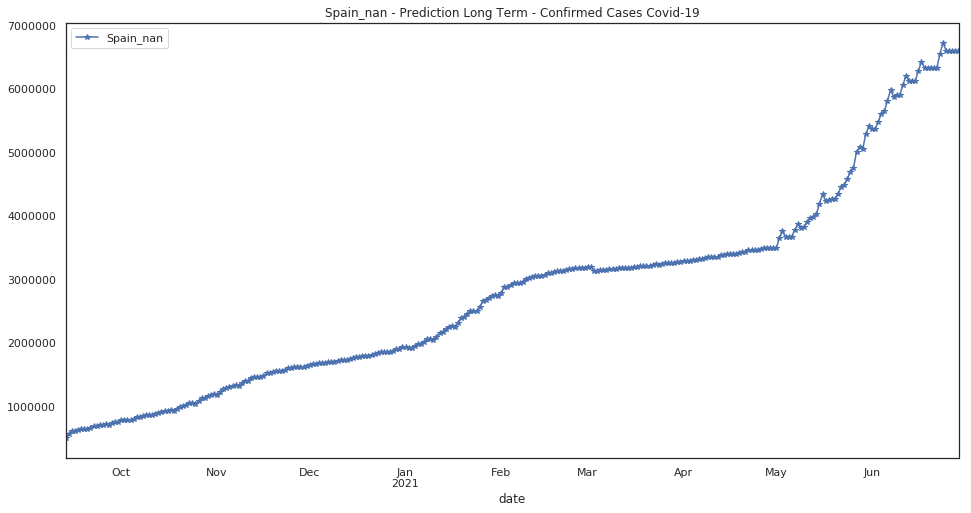

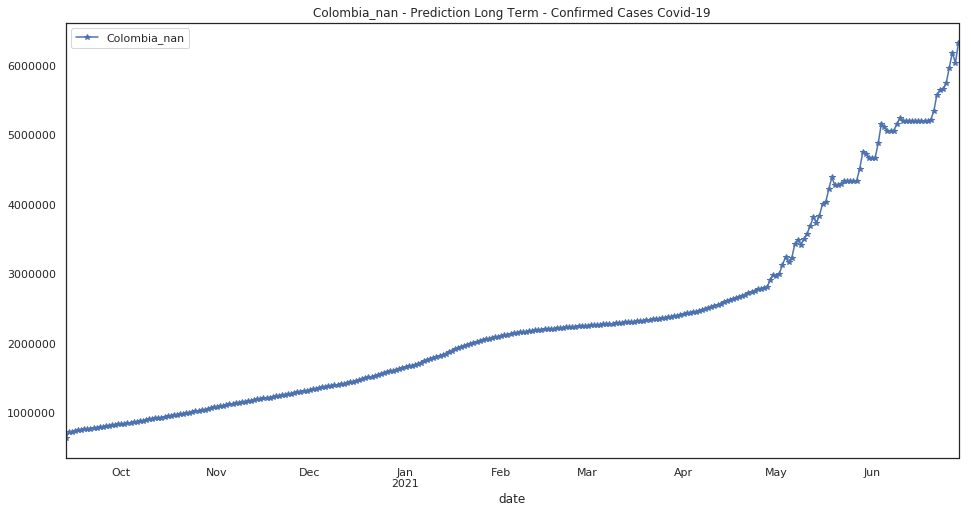

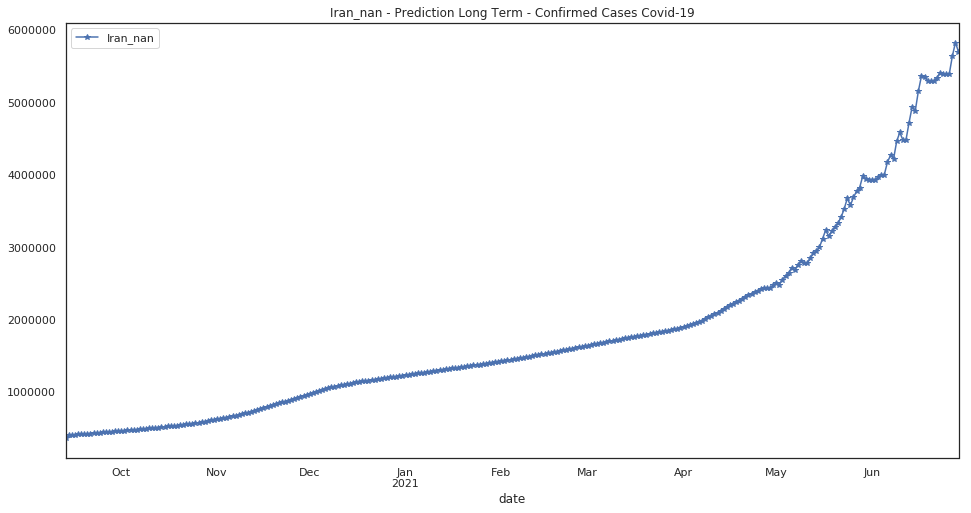

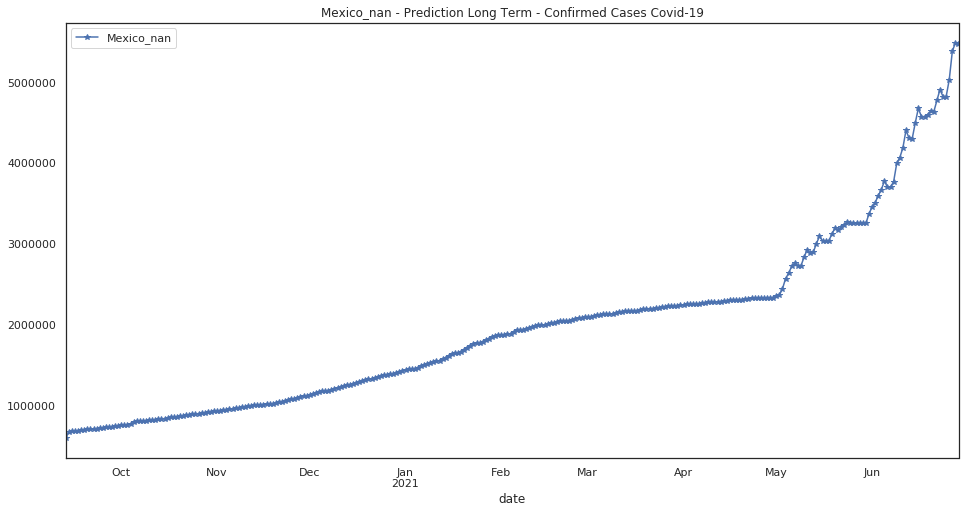

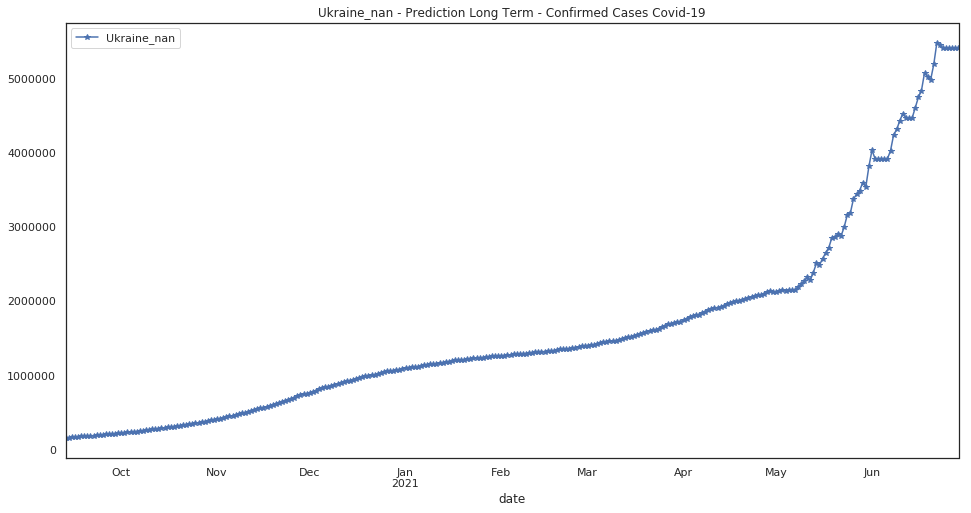

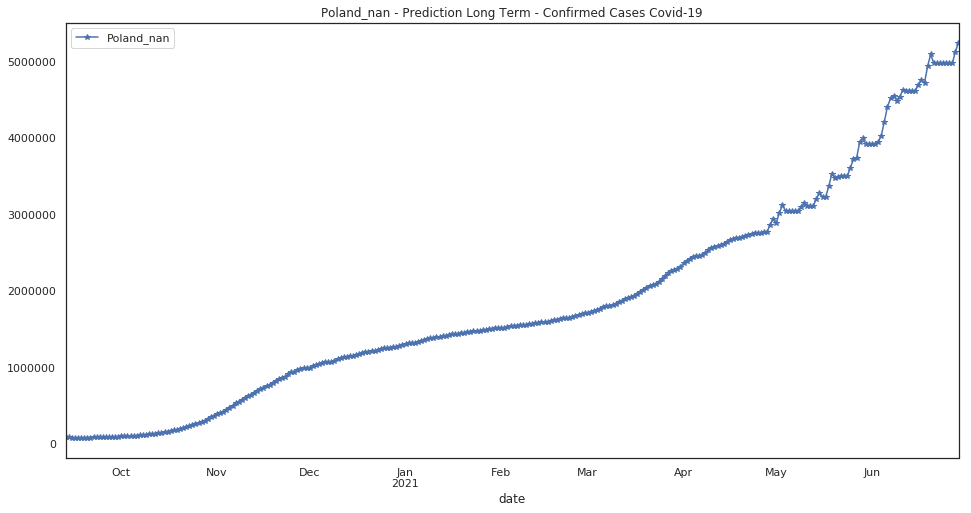

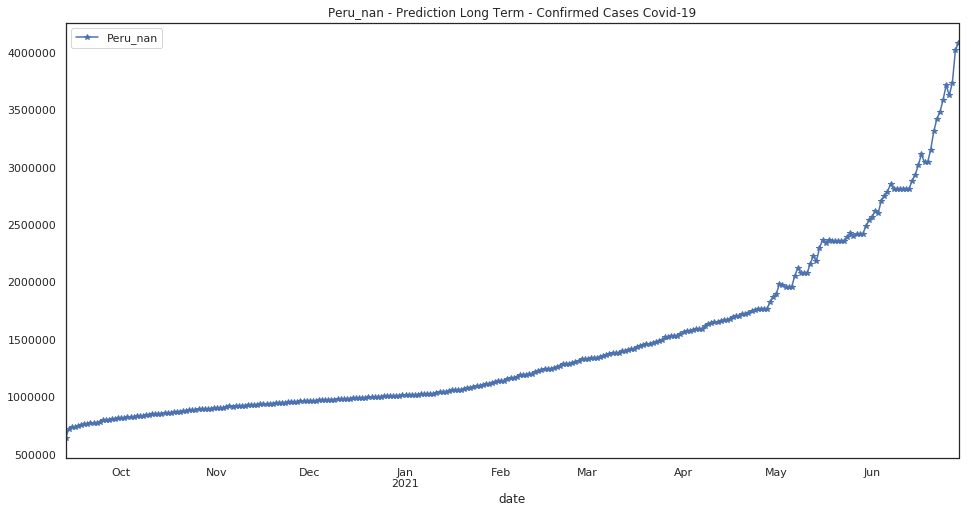

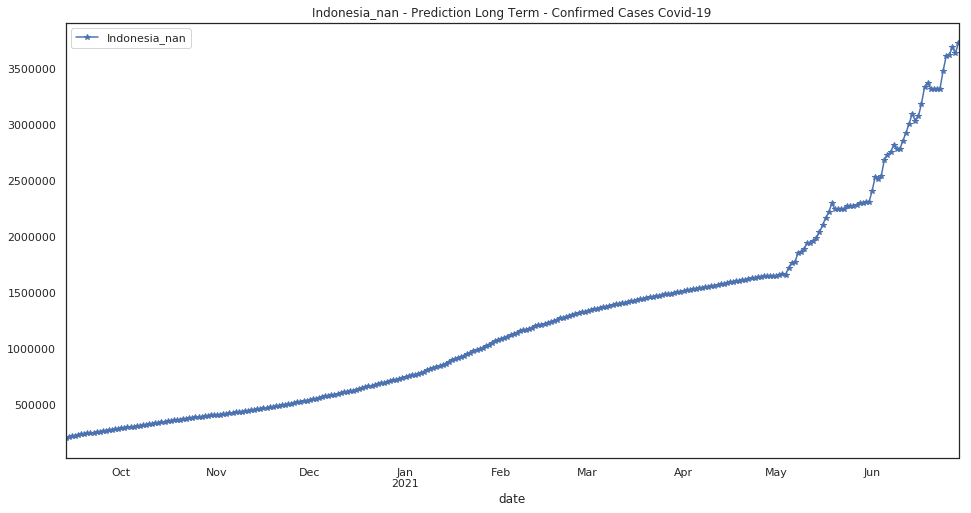

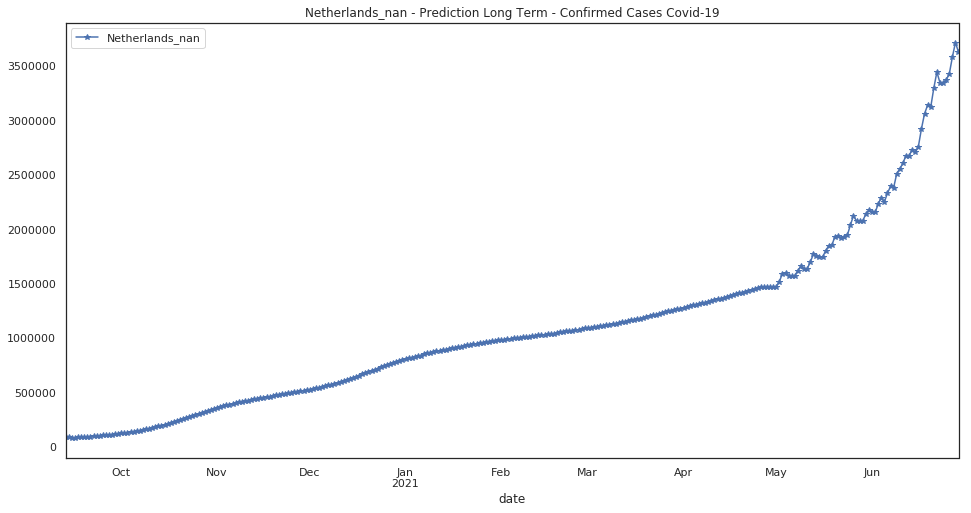

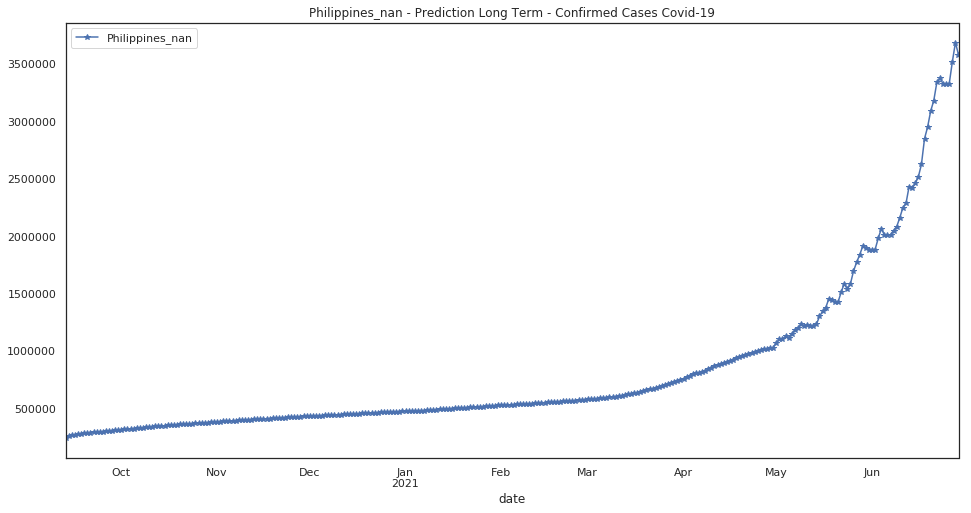

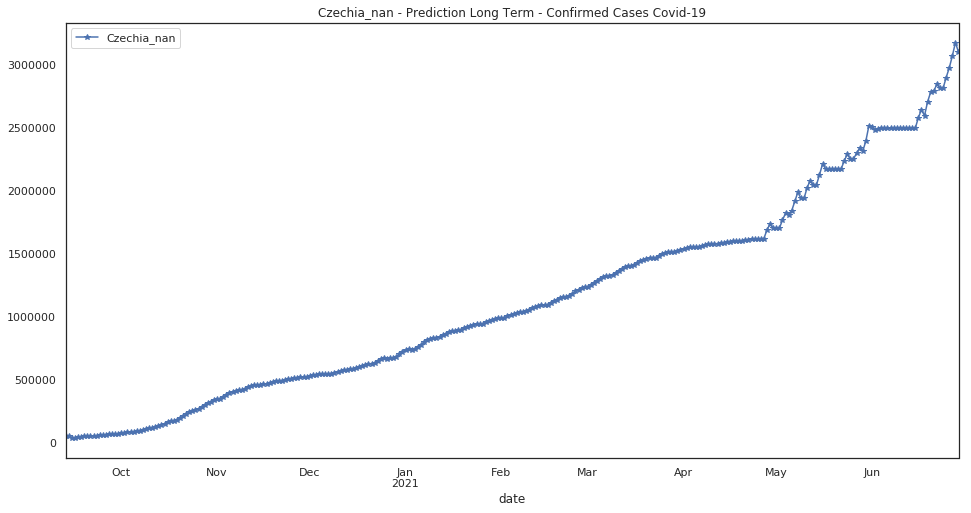

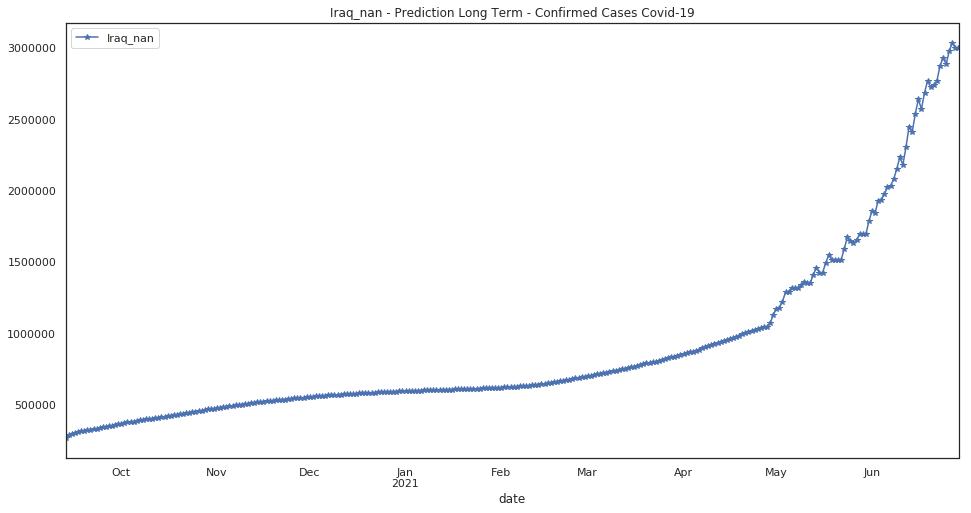

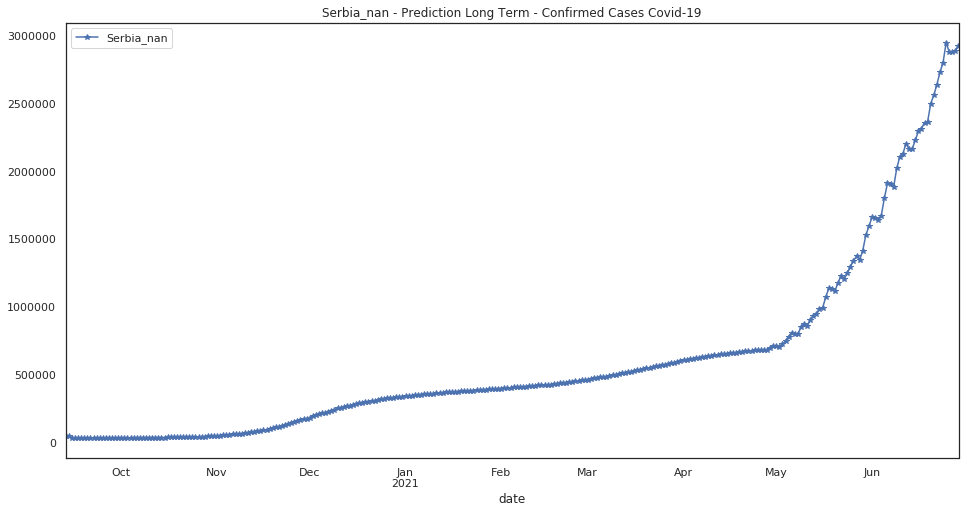

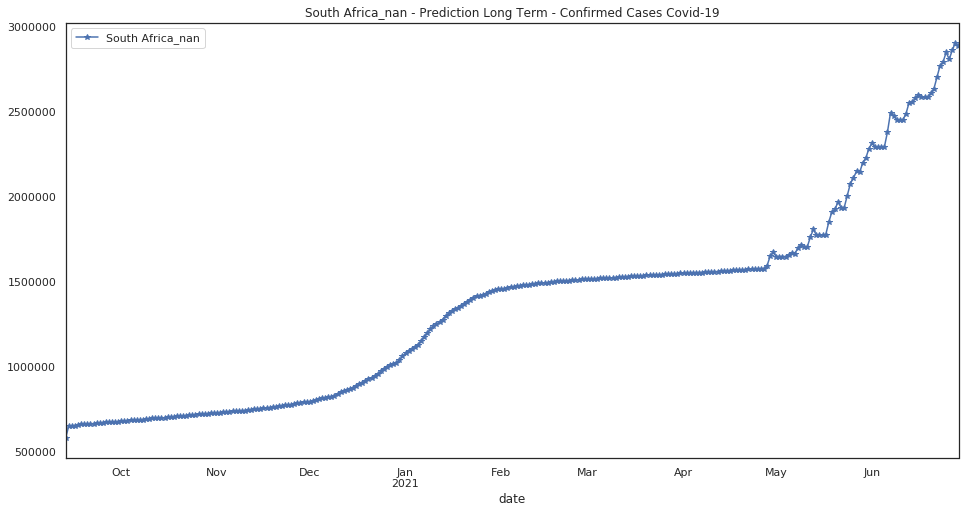

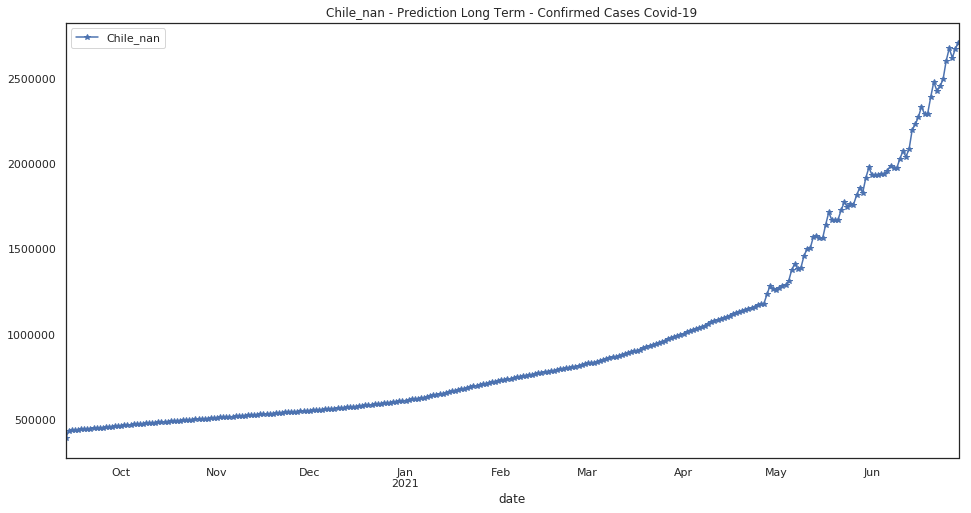

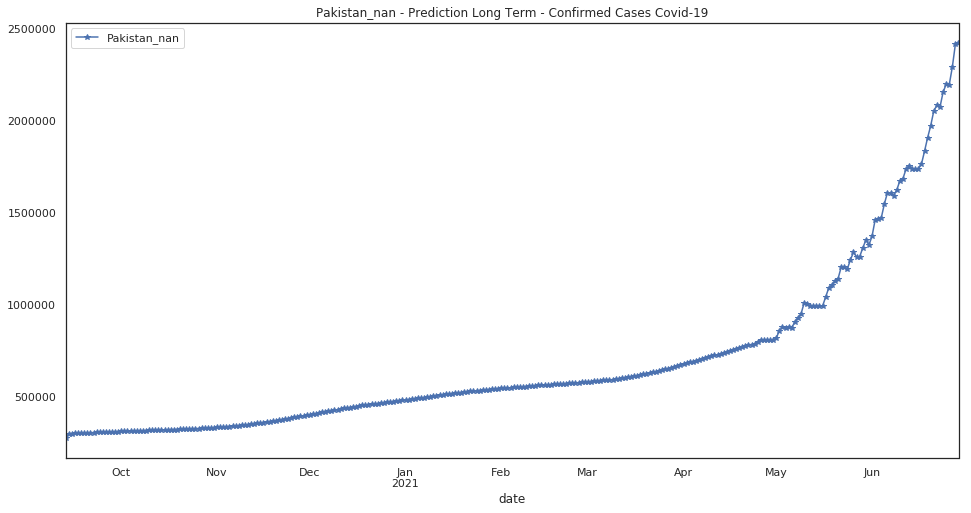

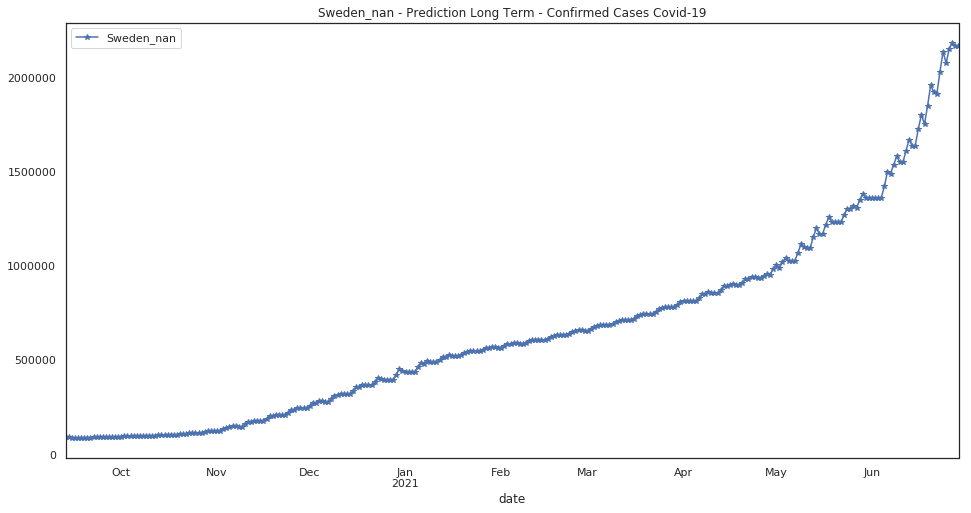

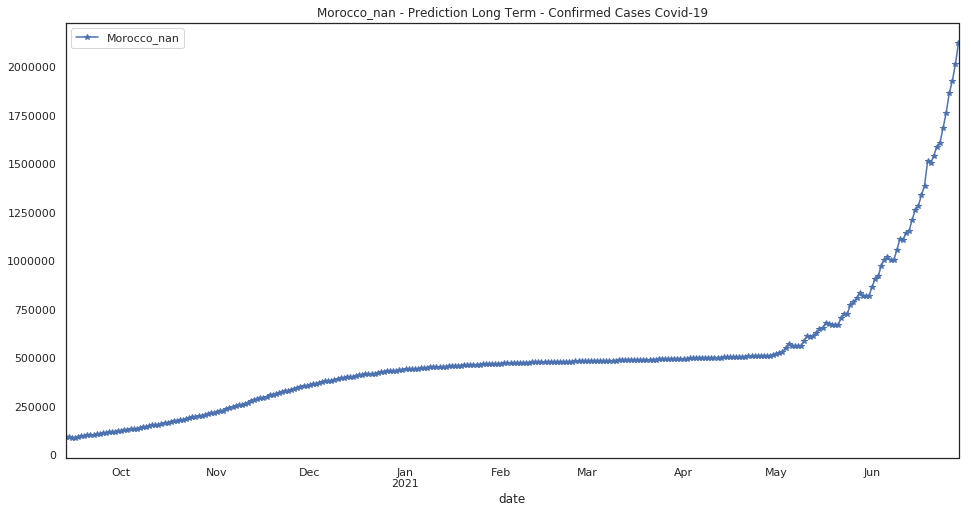

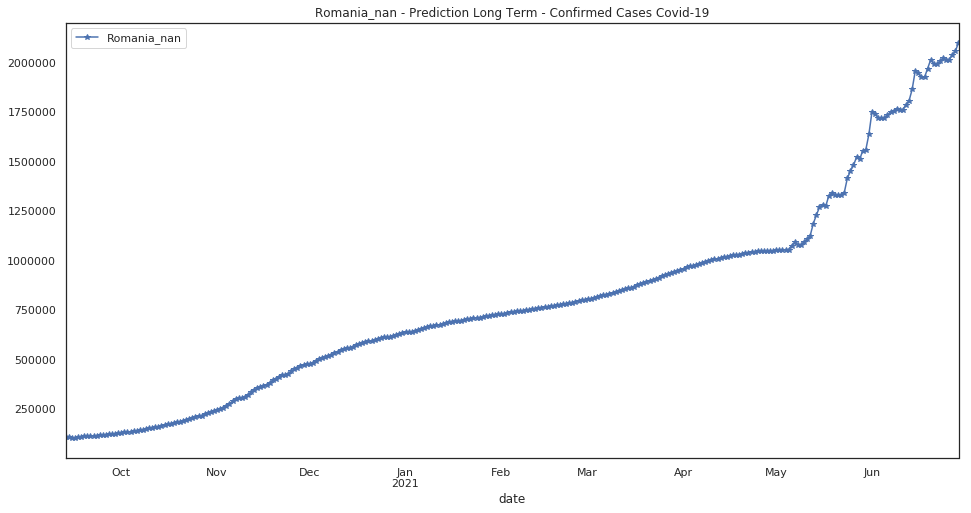

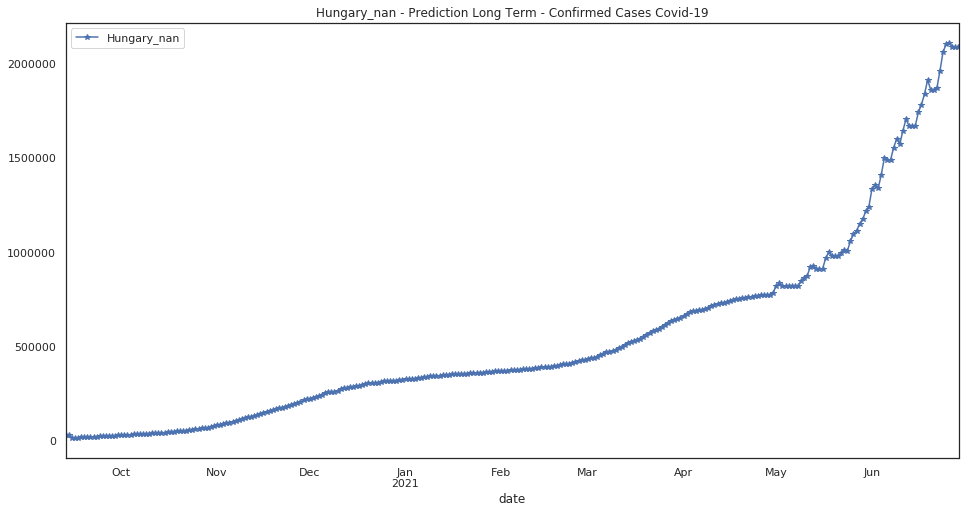

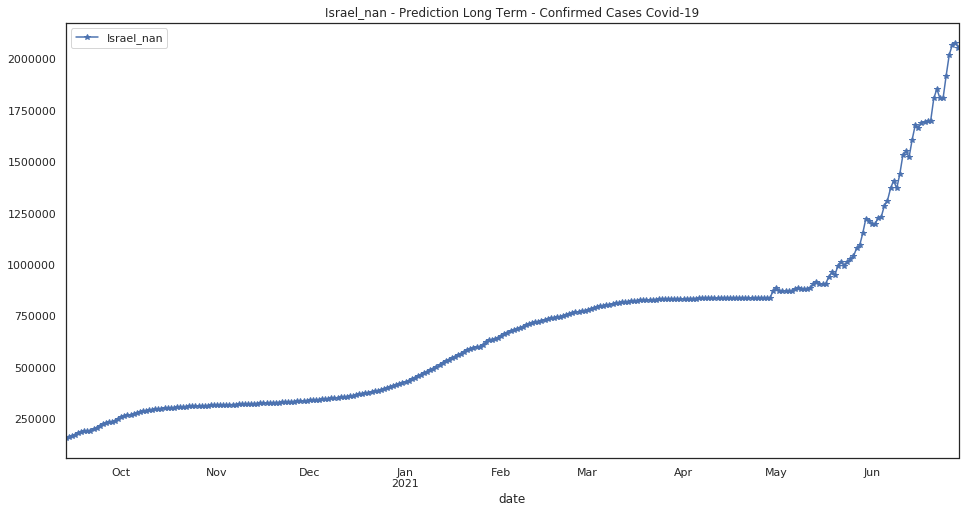

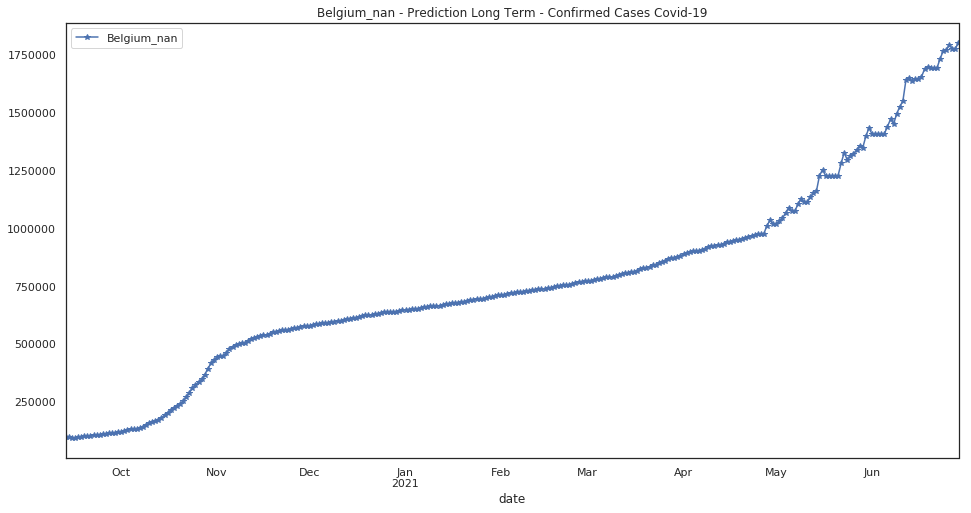

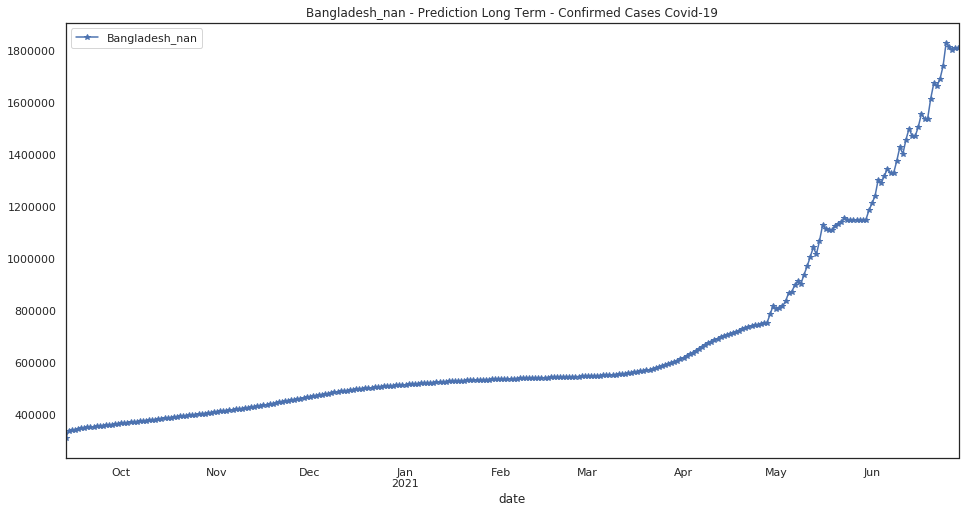

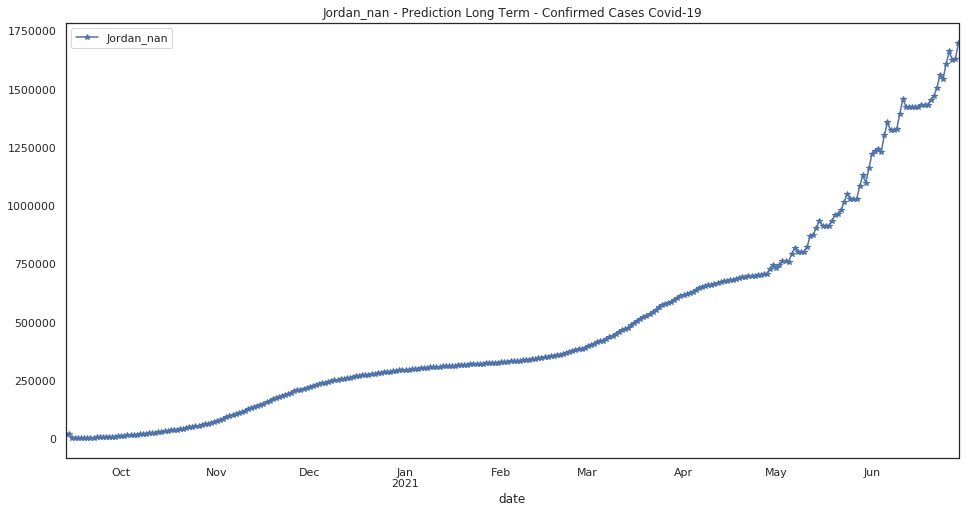

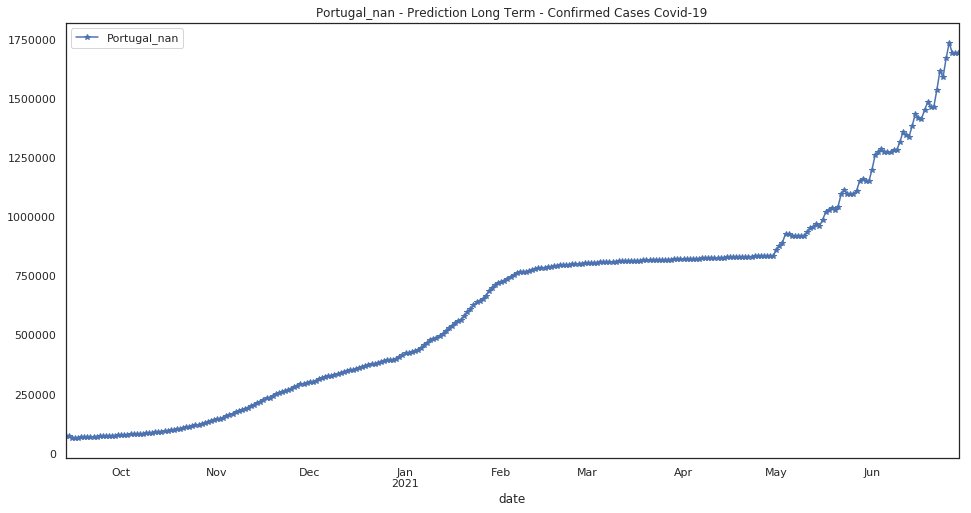

In [78]:
#
rgsx=region[:35]
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

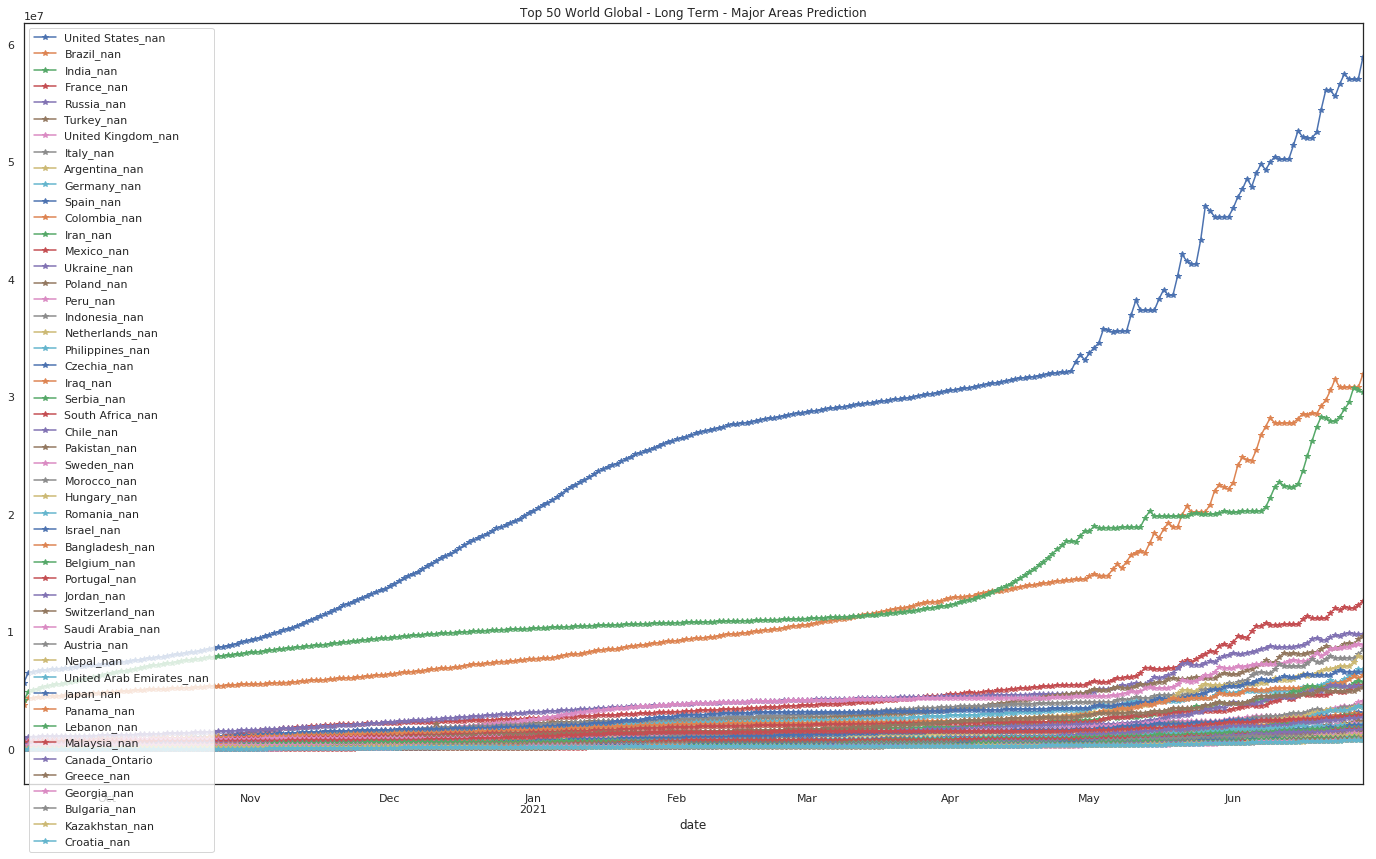

In [79]:
#region=my_train_list
pv2=pred
pv2=pv2.reindex(pv2.max().sort_values(ascending=False).index, axis=1)
pv2[:].iloc[:,0:50].plot(marker='*',figsize=(24,14),title ='Top 50 World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()

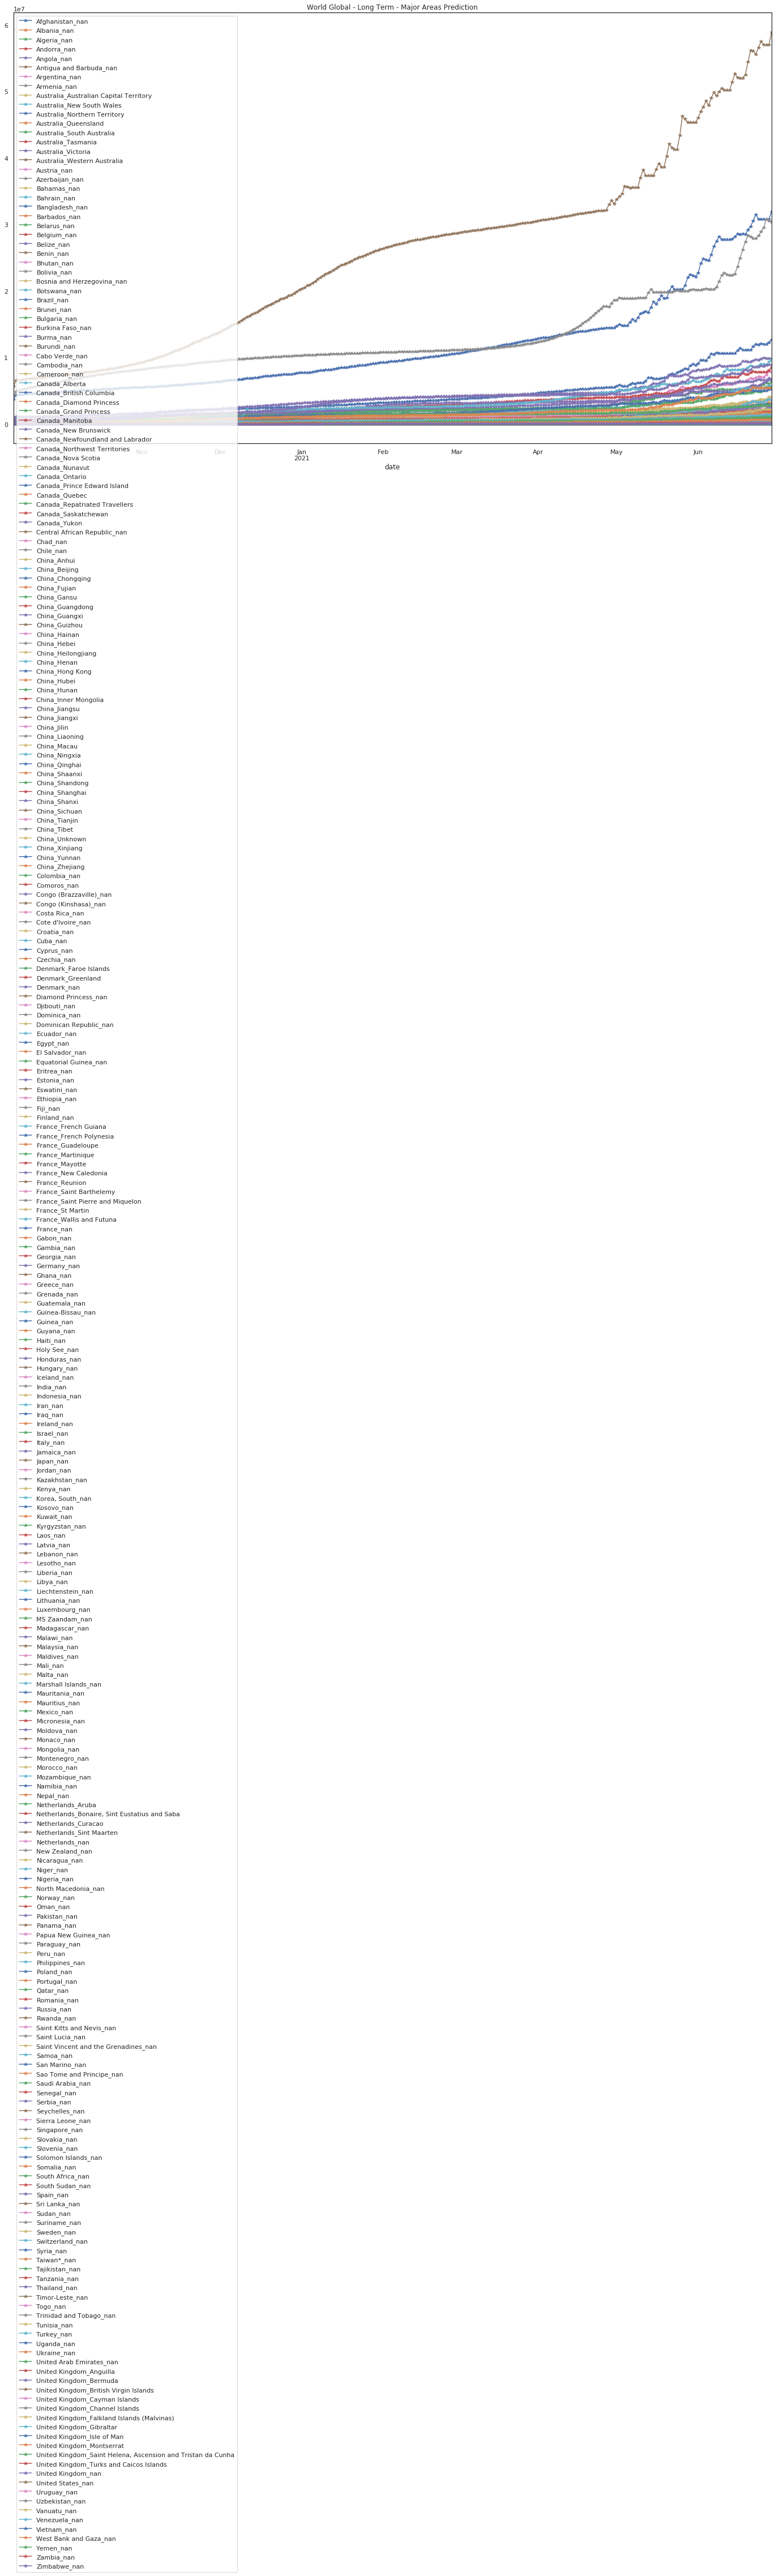

In [80]:
#region=my_train_list
pv2=pred
pv2[:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [81]:
pv1=pv2[:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [82]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-10-28          41237.0      19987.0      57099.0       4410.0   
2020-10-29          41366.0      20256.0      57413.0       4517.0   
2020-10-30          41442.0      20588.0      57730.0       4567.0   
2020-10-31          41525.0      20825.0      58027.0       4665.0   
2020-11-01          41600.0      21170.0      58342.0       4756.0   
2020-11-02          41718.0      21461.0      58652.0       4825.0   
2020-11-03          41826.0      21837.0      59035.0       4888.0   
2020-11-04          41912.0      22225.0      59585.0       4910.0   
2020-11-05          42031.0      22646.0      60246.0       5045.0   
2020-11-06          42082.0      23127.0      60908.0       5135.0   
2020-11-07          42131.0      23607.0      61498.0       5181.0   
2020-11-08          42247.0      24112.0      62133.0       5319.0   
2020-11-09          42383.0      24639.0      62776.0       5383.0   
2020-11-10          42556.0      25188.0      63489.0       5437.0   
2020-11-11          42714.0      25696.0      64309.0       5477.0   
2020-11-12          42892.0      26135.0      65164.0       5567.0   
2020-11-13          43071.0      26627.0      66045.0       5616.0   
2020-11-14          43144.0      27123.0      66893.0       5725.0   
2020-11-15          43316.0      27705.0      67734.0       5725.0   
2020-11-16          43544.0      28316.0      68631.0       5872.0   
2020-11-17          43760.0      29012.0      69619.0       5914.0   
2020-11-18          44012.0      29722.0      70673.0       5951.0   
2020-11-19          44264.0      30504.0      71710.0       6018.0   
2020-11-20          44459.0      31331.0      72801.0       6066.0   
2020-11-21          44598.0      32080.0      73846.0       6142.0   
2020-11-22          44773.0      32681.0      74893.0       6207.0   
2020-11-23          45043.0      33441.0      75919.0       6256.0   
2020-11-24          45254.0      34153.0      77001.0       6304.0   
2020-11-25          45462.0      34818.0      78075.0       6351.0   
2020-11-26          45682.0      35498.0      79122.0       6428.0   
...                     ...          ...          ...          ...   
2021-05-31         105105.0     172542.0     217859.0      18171.0   
2021-06-01         103862.0     170925.0     213323.0      18171.0   
2021-06-02         104022.0     170648.0     213323.0      18171.0   
2021-06-03         104022.0     170648.0     213323.0      19286.0   
2021-06-04         104022.0     177418.0     213323.0      19286.0   
2021-06-05         104022.0     182135.0     213323.0      20201.0   
2021-06-06         104022.0     179914.0     213323.0      20201.0   
2021-06-07         104713.0     181484.0     219704.0      20201.0   
2021-06-08         105054.0     182262.0     223840.0      20890.0   
2021-06-09         104837.0     187491.0     222018.0      22093.0   
2021-06-10         104837.0     189326.0     222826.0      22093.0   
2021-06-11         108265.0     188238.0     227363.0      22093.0   
2021-06-12         110185.0     193269.0     232529.0      23302.0   
2021-06-13         109434.0     196380.0     230577.0      23819.0   
2021-06-14         109732.0     196488.0     230414.0      23894.0   
2021-06-15         110743.0     198174.0     234078.0      25579.0   
2021-06-16         113024.0     197654.0     243647.0      25579.0   
2021-06-17         113201.0     200261.0     251359.0      26504.0   
2021-06-18         112833.0     202157.0     258634.0      27512.0   
2021-06-19         112833.0     203106.0     268709.0      28368.0   
2021-06-20         116677.0     207380.0     276842.0      28368.0   
2021-06-21         119002.0     207502.0     278338.0      29292.0   
2021-06-22         122809.0     207245.0     279282.0      30686.0   
2021-06-23         125997.0     207245.0     286239.0      32673.0   
2021-06-24

In [83]:
pfname='data/p+'+str(num_days_R_prediction)+'_confirmed_daily.csv'
p.to_csv(pfname, index = False, header=True)

In [84]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [85]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [86]:
heatmap_m[:]

region        Lat        Long  \
0                                      Afghanistan_nan  33.939110   67.709953   
1                                          Albania_nan  41.153300   20.168300   
2                                          Algeria_nan  28.033900    1.659600   
3                                          Andorra_nan  42.506300    1.521800   
4                                           Angola_nan -11.202700   17.873900   
5                              Antigua and Barbuda_nan  17.060800  -61.796400   
6                                        Argentina_nan -38.416100  -63.616700   
7                                          Armenia_nan  40.069100   45.038200   
8               Australia_Australian Capital Territory -35.473500  149.012400   
9                            Australia_New South Wales -33.868800  151.209300   
10                        Australia_Northern Territory -12.463400  130.845600   
11                                Australia_Queensland -27.469800  153.025100   
12                           Australia_South Australia -34.928500  138.600700   
13                                  Australia_Tasmania -42.882100  147.327200   
14                                  Australia_Victoria -37.813600  144.963100   
15                         Australia_Western Australia -31.950500  115.860500   
16                                         Austria_nan  47.516200   14.550100   
17                                      Azerbaijan_nan  40.143100   47.576900   
18                                         Bahamas_nan  25.025885  -78.035889   
19                                         Bahrain_nan  26.027500   50.550000   
20                                      Bangladesh_nan  23.685000   90.356300   
21                                        Barbados_nan  13.193900  -59.543200   
22                                         Belarus_nan  53.709800   27.953400   
23                                         Belgium_nan  50.833300    4.469936   
24                                          Belize_nan  17.189900  -88.497600   
25                                           Benin_nan   9.307700    2.315800   
26                                          Bhutan_nan  27.514200   90.433600   
27                                         Bolivia_nan -16.290200  -63.588700   
28                          Bosnia and Herzegovina_nan  43.915900   17.679100   
29                                        Botswana_nan -22.328500   24.684900   
..                                                 ...        ...         ...   
251                                    Timor-Leste_nan  -8.874217  125.727539   
252                                           Togo_nan   8.619500    0.824800   
253                            Trinidad and Tobago_nan  10.691800  -61.222500   
254                                        Tunisia_nan  33.886917    9.537499   
255                                         Turkey_nan  38.963700   35.243300   
256                                  United States_nan  40.000000 -100.000000   
257                                         Uganda_nan   1.373333   32.290275   
258                                        Ukraine_nan  48.379400   31.165600   
259                           United Arab Emirates_nan  23.424076   53.847818   
260                            United Kingdom_Anguilla  18.220600  -63.068600   
261                             United Kingdom_Bermuda  32.307800  -64.750500   
262              United Kingdom_British Virgin Islands  18.420700  -64.640000   
263                      United Kingdom_Cayman Islands  19.313300  -81.254600   
264                     United Kingdom_Channel Islands  49.372300   -2.364400   
265         United Kingdom_Falkland Islands (Malvinas) -51.796300  -59.523600   
266                           United Kingdom_Gibraltar  36.140800   -5.353600   
267                         United Kingdom_Isle of Man  54.236100   -4.548100   
268                          United Kingdom_Montserrat  16.742498  -62.187366  

In [87]:
# Fill empty lat,long with 0
heatmap_m['Lat']=heatmap_m['Lat'].fillna(0)
heatmap_m['Long']=heatmap_m['Long'].fillna(0)
#
heatmap_m_fn="heatmap_m_"+str(num_days_R_prediction)+".csv"
heatmap_m.to_csv(r'data/'+heatmap_m_fn, index = False, header=True)

In [88]:
#!pip install folium
import folium
import re

lat=40.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction
n2dayarray=-1-(num_days_R_prediction*2)

for lat,lng,num,totpred,lastday7DayAvg,today7DayAvg in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]), heatmap_m[heatmap_m.columns[-1]], \
                                                           (heatmap_m[heatmap_m.columns[-1]]-heatmap_m[heatmap_m.columns[ndayarray]])/ndaysavg, \
                                                           (heatmap_m[heatmap_m.columns[ndayarray]]-heatmap_m[heatmap_m.columns[n2dayarray]])/ndaysavg):
    use_color=heatmap_m['region'][num][0]
    print_region=re.sub('_nan',  '', heatmap_m['region'][num])
    popup = folium.Popup( print_region+' Current7DayAVG='+str(round(today7DayAvg))+' Predicted7DayAVG='+str(round(lastday7DayAvg))+' ConfTotPred='+str(round(totpred))+' Date='+date_pred , parse_html=True)
    #
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [89]:
# Top 50 Regions in the World impacted
#
max_cont=max_countries_map
region_m2=region[:max_cont]
#
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                    region        Lat        Long  \
0       6             Argentina_nan -38.416100  -63.616700   
1      16               Austria_nan  47.516200   14.550100   
2      20            Bangladesh_nan  23.685000   90.356300   
3      23               Belgium_nan  50.833300    4.469936   
4      30                Brazil_nan -14.235000  -51.925300   
5      32              Bulgaria_nan  42.733900   25.485800   
6      51            Canada_Ontario  51.253800  -85.323200   
7      59                 Chile_nan -35.675100  -71.543000   
8      94              Colombia_nan   4.570900  -74.297300   
9     100               Croatia_nan  45.100000   15.200000   
10    103               Czechia_nan  49.817500   15.473000   
11    132                France_nan  46.227600    2.213700   
12    135               Georgia_nan  42.315400   43.356900   
13    136               Georgia_nan  42.315400   43.356900   
14    137               Germany_nan  51.165691   10.451526   
15    139                Greece_nan  39.074200   21.824300   
16    149               Hungary_nan  47.162500   19.503300   
17    151                 India_nan  20.593684   78.962880   
18    152             Indonesia_nan  -0.789300  113.921300   
19    153                  Iran_nan  32.427908   53.688046   
20    154                  Iraq_nan  33.223191   43.679291   
21    156                Israel_nan  31.046051   34.851612   
22    157                Israel_nan  31.046051   34.851612   
23    158                 Italy_nan  41.871940   12.567380   
24    160                 Japan_nan  36.204824  138.252924   
25    161                Jordan_nan  31.240000   36.510000   
26    162            Kazakhstan_nan  48.019600   66.923700   
27    170               Lebanon_nan  33.854700   35.862300   
28    171               Lebanon_nan  33.854700   35.862300   
29    181              Malaysia_nan   4.210484  101.975766   
30    188                Mexico_nan  23.634500 -102.552800   
31    194               Morocco_nan  31.791700   -7.092600   
32    197                 Nepal_nan  28.166700   84.250000   
33    202           Netherlands_nan  52.132600    5.291300   
34    210              Pakistan_nan  30.375300   69.345100   
35    211                Panama_nan   8.538000  -80.782100   
36    214                  Peru_nan  -9.190000  -75.015200   
37    215           Philippines_nan  12.879721  121.774017   
38    216                Poland_nan  51.919400   19.145100   
39    217              Portugal_nan  39.399900   -8.224500   
40    219               Romania_nan  45.943200   24.966800   
41    220                Russia_nan  61.524010  105.318756   
42    228          Saudi Arabia_nan  23.885942   45.079162   
43    230                Serbia_nan  44.016500   21.005900   
44    238          South Africa_nan -30.559500   22.937500   
45    240                 Spain_nan  40.463667   -3.749220   
46    244                Sweden_nan  60.128161   18.643501   
47    245           Switzerland_nan  46.818200    8.227500   
48    255                Turkey_nan  38.963700   35.243300   
49    256         United States_nan  40.000000 -100.000000   
50    258               Ukraine_nan  48.379400   31.165600   
51    259  United Arab Emirates_nan  23.424076   53.847818   
52    271        United Kingdom_nan  55.378100   -3.436000   

    2020-09-13 00:00:00  2020-09-14 00:00:00  2020-09-15 00:00:00  \
0              497028.0             555537.0             578058.0   
1               46502.0              46831.0              33541.0   
2              308999.0             337520.0             339466.0   
3               98504.0              99238.0              94306.0   
4             3752717.0            4330455.0            4380846.0   
5               33357.0              33481.0              18061.0   
6               57995.0              58357.0              46905.0   
7              392853.0             434748.0             436433.0   
8              635695.0           

In [90]:
import folium
import re

lat=40.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=3)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')
ndaysavg=num_days_R_prediction
ndayarray=-1-num_days_R_prediction
n2dayarray=-1-(num_days_R_prediction*2)

for lat2,lng2,num2,totpred2,lastday7DayAvg2,today7DayAvg2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]), heatmap_m2[heatmap_m2.columns[-1]], \
                                                                (heatmap_m2[heatmap_m2.columns[-1]]-heatmap_m2[heatmap_m2.columns[ndayarray]])/ndaysavg, \
                                                                (heatmap_m2[heatmap_m2.columns[ndayarray]]-heatmap_m2[heatmap_m2.columns[n2dayarray]])/ndaysavg):
    use_color2=heatmap_m2['region'][num2][0]
    print_region=re.sub('_nan',  '', heatmap_m2['region'][num2])
    popup2 = folium.Popup( print_region+' Current7DayAvg='+str(round(today7DayAvg2))+' Predicted7DayAvg='+str(round(lastday7DayAvg2))+' ConfTotPred='+str(round(totpred2))+' Date='+date_pred, parse_html=True)  
    #
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [91]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [92]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March, April and May!")
print(" April-May-June-July are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March, April and May!
 April-May-June-July are going to be hard with this Global Lock-Down!


In [93]:
exit()